## House price prediction model- Surprise Housing


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

#### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Checking for missing values, and dispalying only those columns with missing values
housing.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Data cleaning and EDA 

- Dropping GarageYrBlt coz, it has missing values. 
- Dropping Id coz it is just sequence number and not any menaingful data.
- Dropping MasVnrArea becaouse apart from values of 0 which is valid for MasVnrType of None, It is missing some values as NA 
- Dropping MoSold because its business meaning wrt to problem statement is not very irrelevant.

In [6]:

# Dropping GarageYrBlt coz, it has missing values. Dropping Id coz it is just sequence number and not any menaingful data.
#Dropping MasVnrArea becaouse apart from values of 0 which is valid for MasVnrType of None, It is missing some values as NA 
# Dropping MoSold because its business meaning wrt to problem statement is not very irrelevant.

housing = housing.drop(columns=['Id',
                                'GarageYrBlt',
                                'MasVnrArea',
                               'Electrical',
                               'MoSold'])

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,250000


In [7]:
# Mapping following numeric data values to categorical columns

housing['MSSubClass'] = housing['MSSubClass'].replace({20:"1-STORY 1946 & NEWER ALL STYLES" , 30:"1-STORY 1945 & OLDER" , 
                                         40:"1-STORY FINISHED ATTIC ALL AGES" , 
                                         45: "1-1/2 STORY - UNFINISHED ALL AGES" , 50: "1-1/2 STORY FINISHED ALL AGES" , 
                                         60: "2-STORY 1946 and NEWER",
                                         70: "2-STORY 1945 & OLDER" , 75:"2-1/2 STORY ALL AGES", 80:"SPLIT OR MULTI-LEVEL" , 85:"SPLIT FOYER" ,
                                         90:"DUPLEX - ALL STYLES AND AGES" , 120:"1-STORY PUD (Planned Unit Development) - 1946 and NEWER" ,
                                        150:"1-1/2 STORY PUD - ALL AGES",160:"2-STORY PUD - 1946 & NEWER",180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                        190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})


housing['YrSold'] = housing['YrSold'].replace({2006:"Year 2006" , 2007:"Year 2007" , 
                                         2008:"Year 2008" , 
                                         2009: "Year 2009" , 2010: "Year 2010"})



In [8]:
# A lot of relevant and meaningful data such as NA if being read as NaN in dataframe, we must overlay themn with other value, 
#which can be used.

housing["LotFrontage"] = housing["LotFrontage"].replace({np.nan: 0})

housing["Alley"] = housing["Alley"].replace({np.nan: 'No Alley'})

housing["BsmtQual"] = housing["BsmtQual"].replace({np.nan: "NB"})

housing["BsmtCond"] = housing["BsmtCond"].replace({np.nan:"NB"})

housing["BsmtExposure"] = housing["BsmtExposure"].replace({np.nan:"Nb"})

housing["BsmtFinType1"] = housing["BsmtFinType1"].replace({np.nan:"Nb"})

housing["BsmtFinType2"] = housing["BsmtFinType2"].replace({np.nan:"Nb"})


housing["FireplaceQu"] = housing["FireplaceQu"].replace({np.nan:"NF"})

housing["GarageType"] = housing["GarageType"].replace({np.nan:"NG"})

housing["GarageFinish"] = housing["GarageFinish"].replace({np.nan:"NG"})

housing["GarageQual"] = housing["GarageQual"].replace({np.nan:"NG"})

housing["GarageCond"] = housing["GarageCond"].replace({np.nan:"NG"})

housing["PoolQC"] = housing["PoolQC"].replace({np.nan:"NP"})

housing["MiscFeature"] = housing["MiscFeature"].replace({np.nan:"NMisc"})

housing["Fence"] = housing["Fence"].replace({np.nan:"NF"})

housing["MasVnrType"] = housing["MasVnrType"].replace({np.nan:"NM"})



In [9]:
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [10]:
#Checking for missing values, and dispalying only those columns with missing values
housing.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: int64)

Now, no missing values are present.

In [11]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

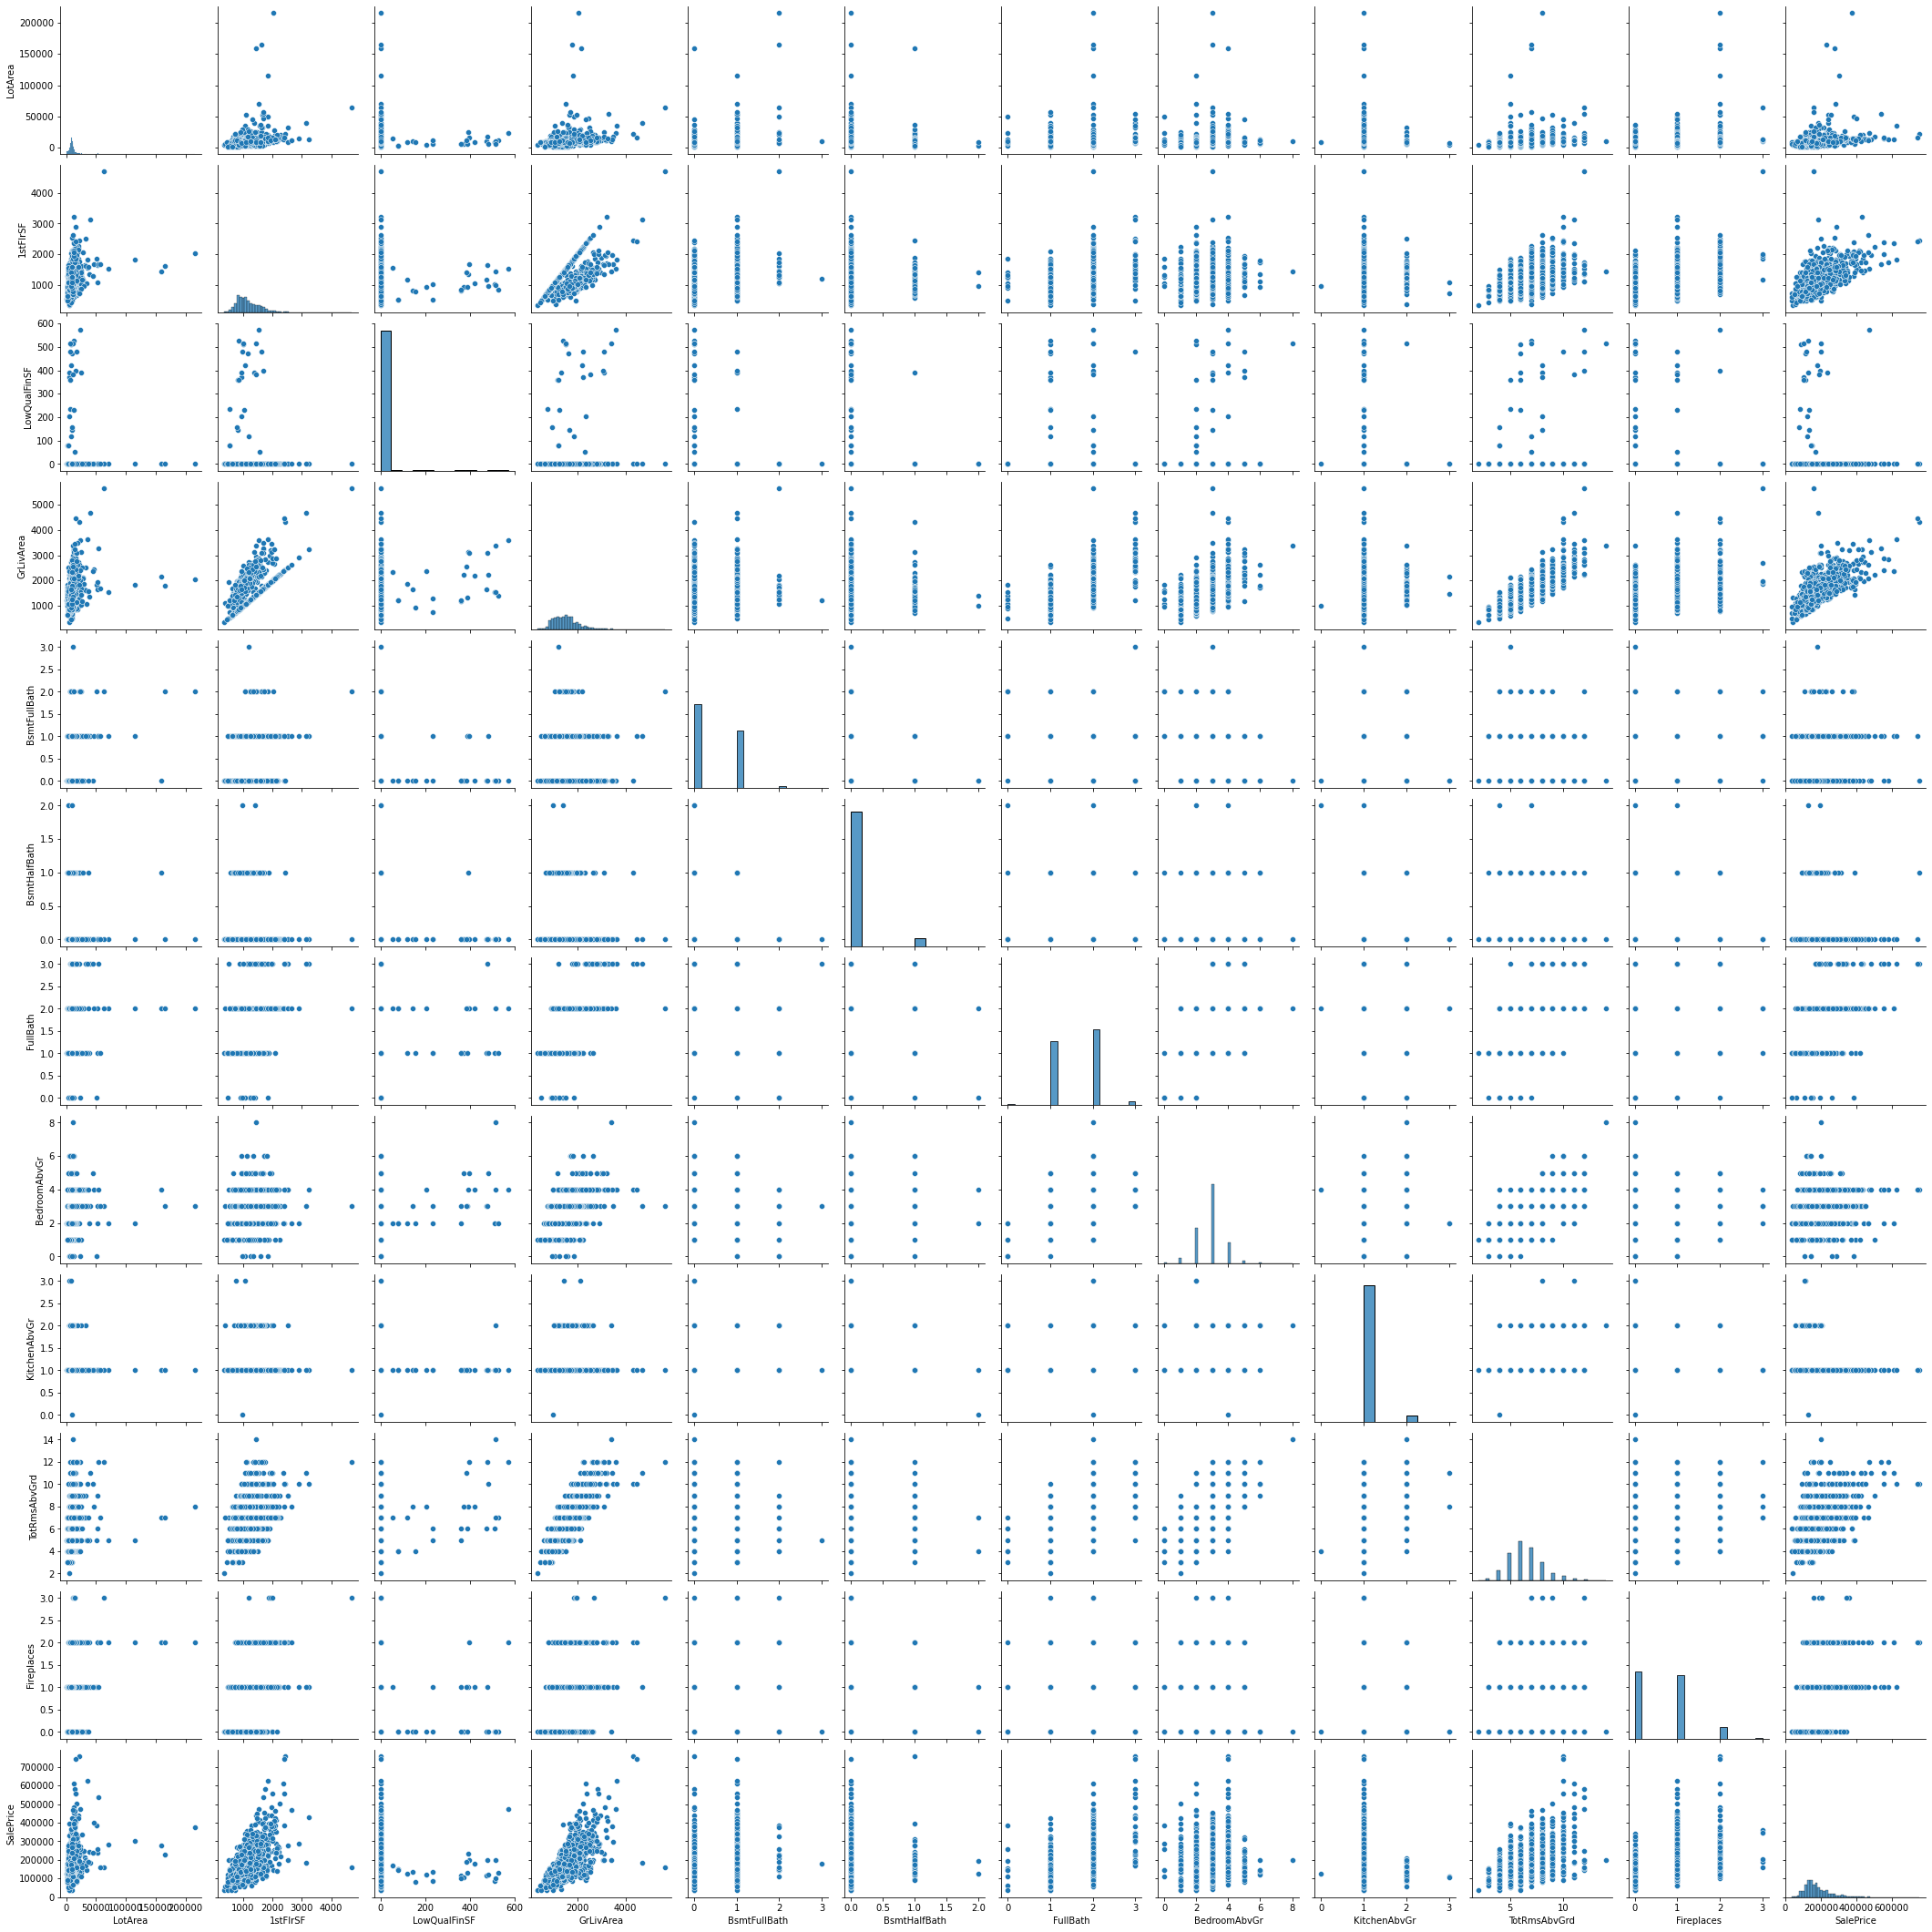

In [12]:
#Let us visualize the pair plots among numeric variables, to see relations among them

sns.pairplot(housing, vars = ['LotArea', '1stFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath','FullBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                             'Fireplaces','SalePrice'])

plt.show()

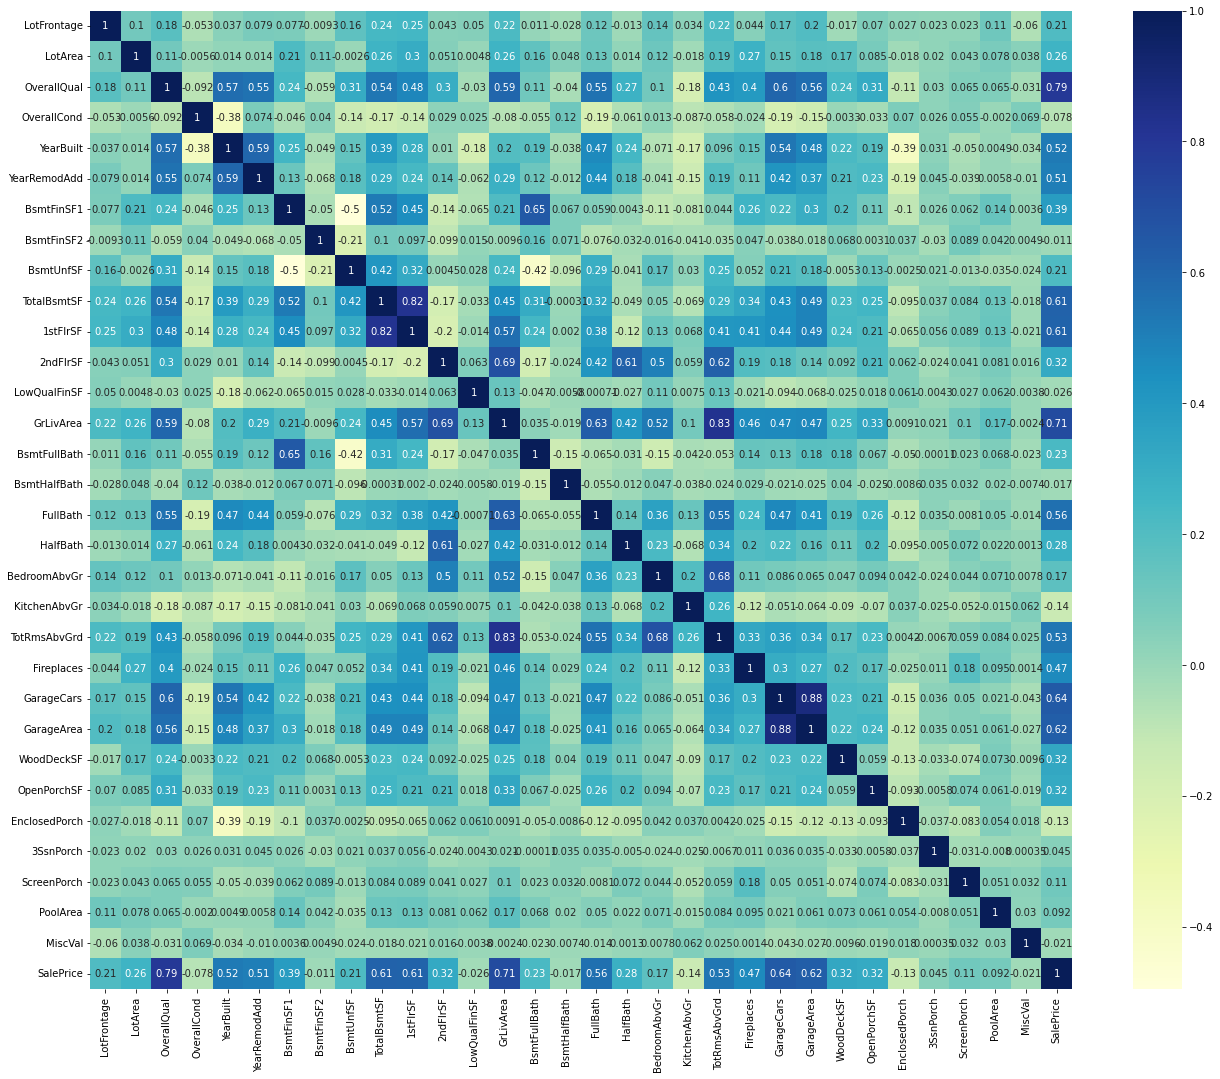

In [13]:
#let us do a heatmap plot to see collinearity.

plt.figure(figsize = (22, 18))
sns.heatmap(housing.corr(), annot = True, cmap="YlGnBu")
plt.show()

A large number of variables are highly correlated.

In [14]:
housing.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

Let visualize the categorical columns data:

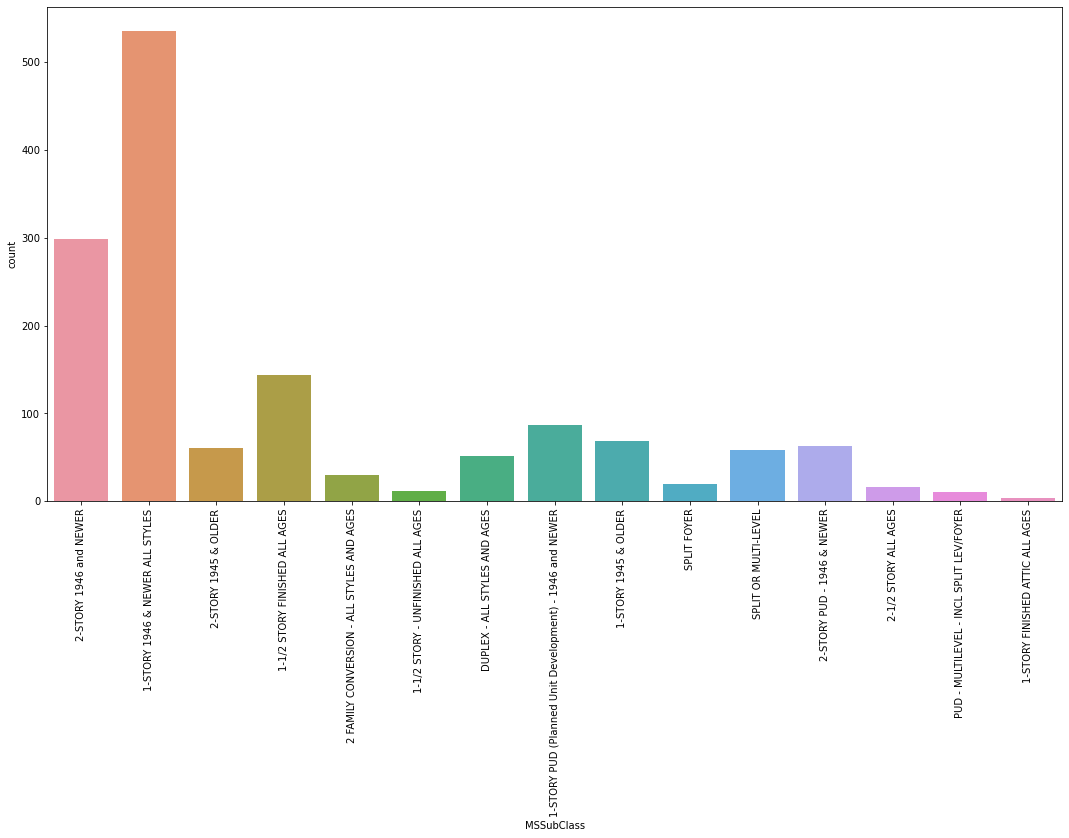

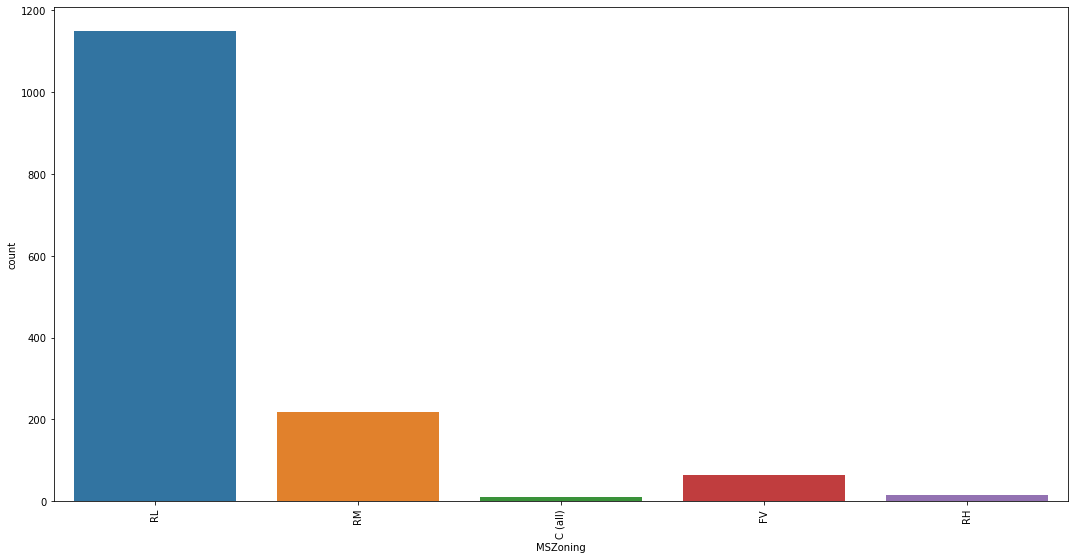

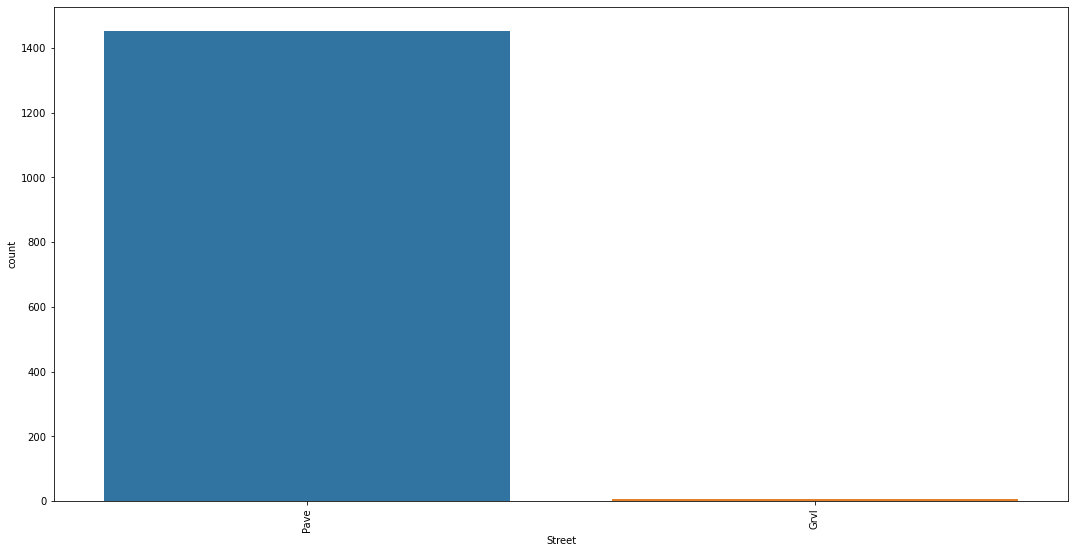

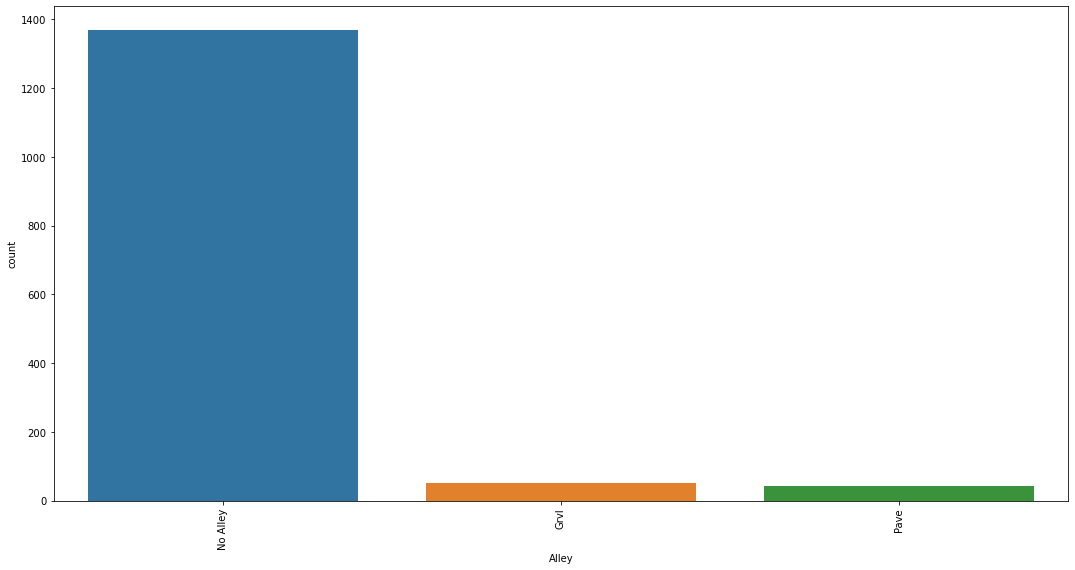

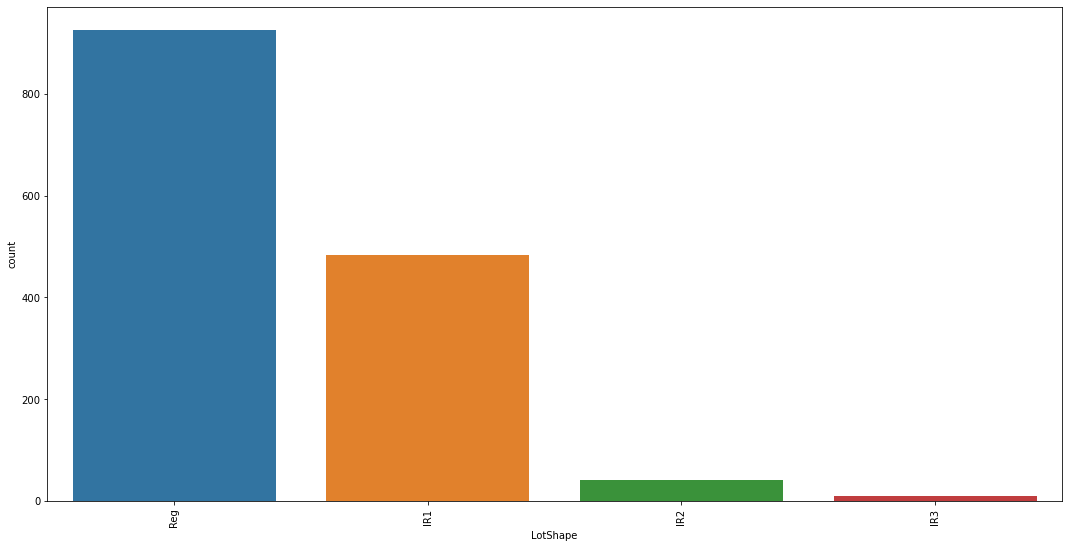

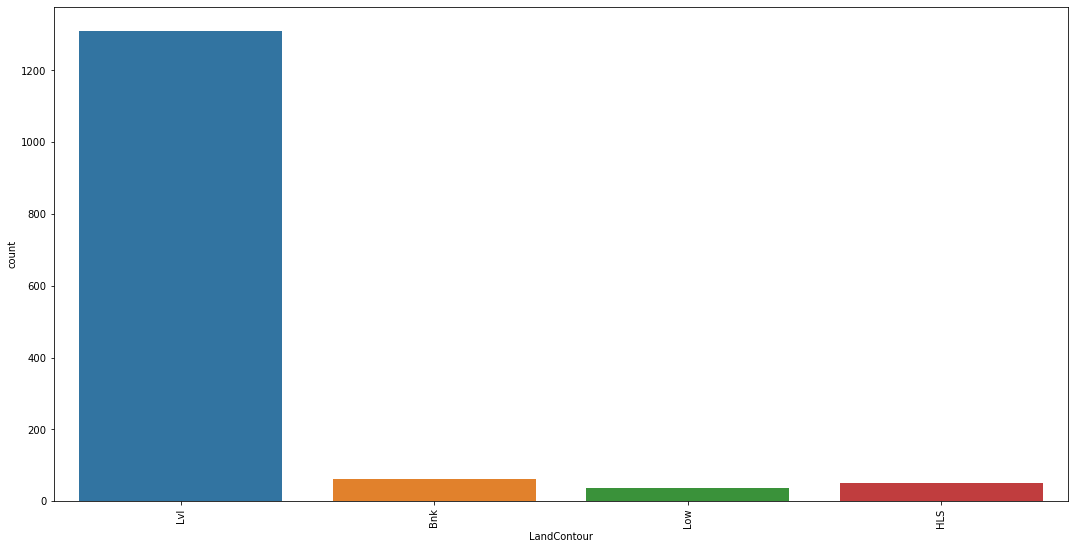

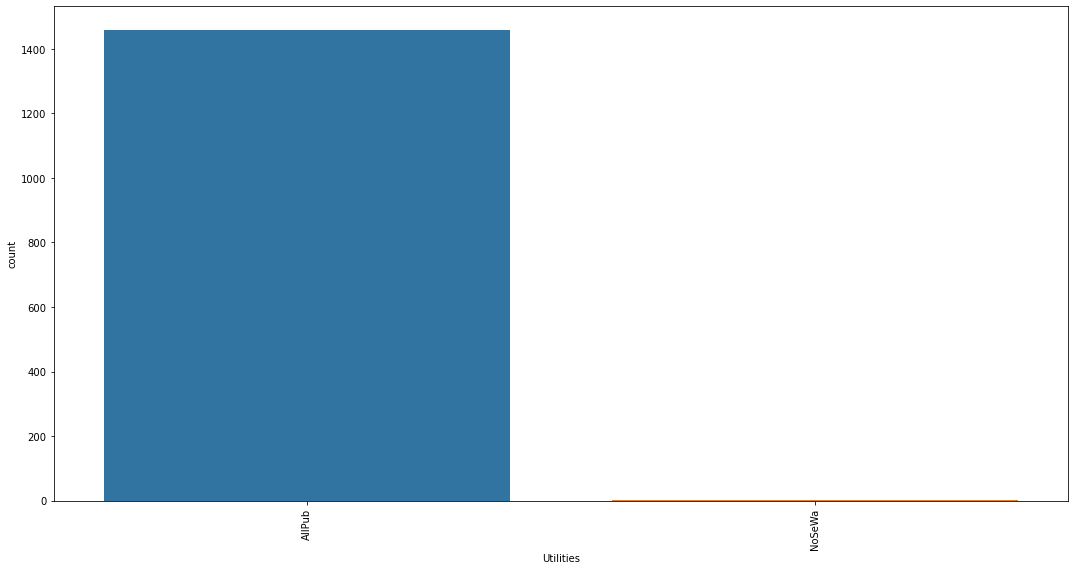

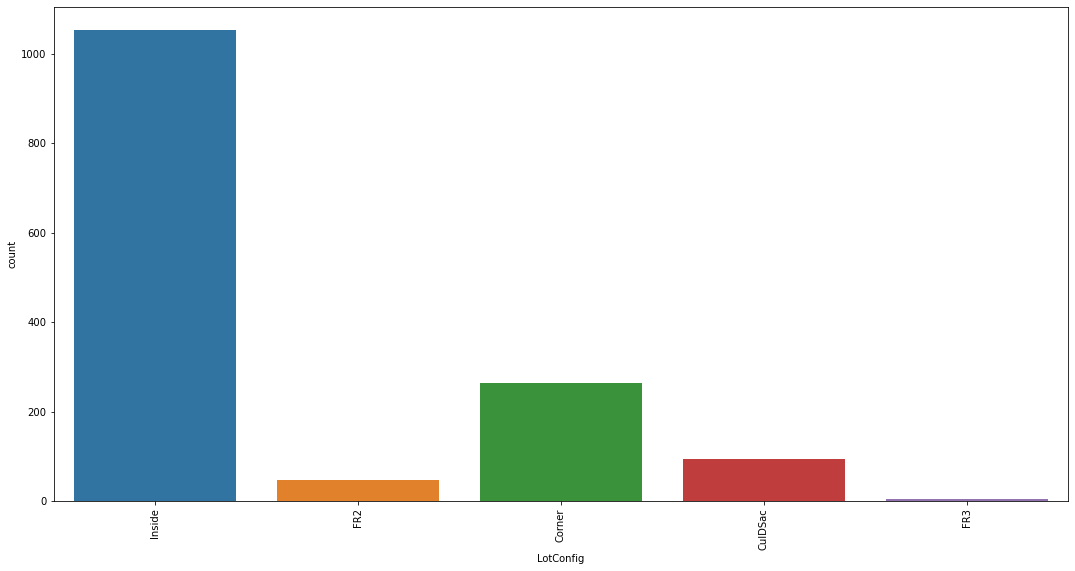

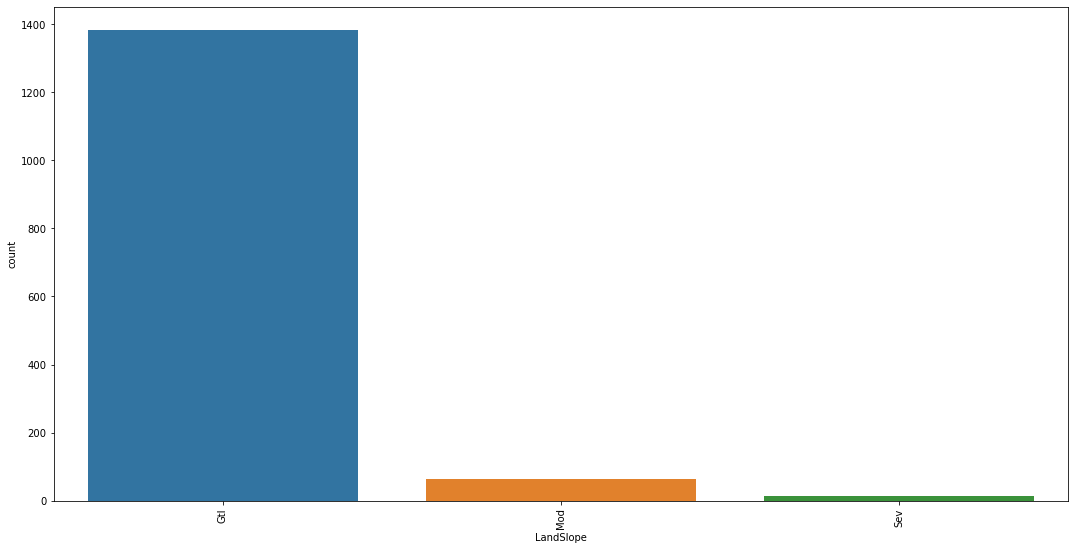

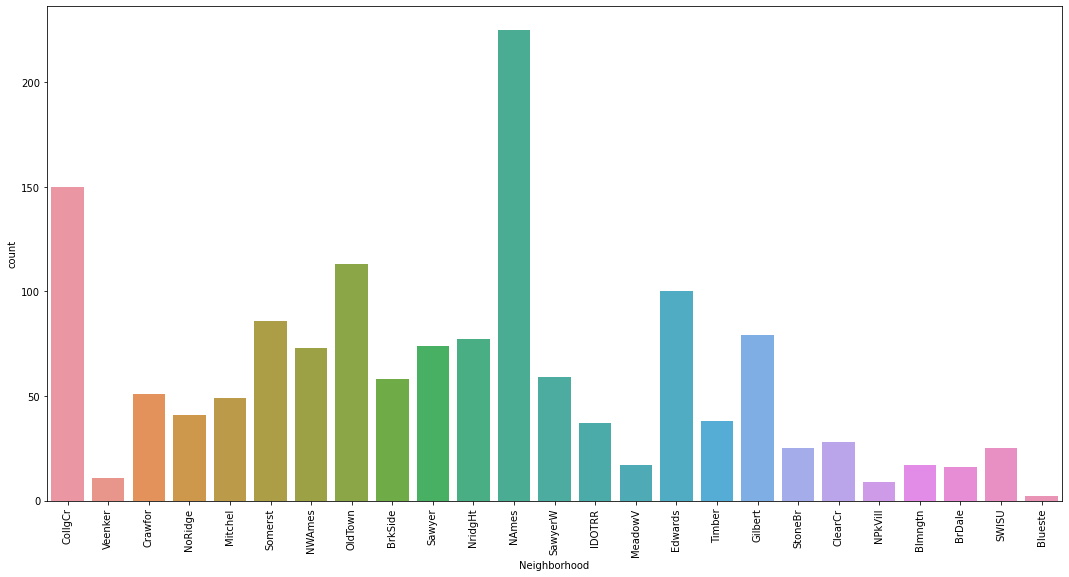

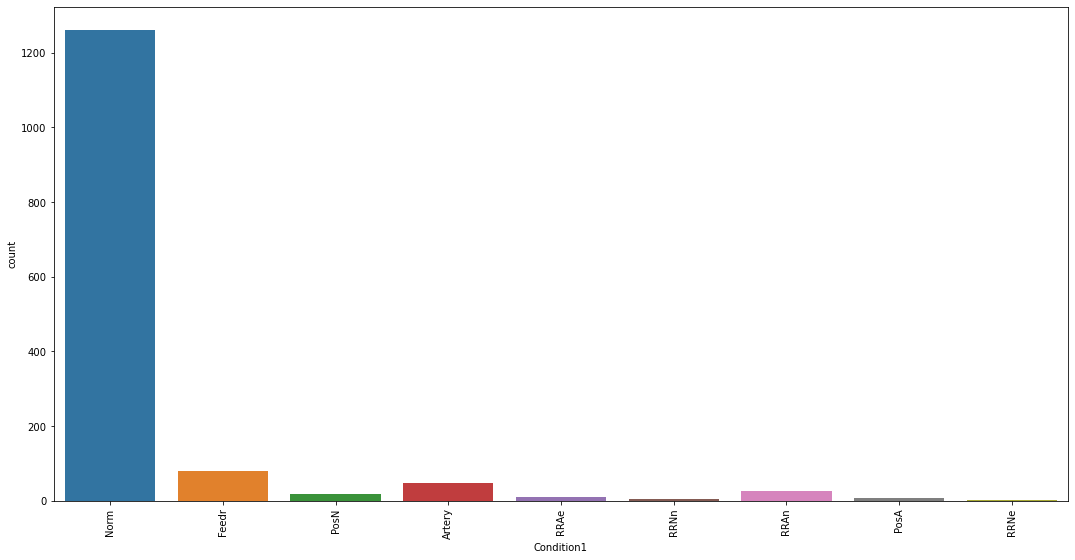

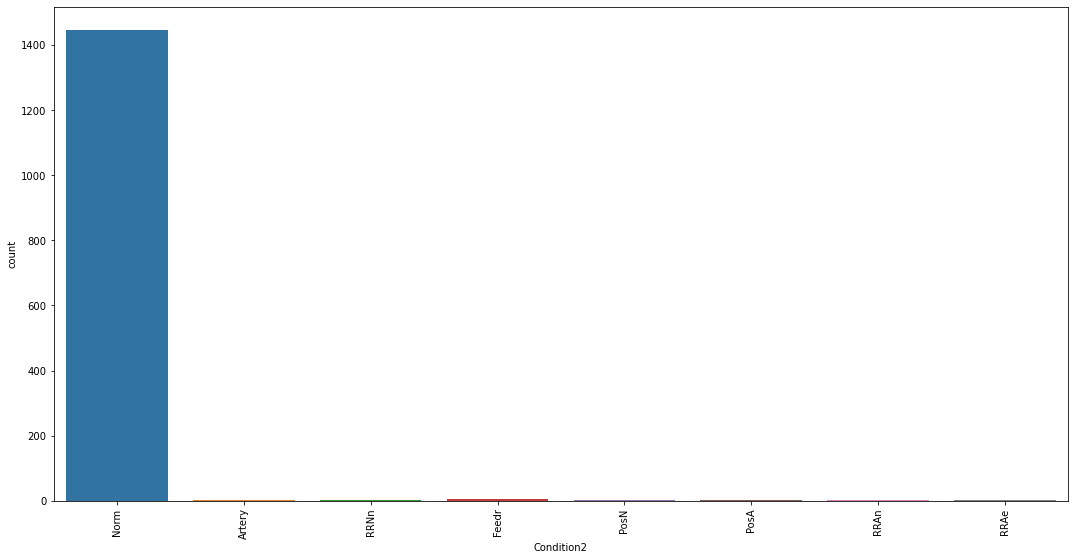

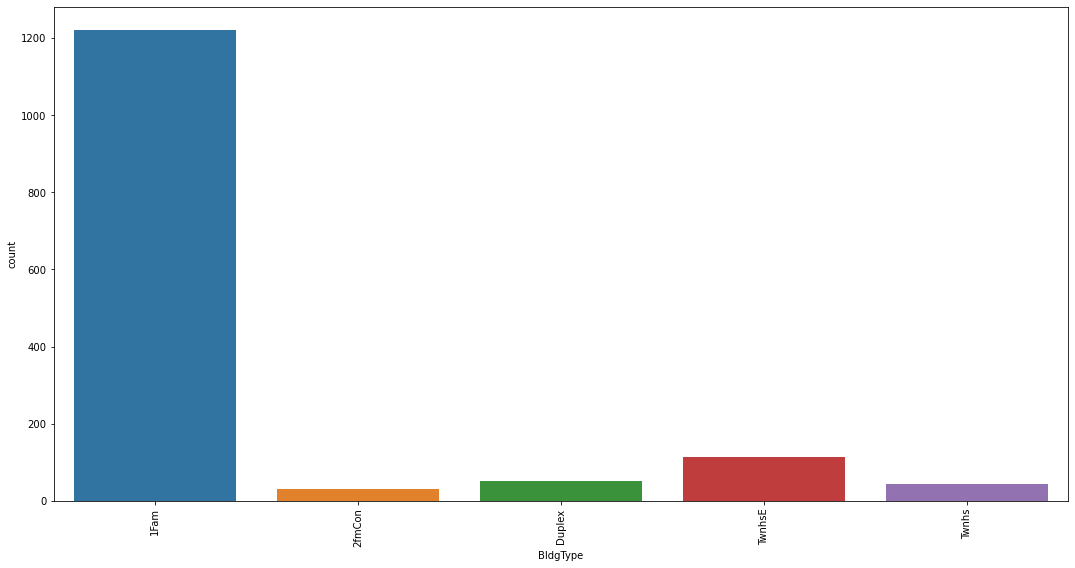

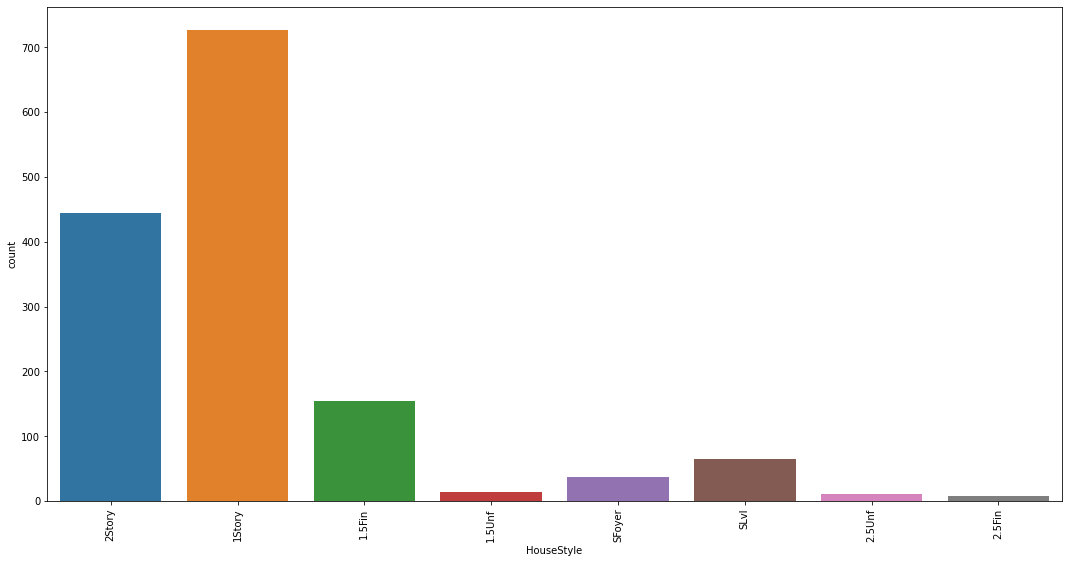

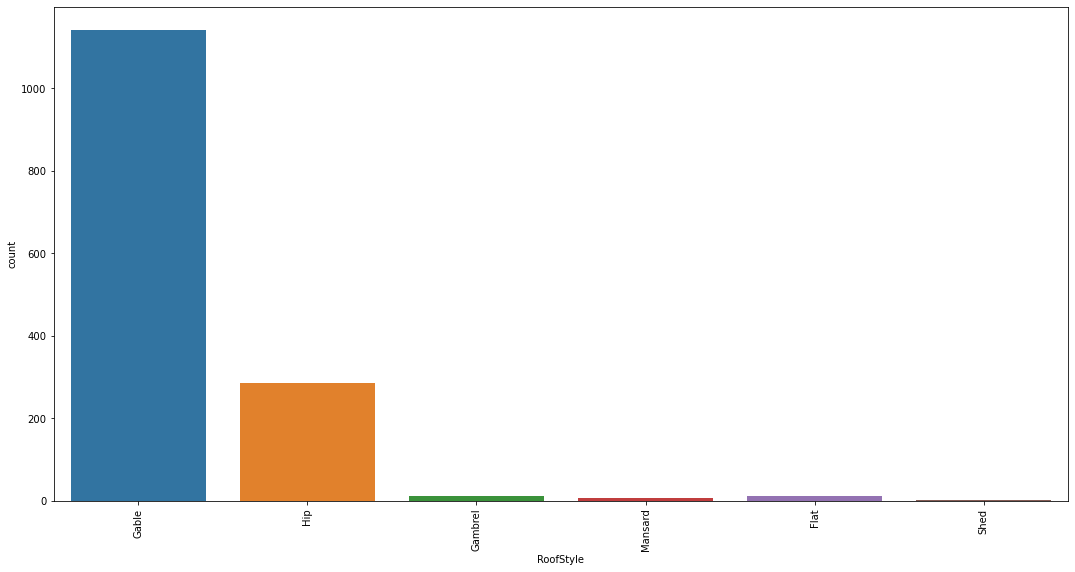

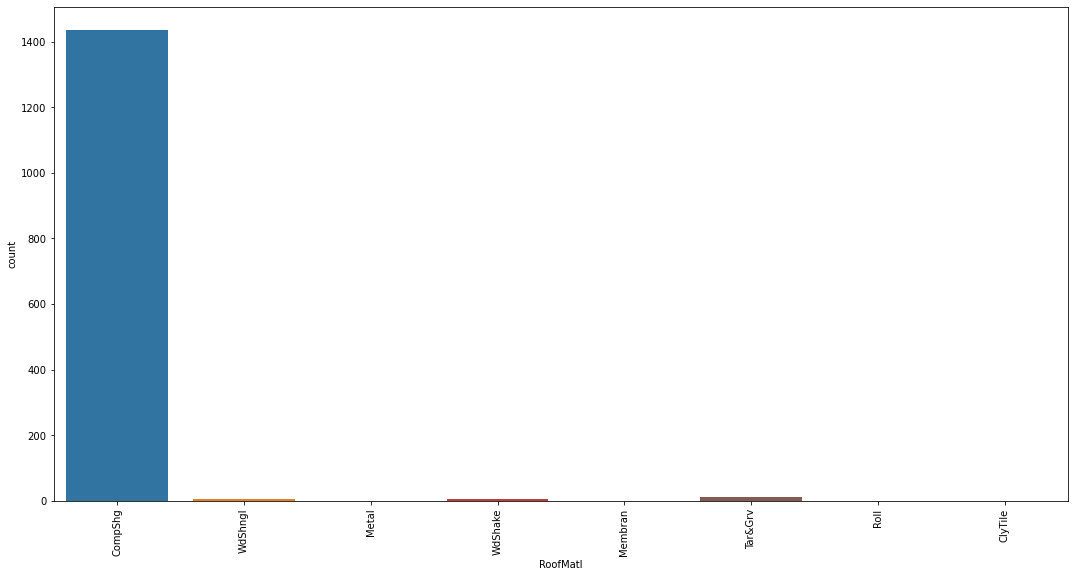

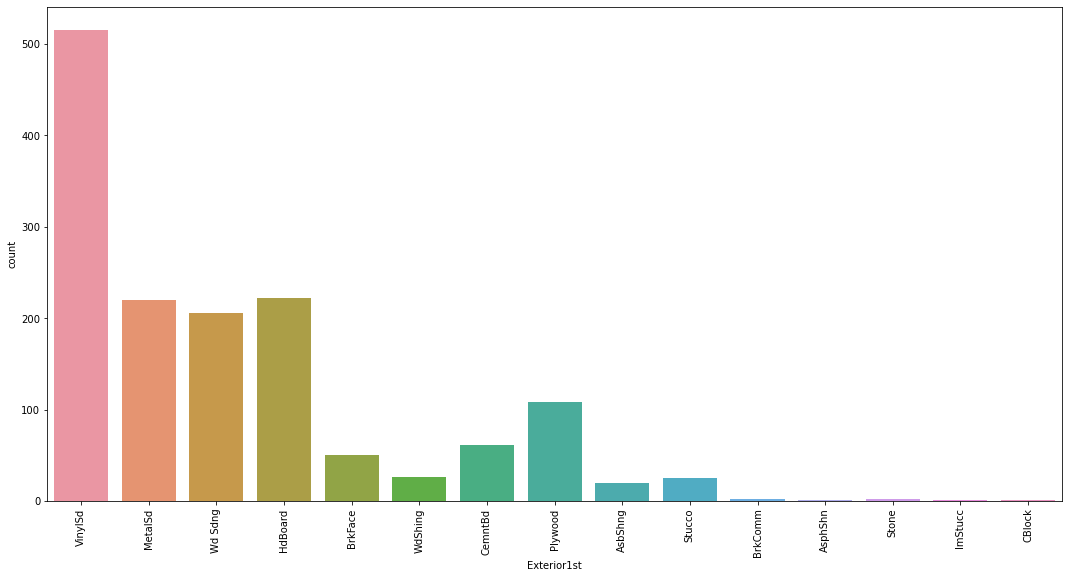

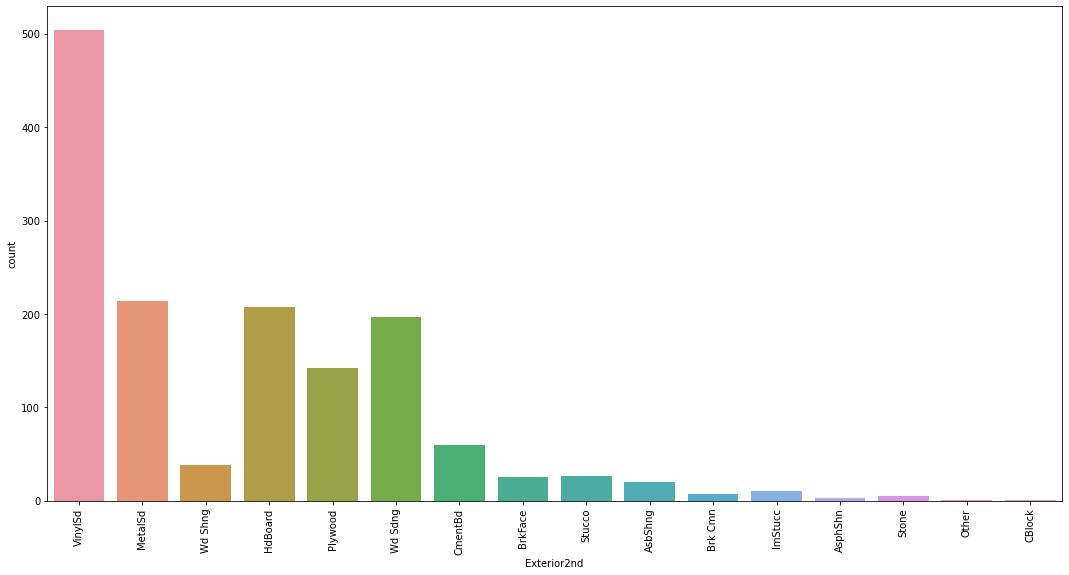

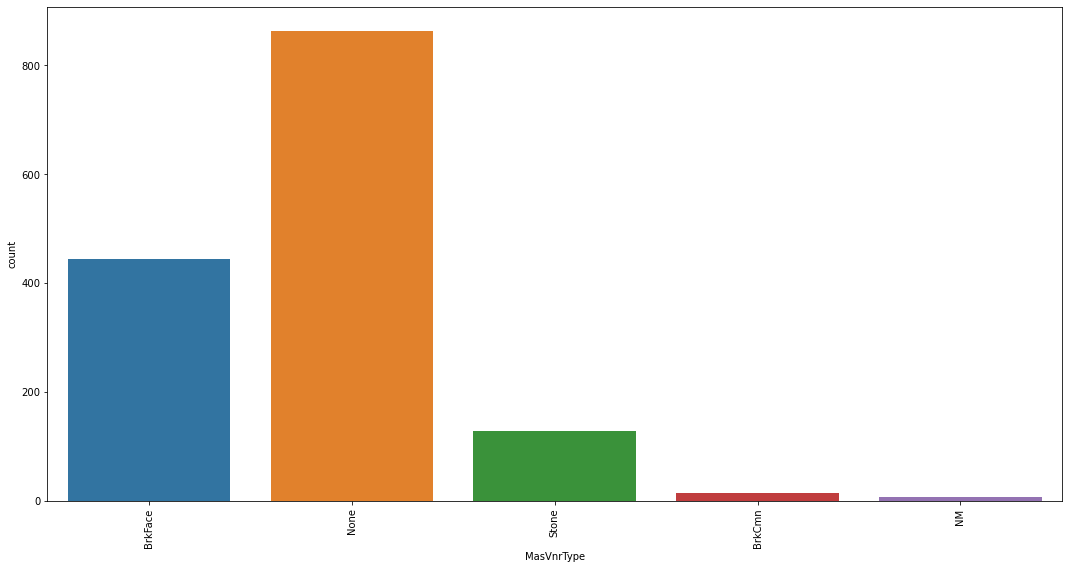

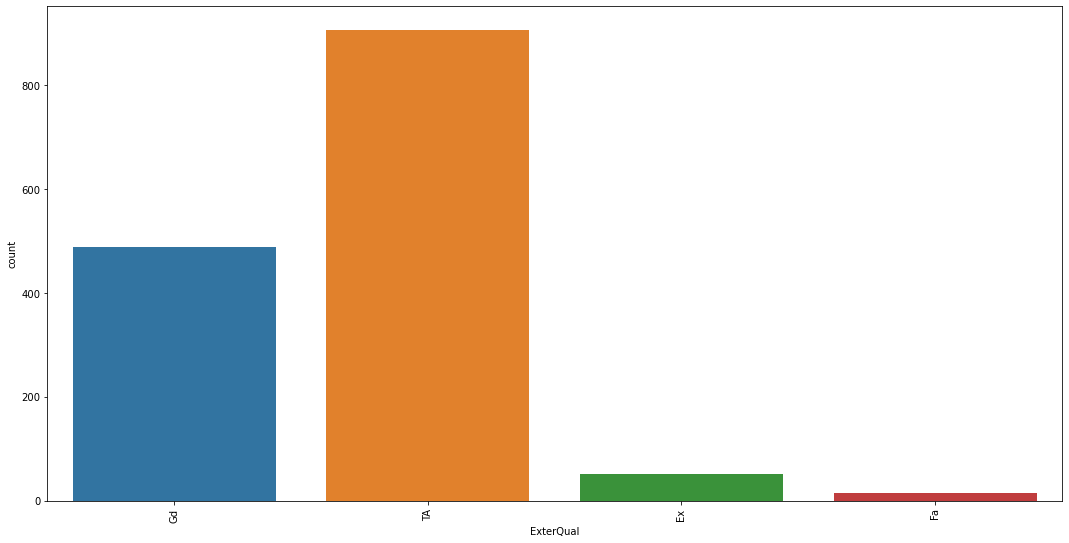

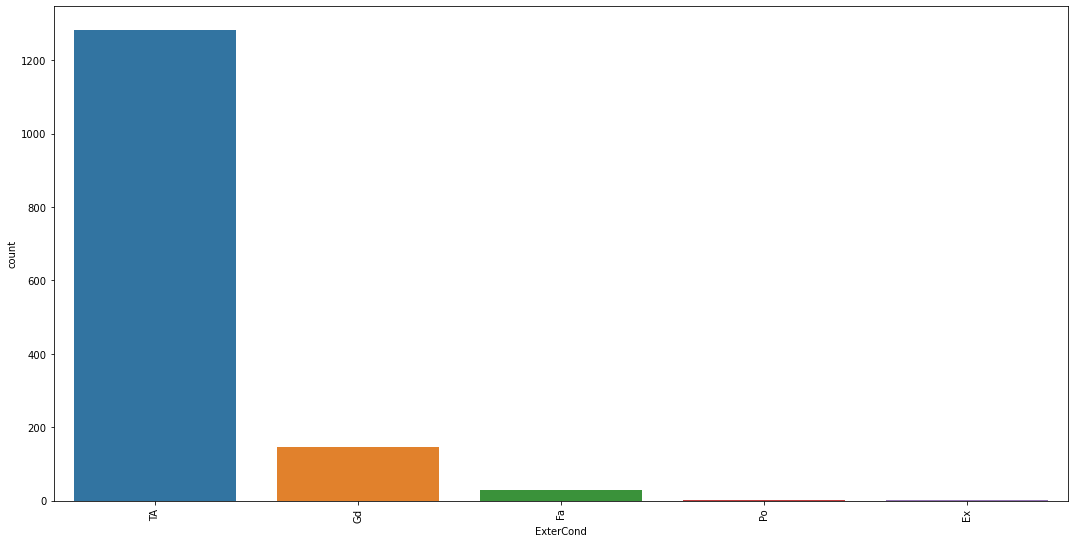

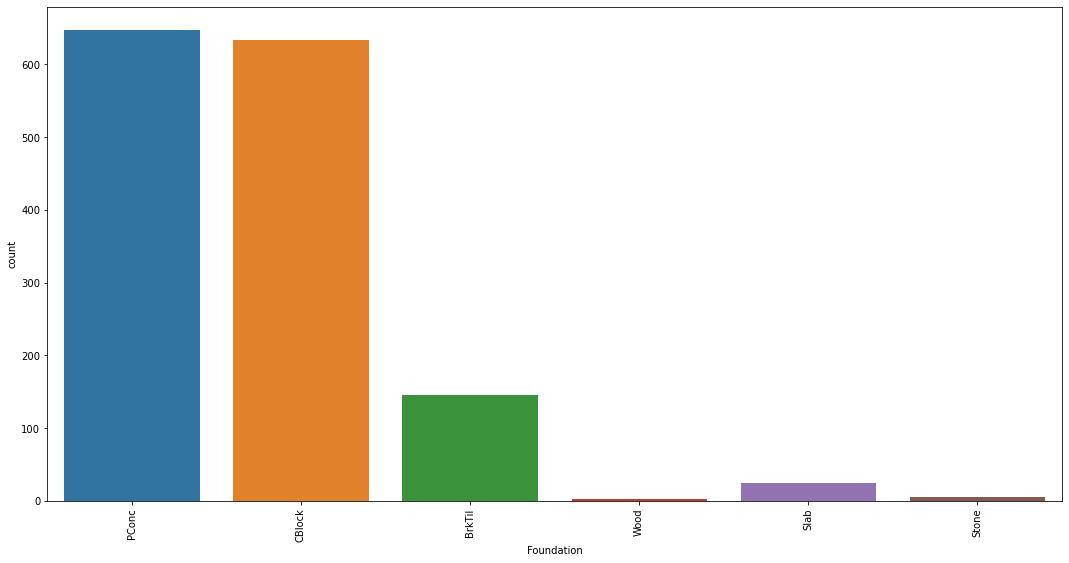

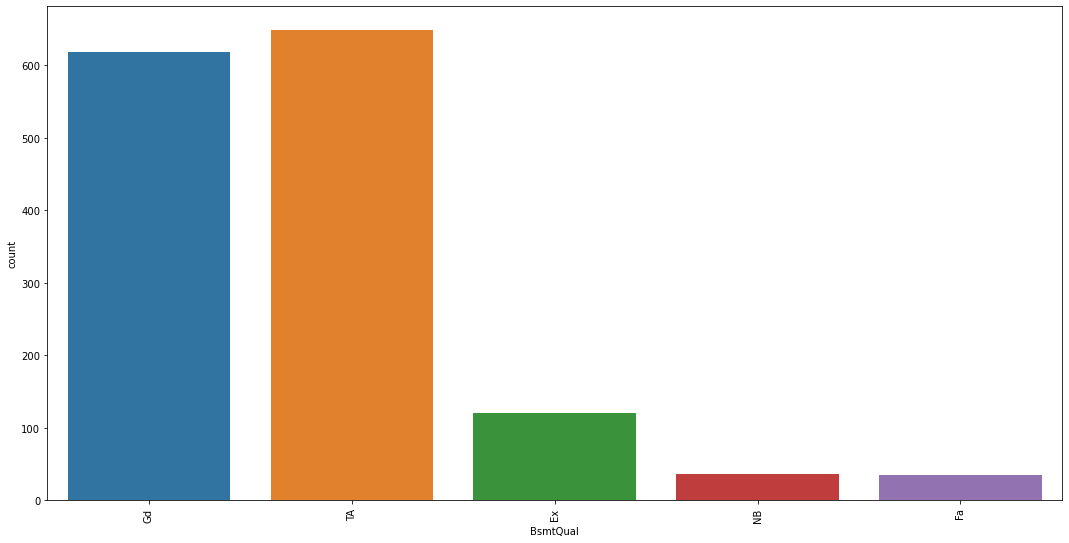

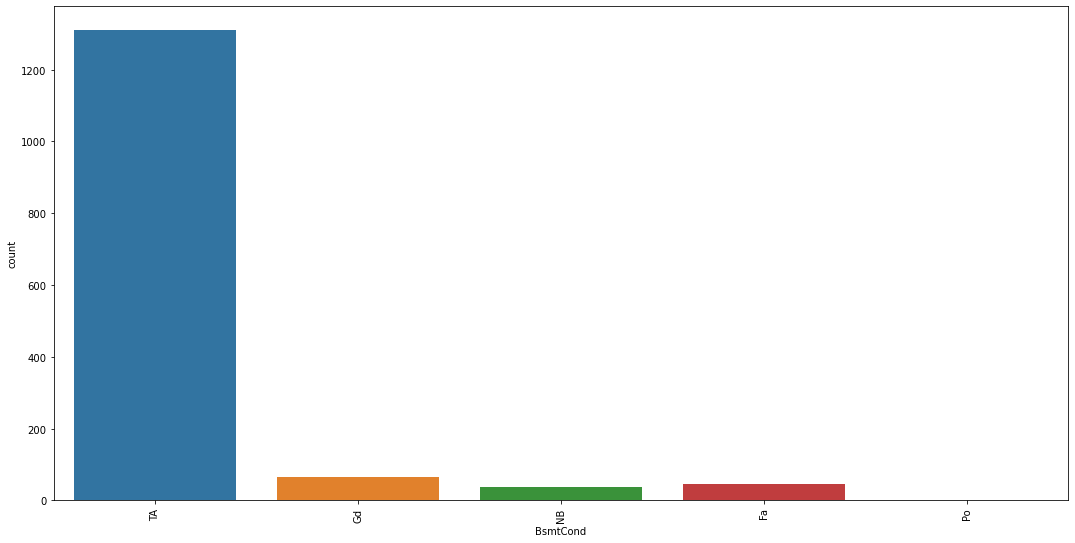

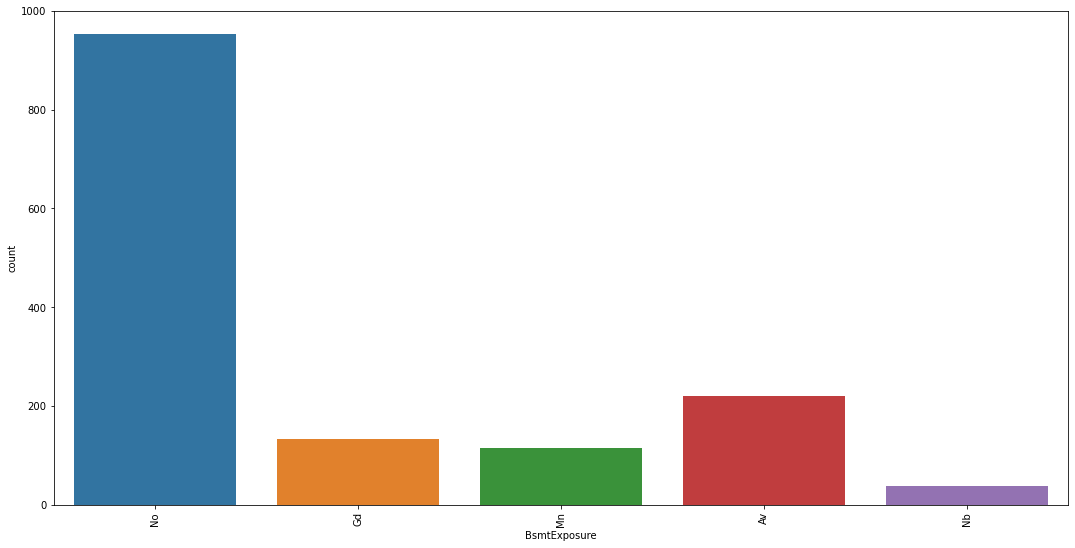

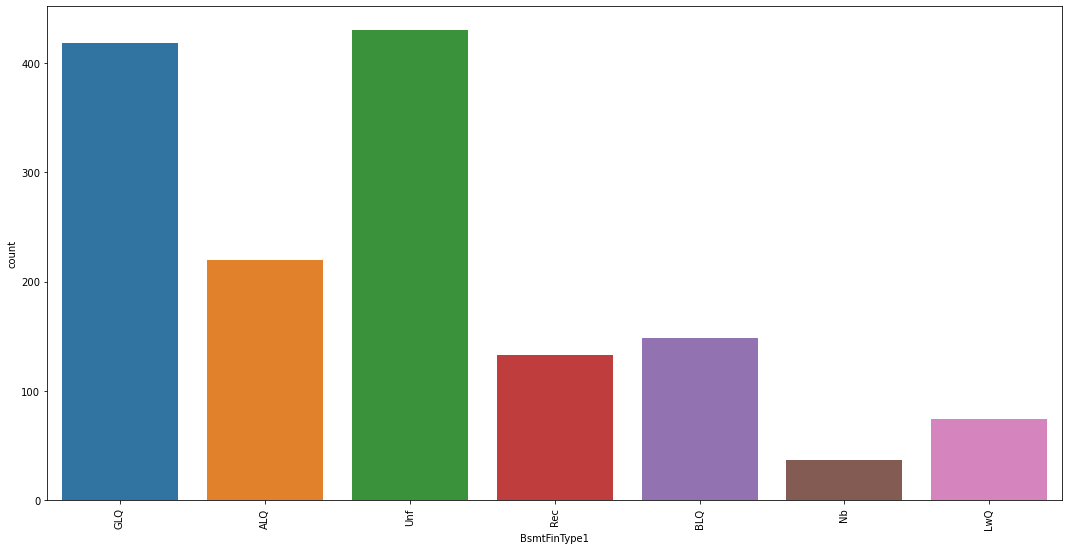

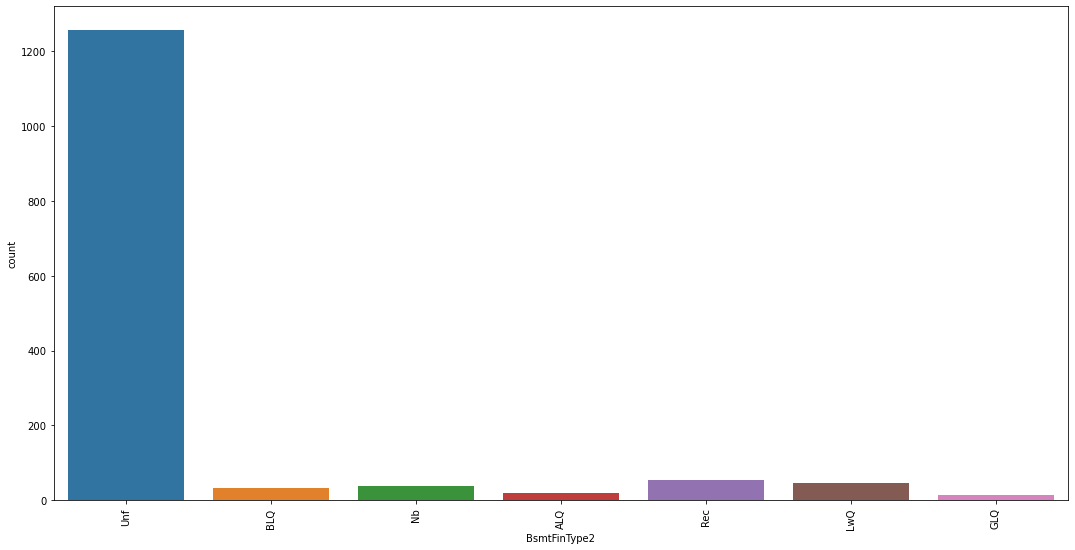

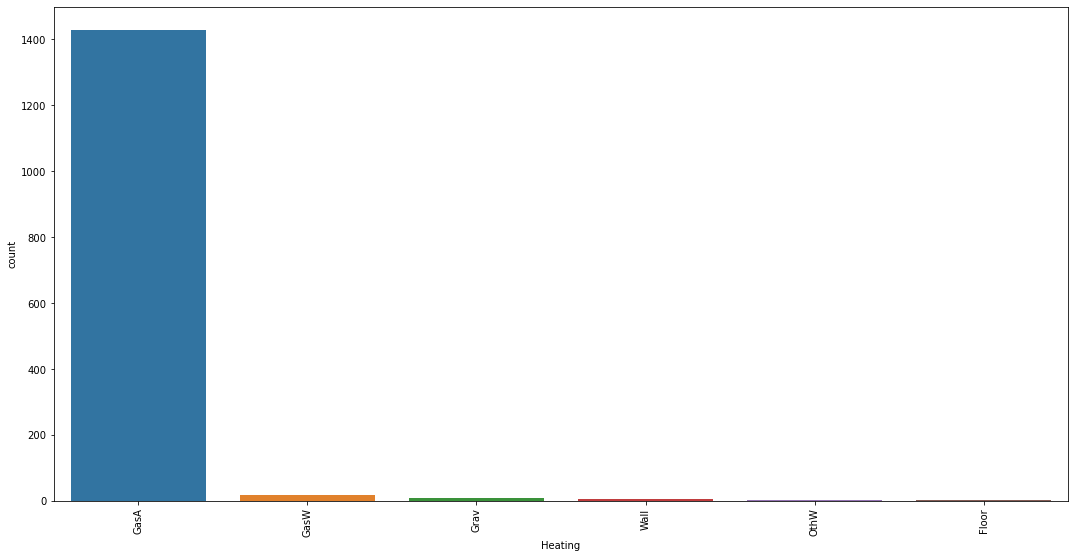

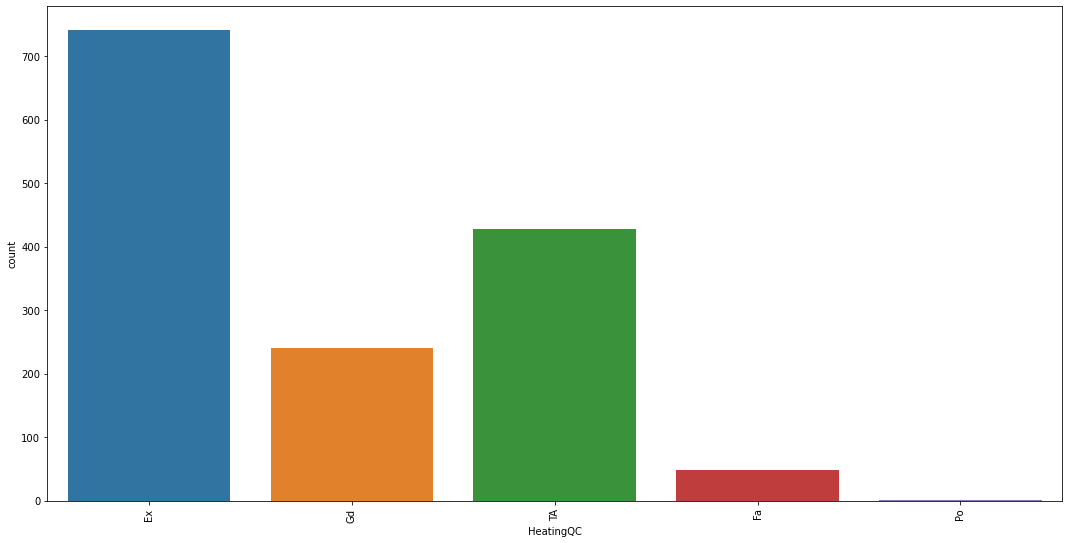

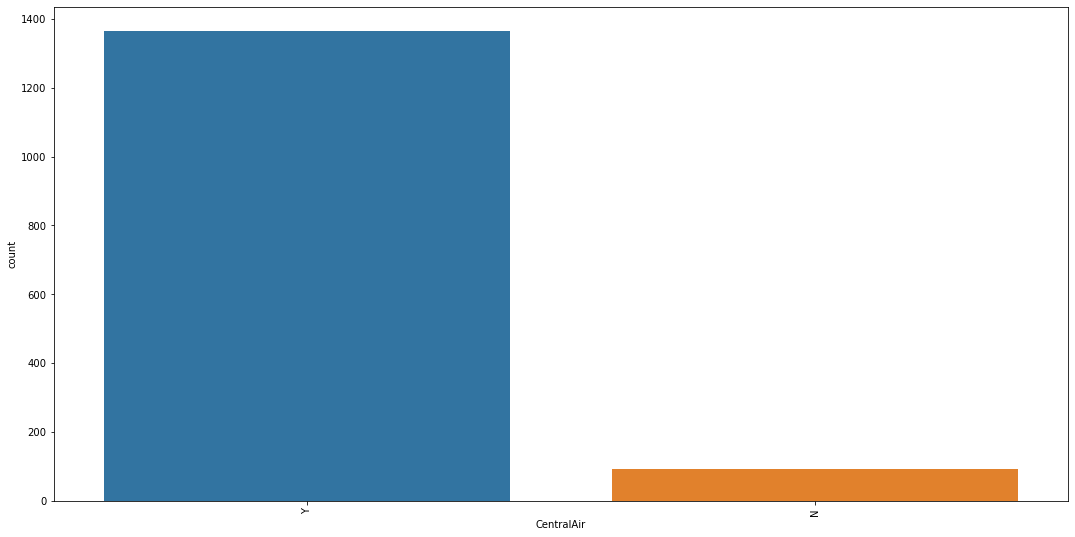

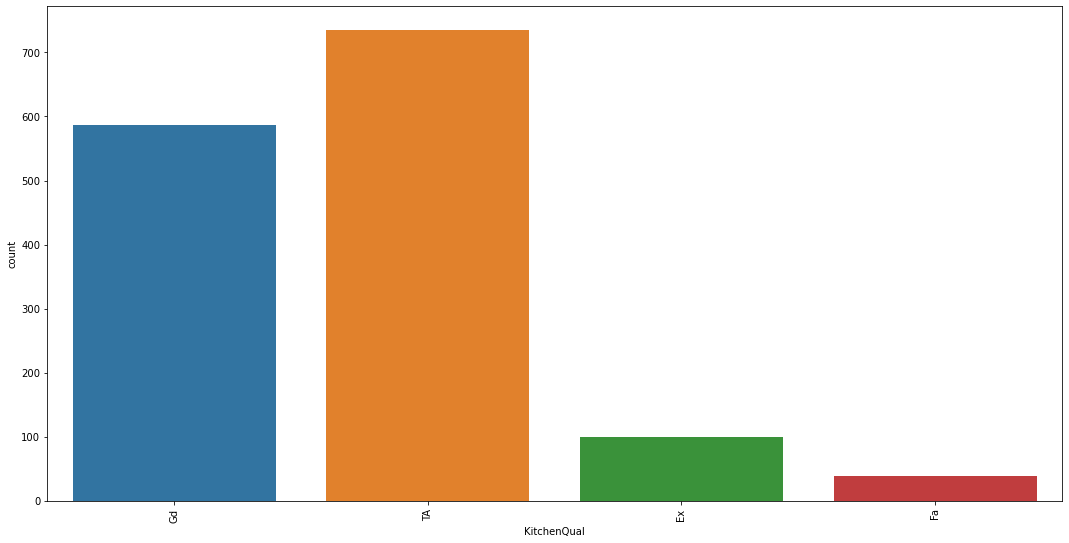

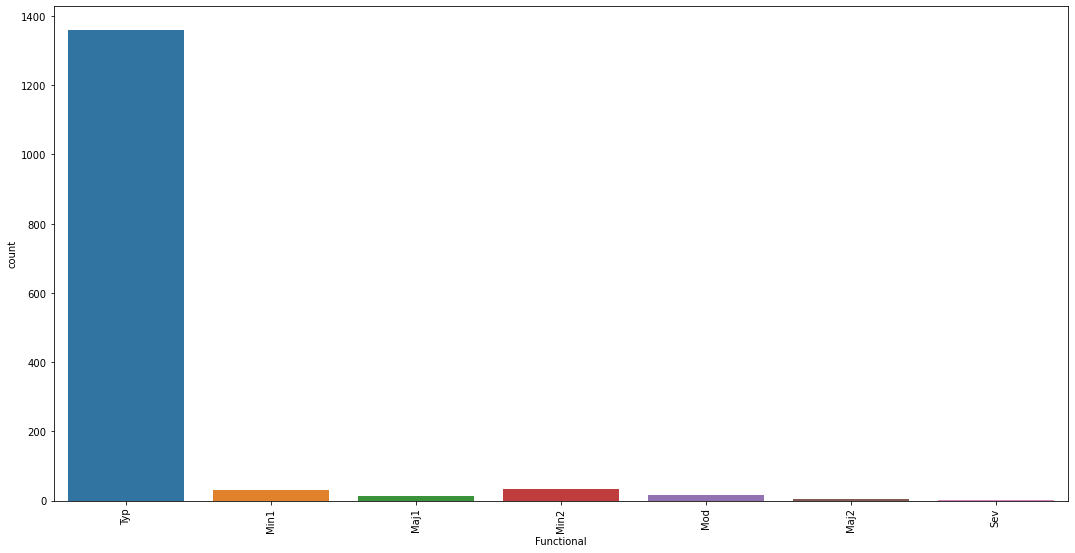

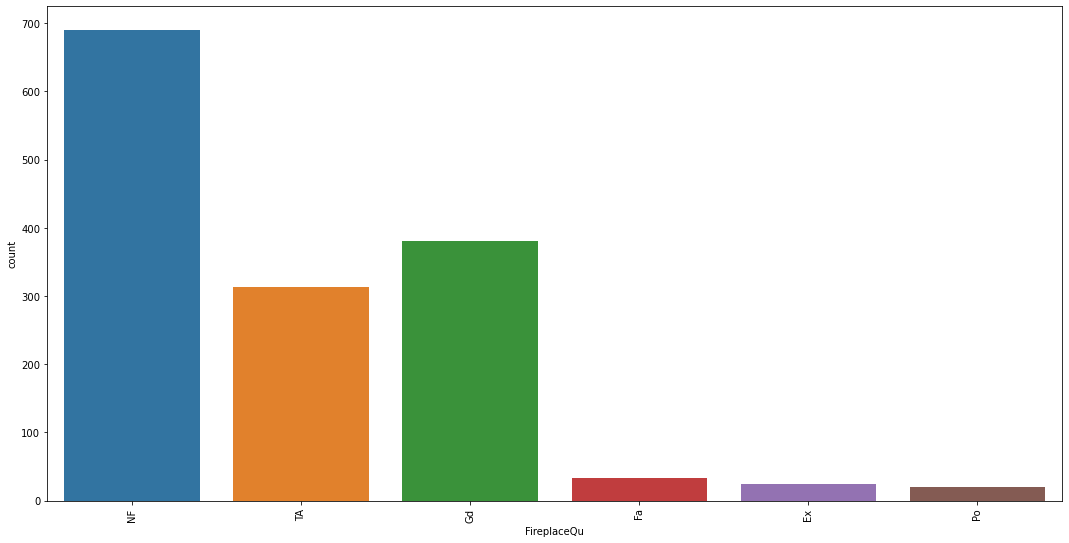

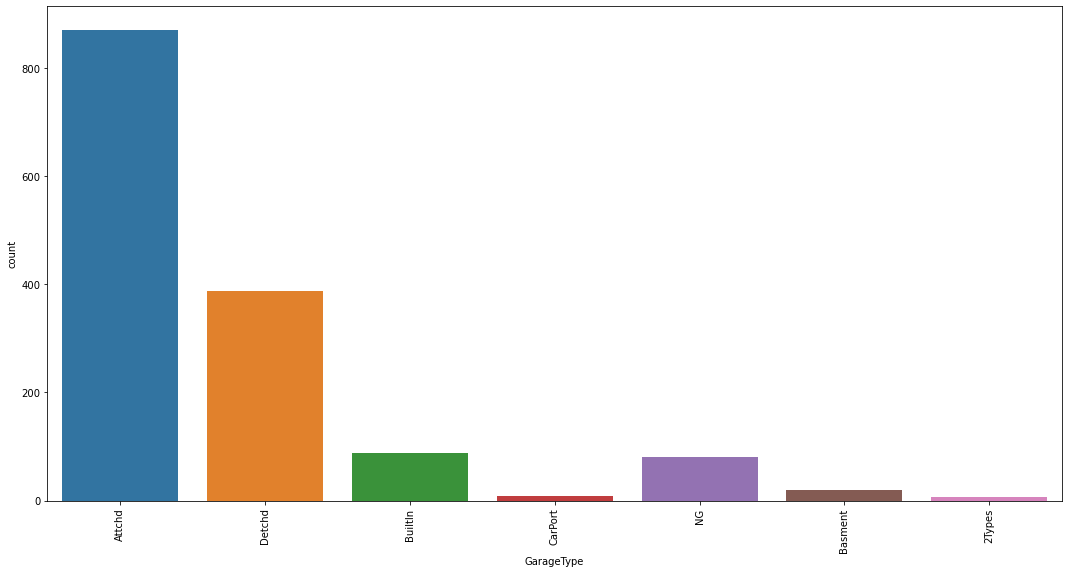

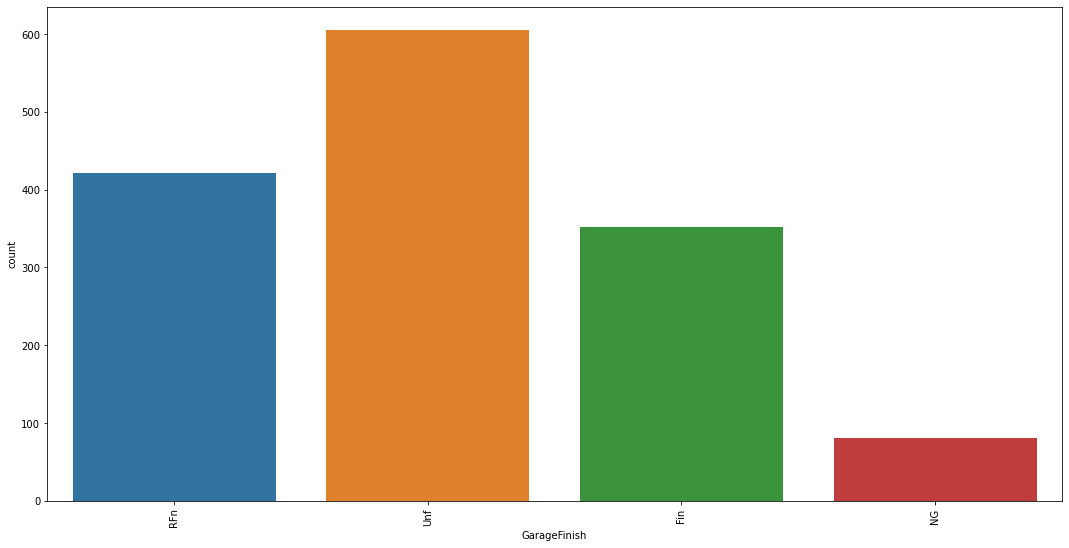

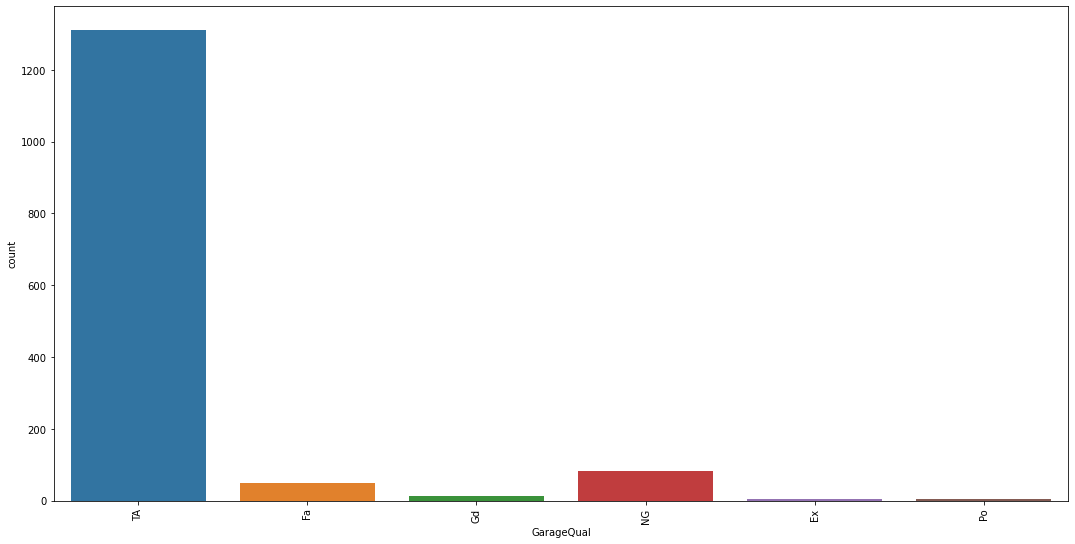

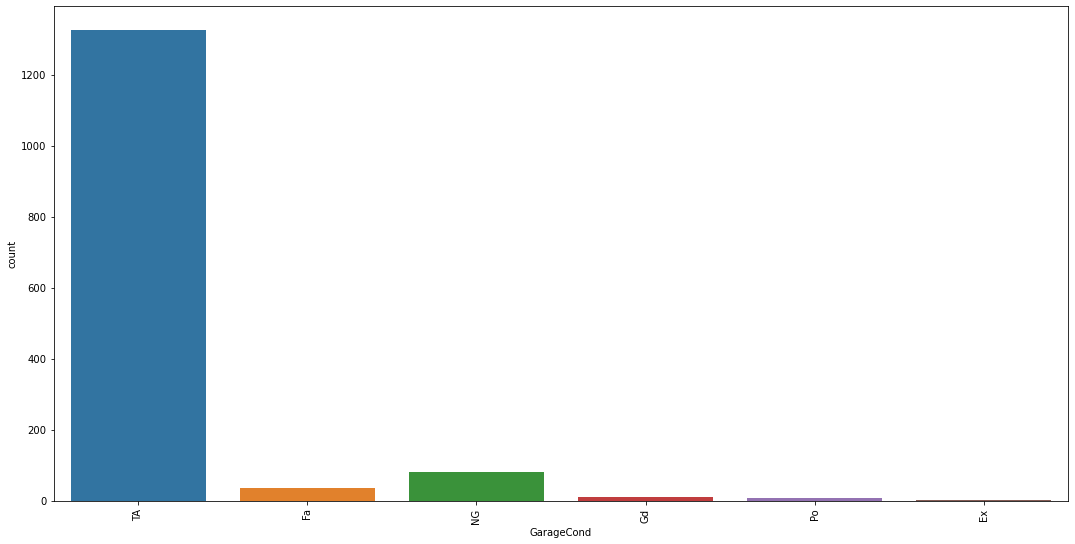

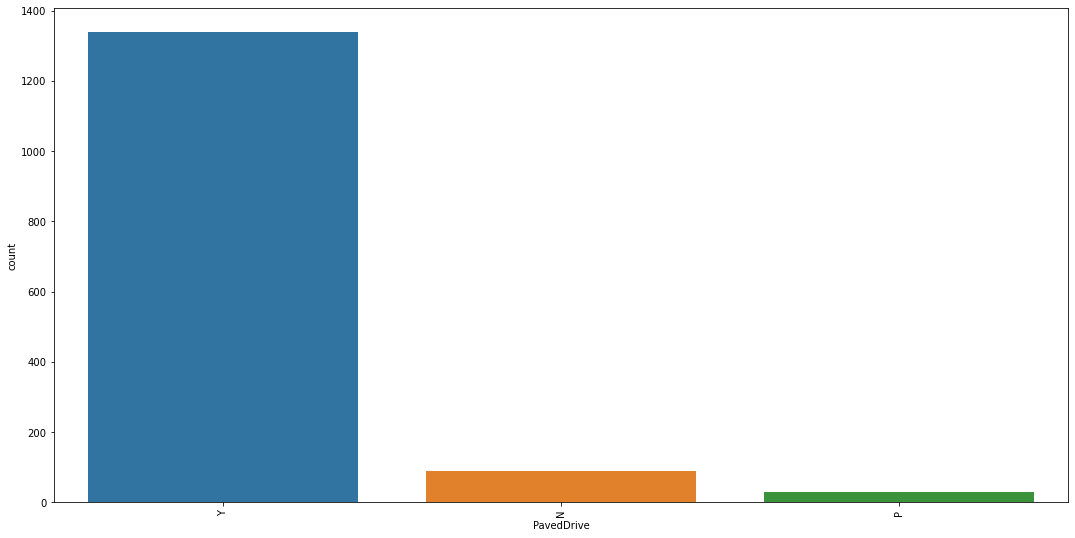

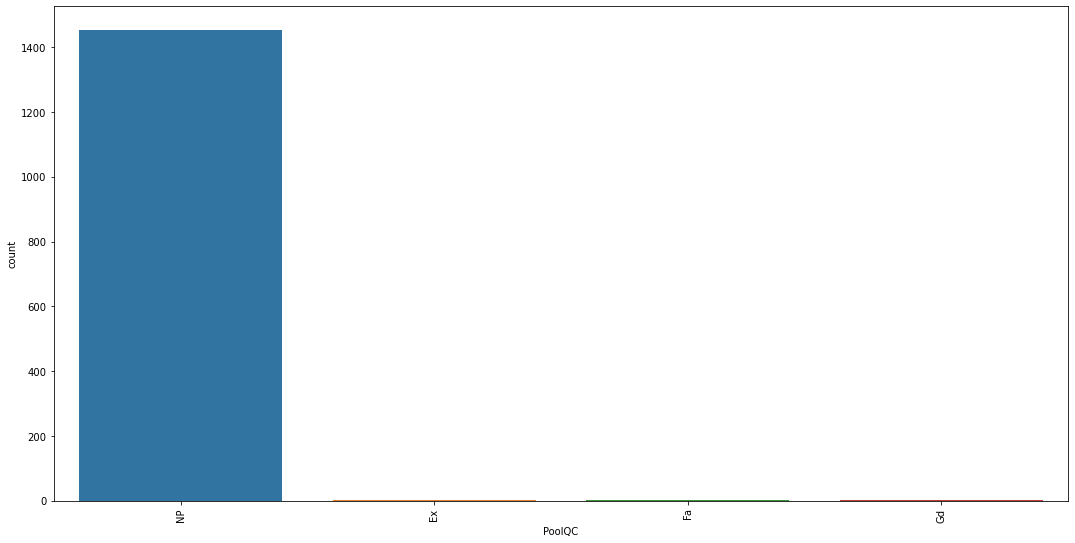

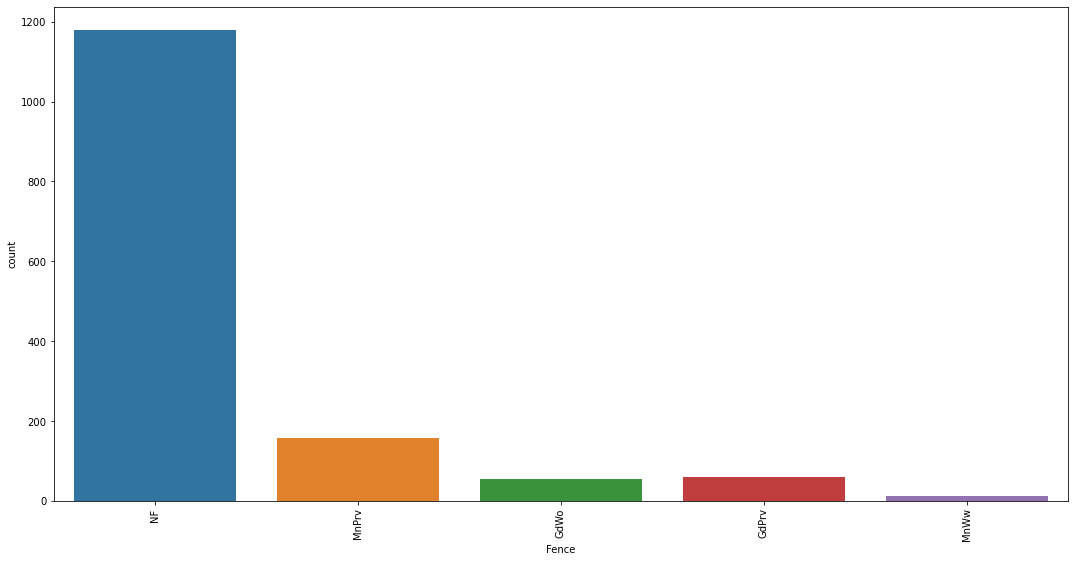

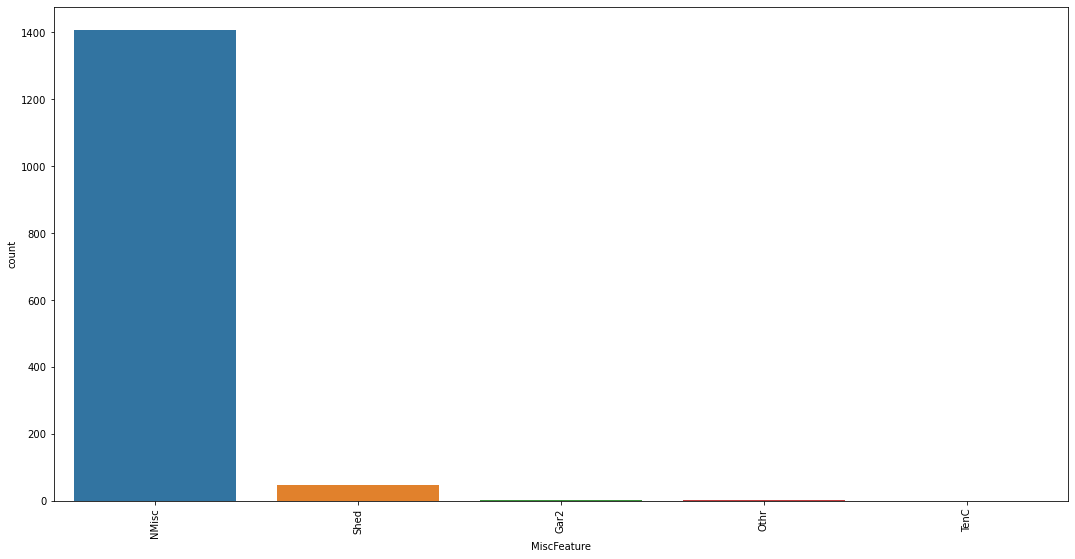

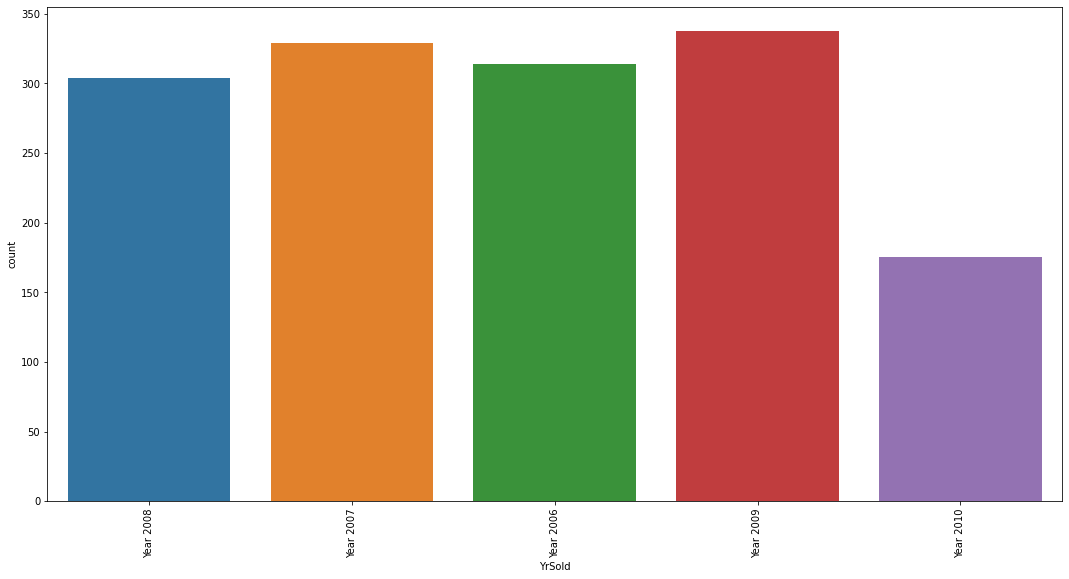

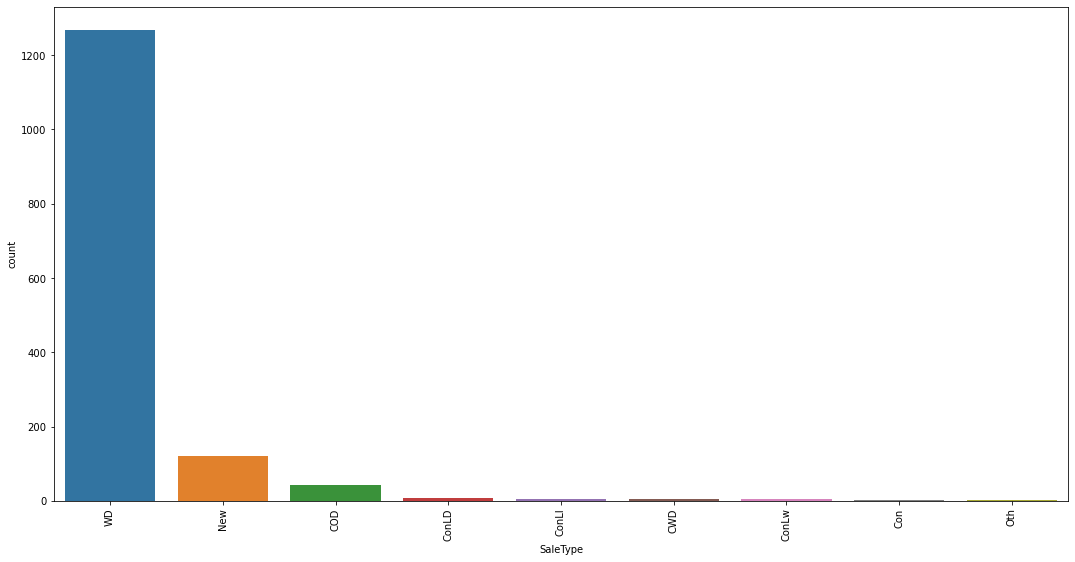

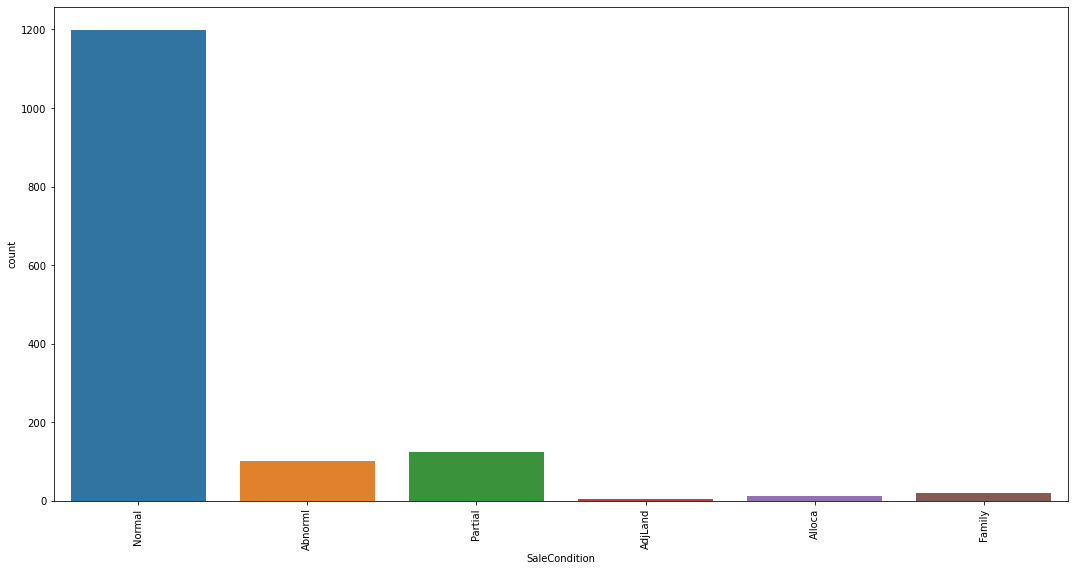

In [15]:
for i in housing.columns:
  x = housing[i].dtypes
  if x == 'object':
    #print('yes')
    plt.figure(figsize=(40, 20))
    plt.subplot(2,2,1)
    sns.countplot(data= housing,x= i)
    plt.xticks(rotation=90)

    plt.show()

Let visualize the categorical columns data vs target variable Saleprice:

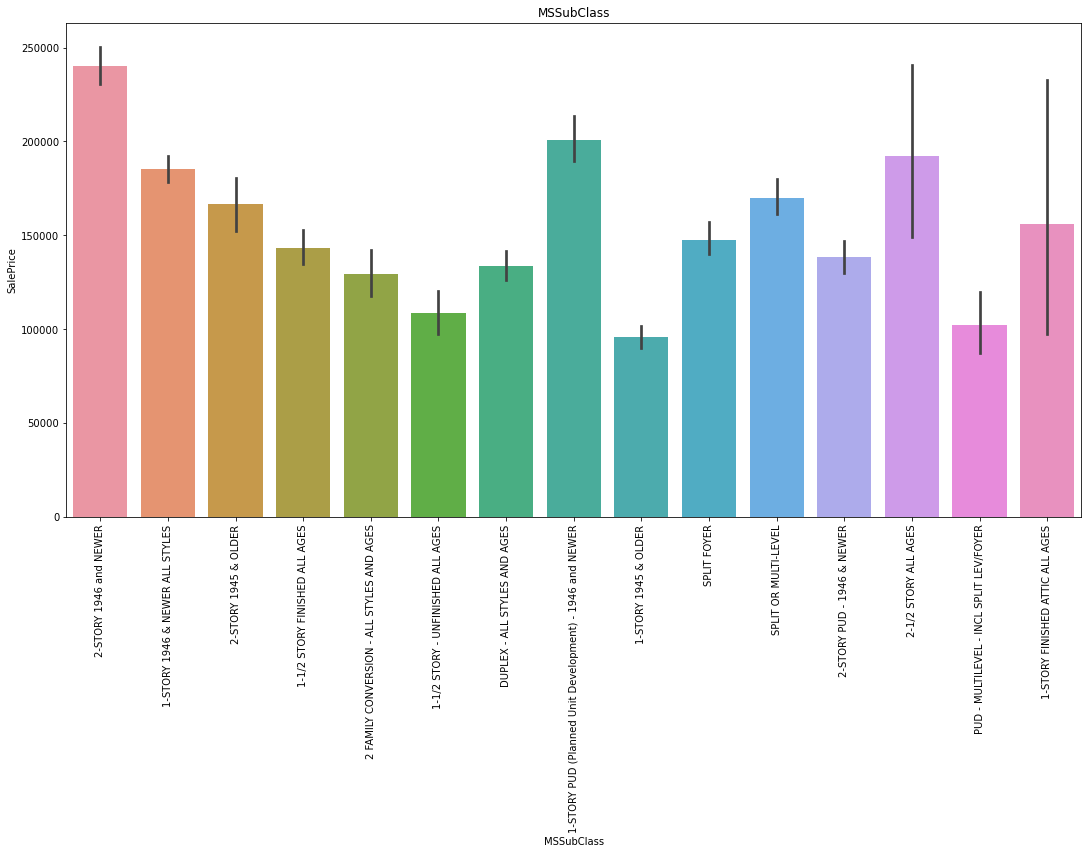

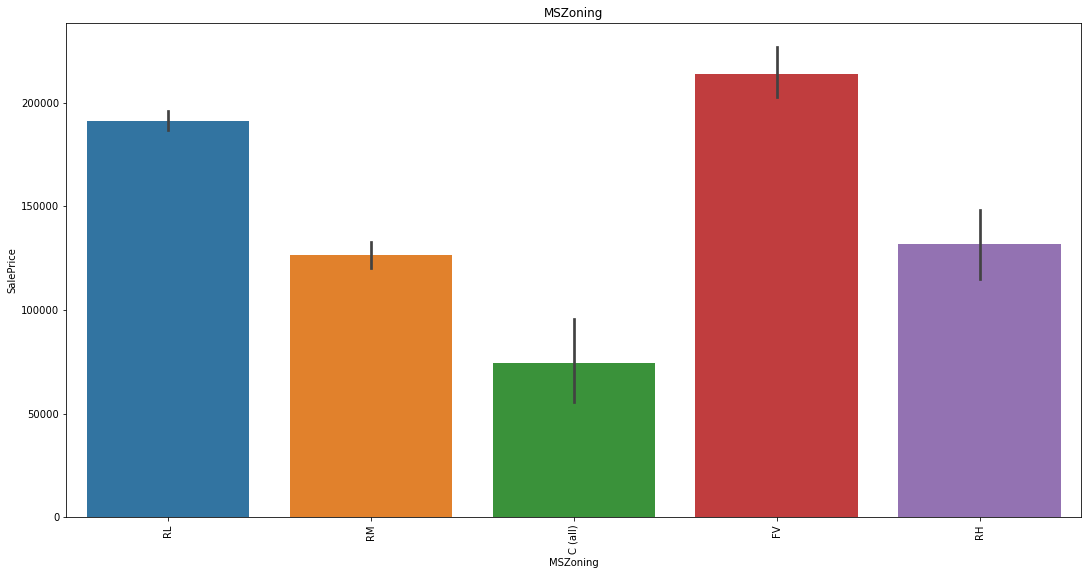

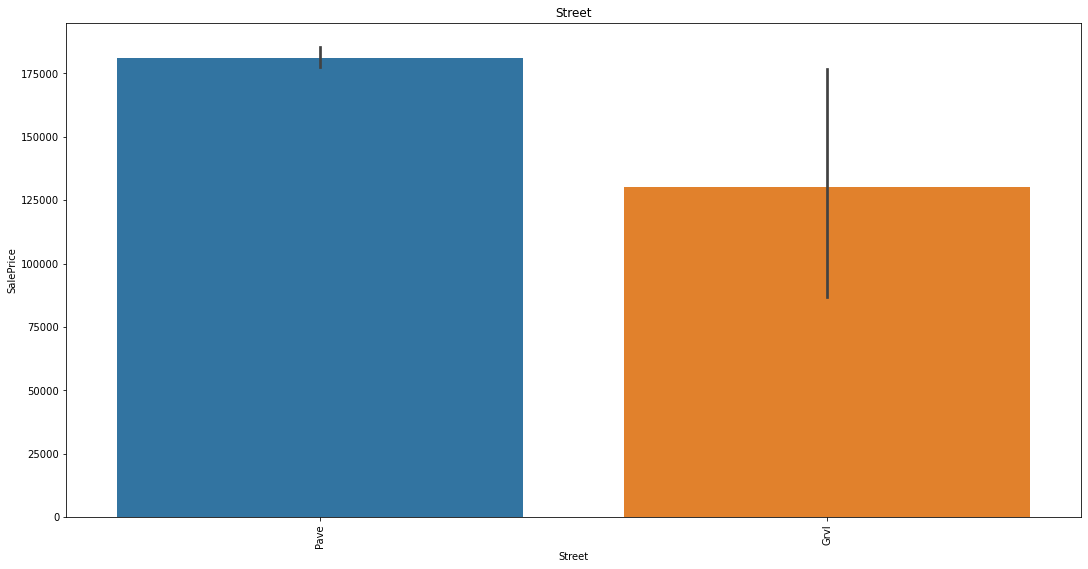

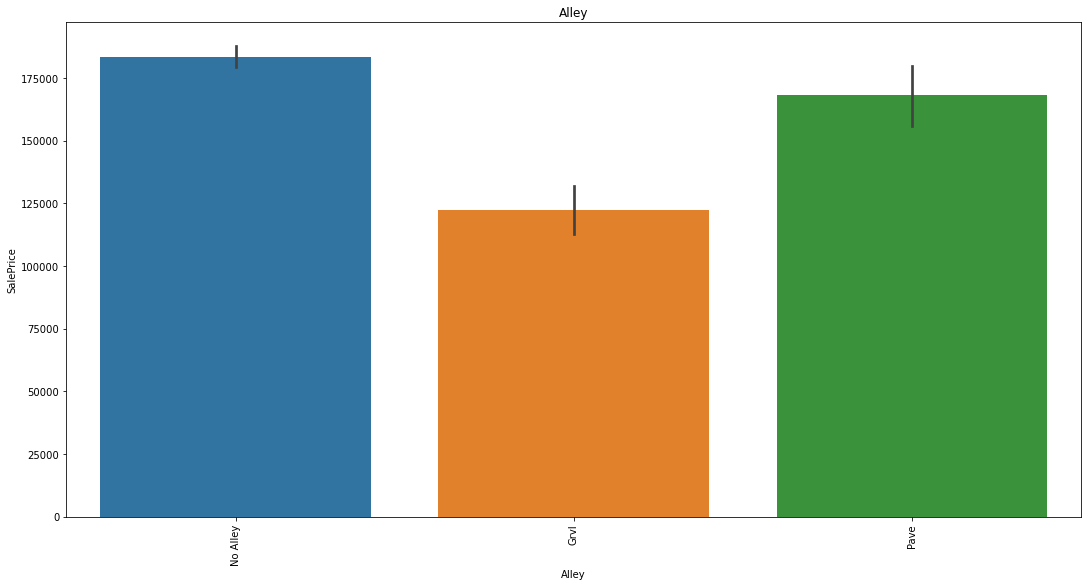

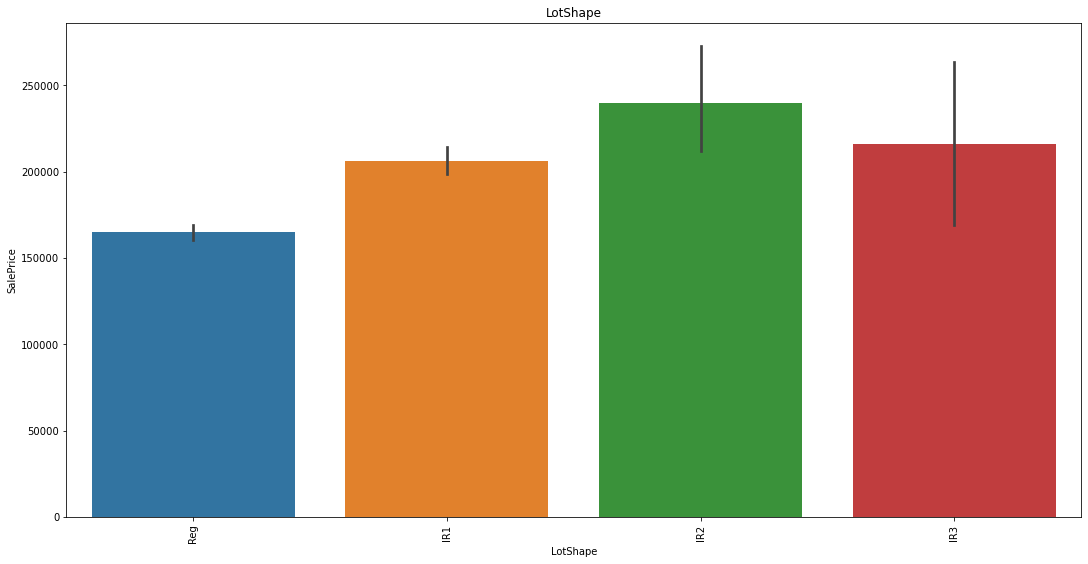

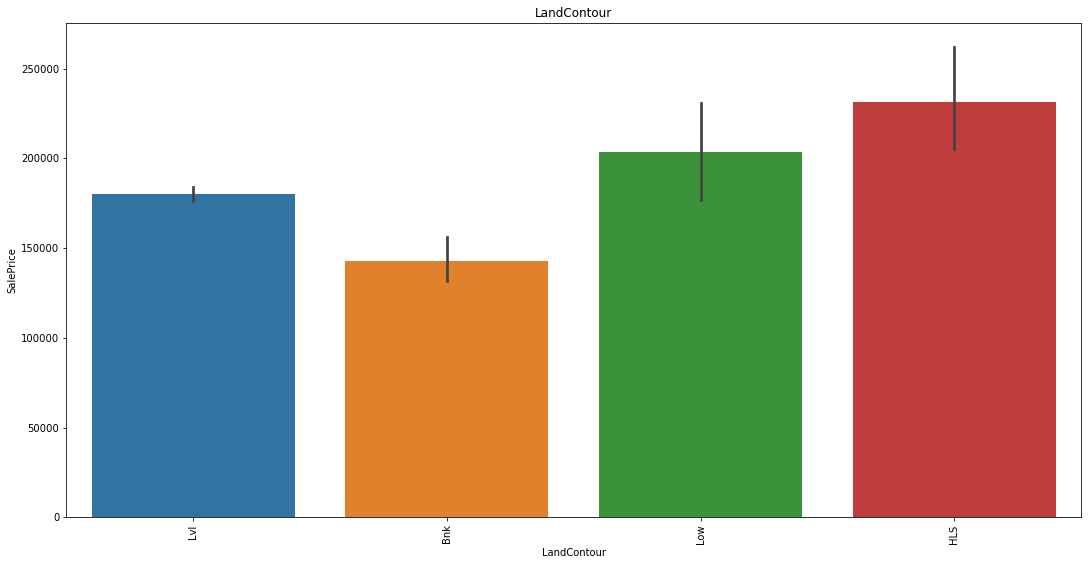

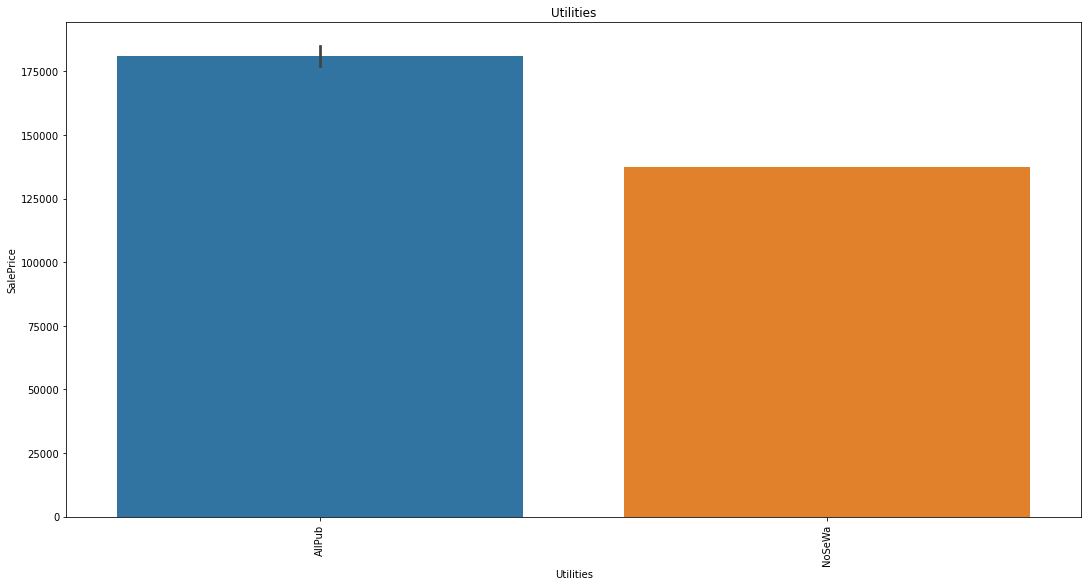

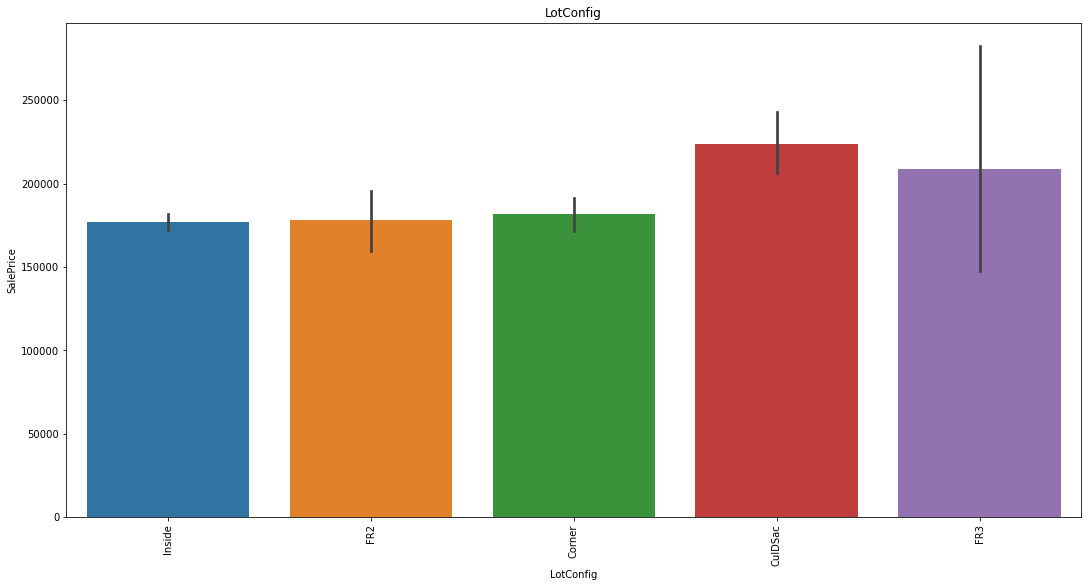

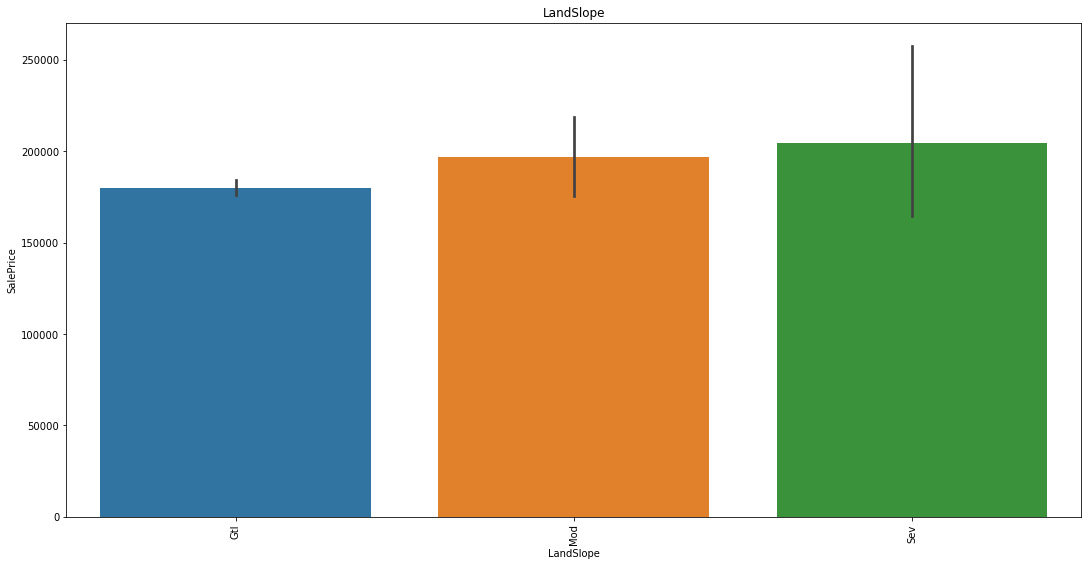

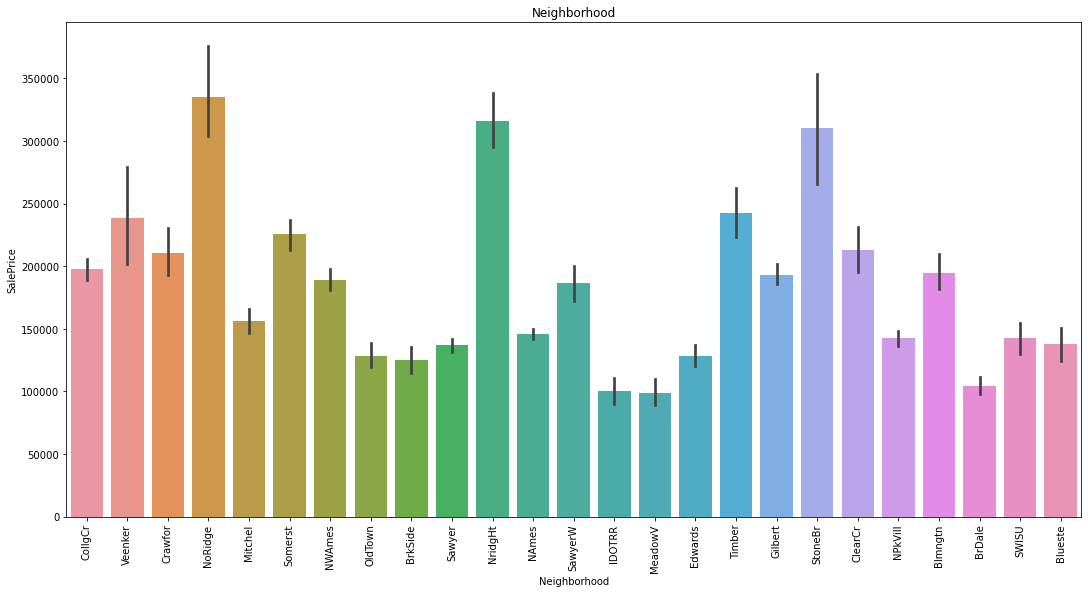

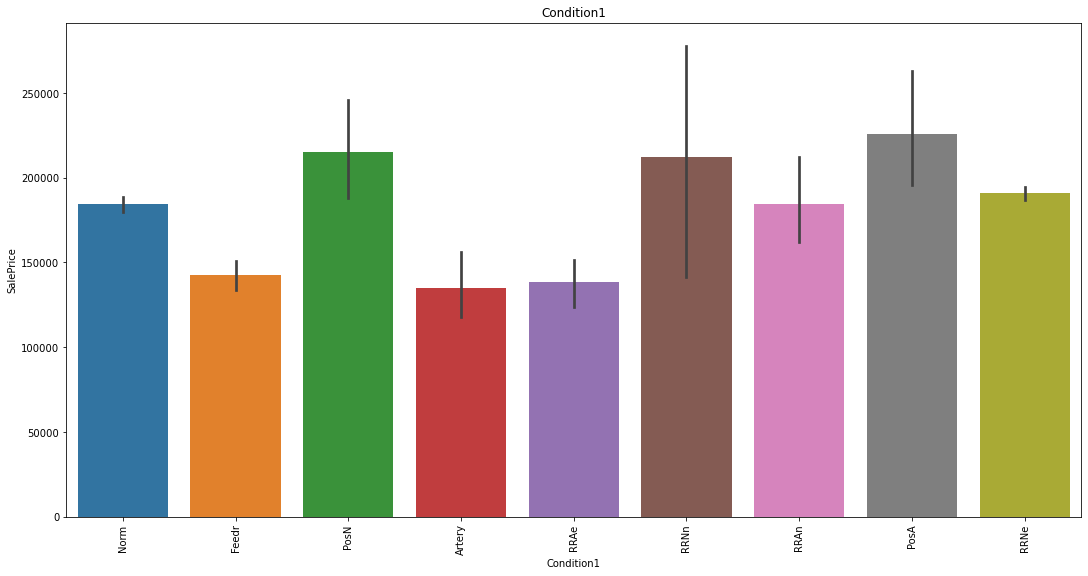

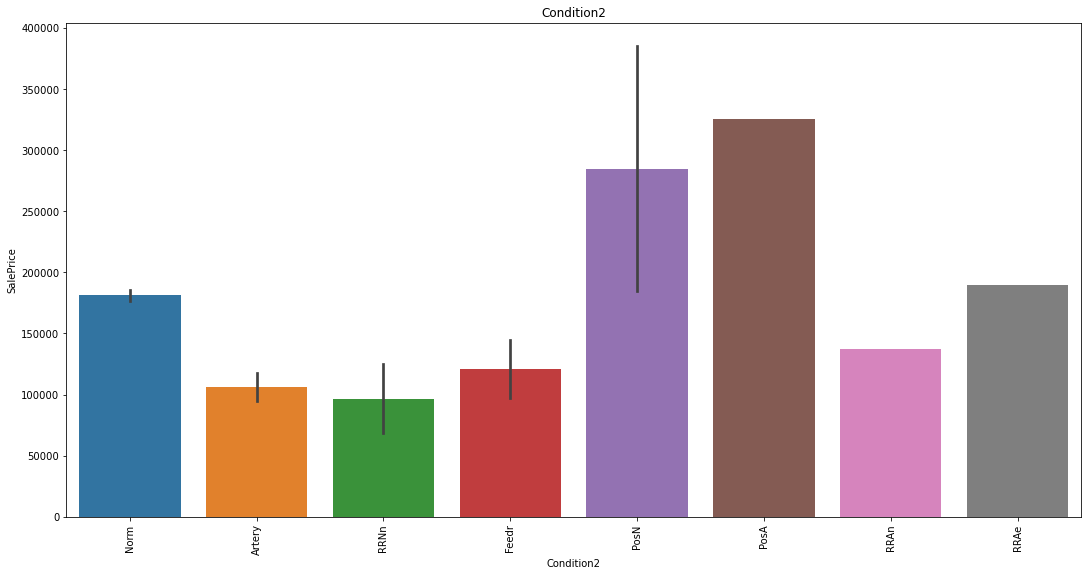

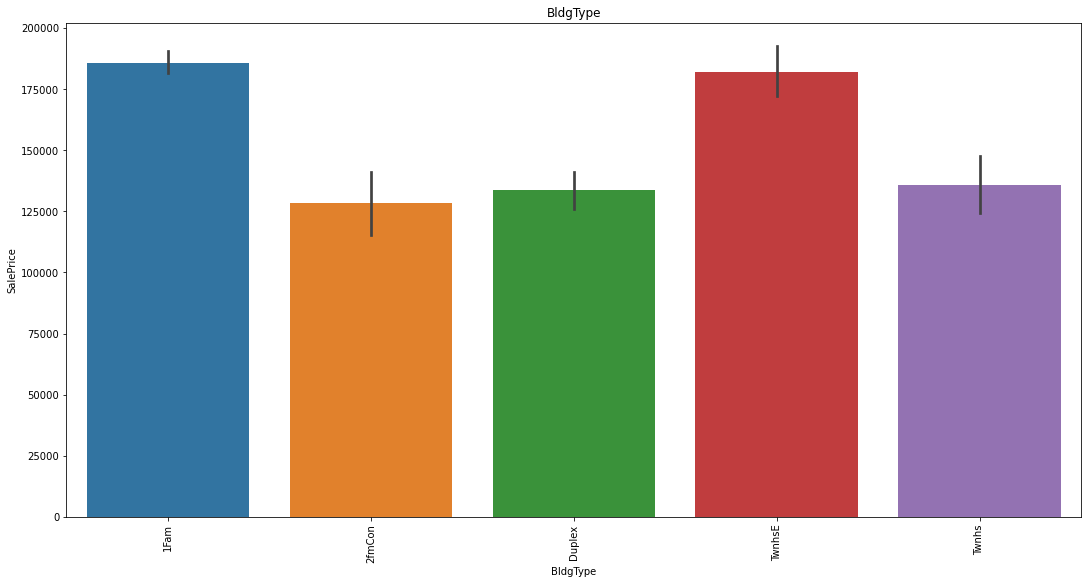

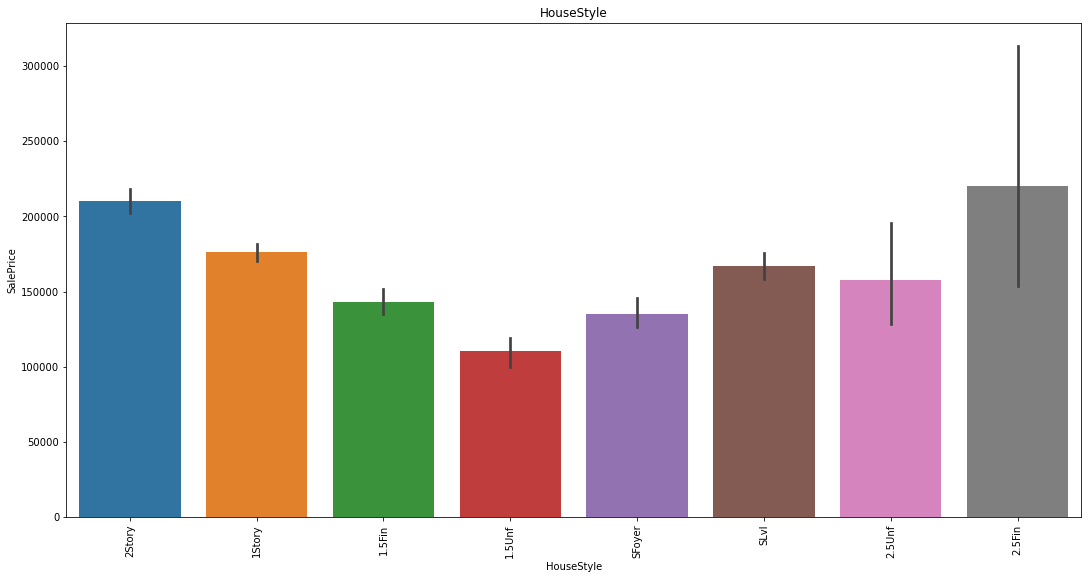

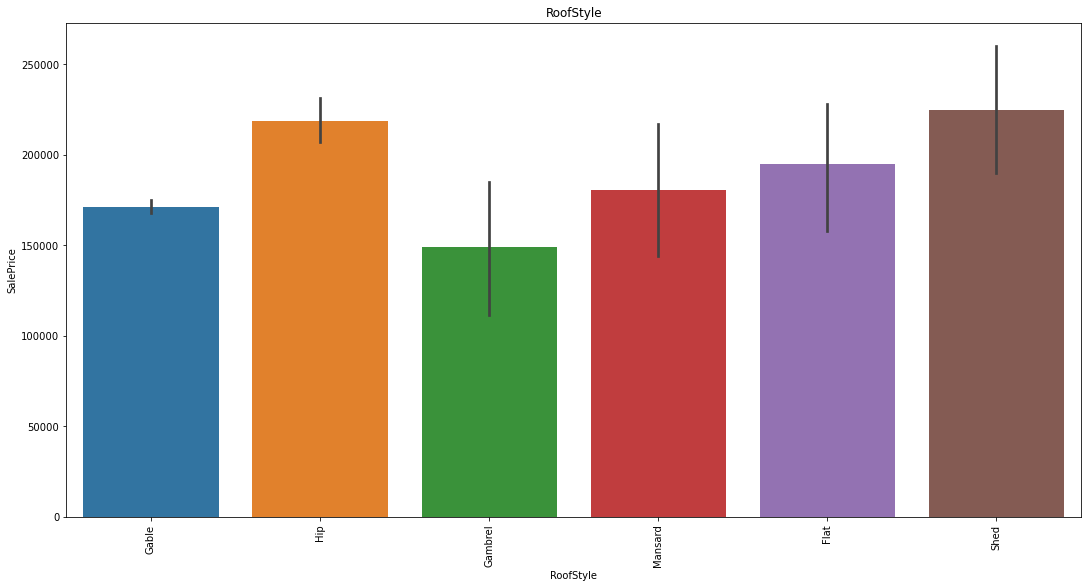

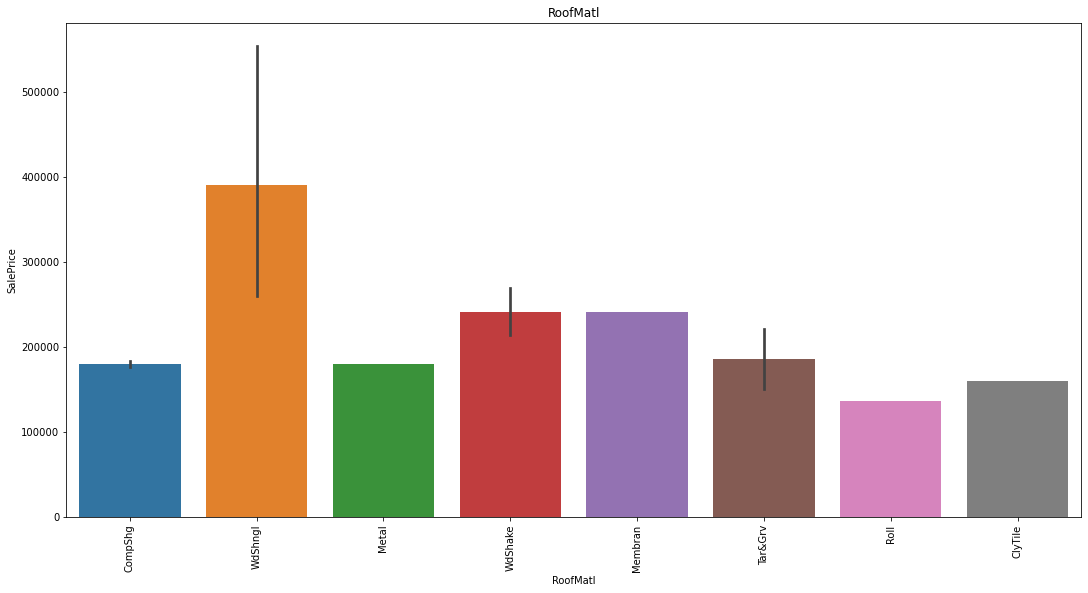

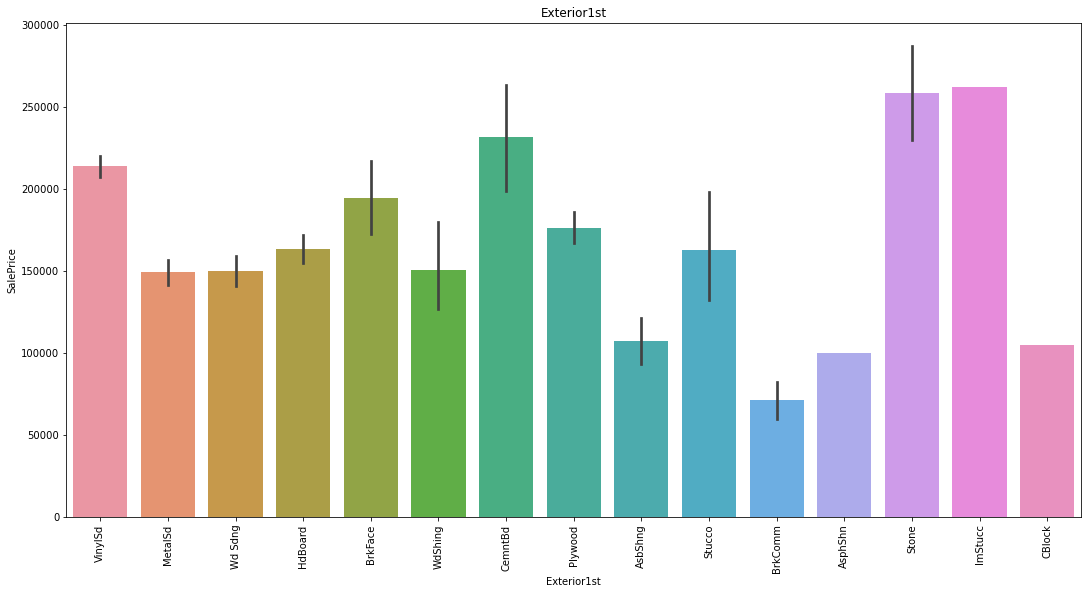

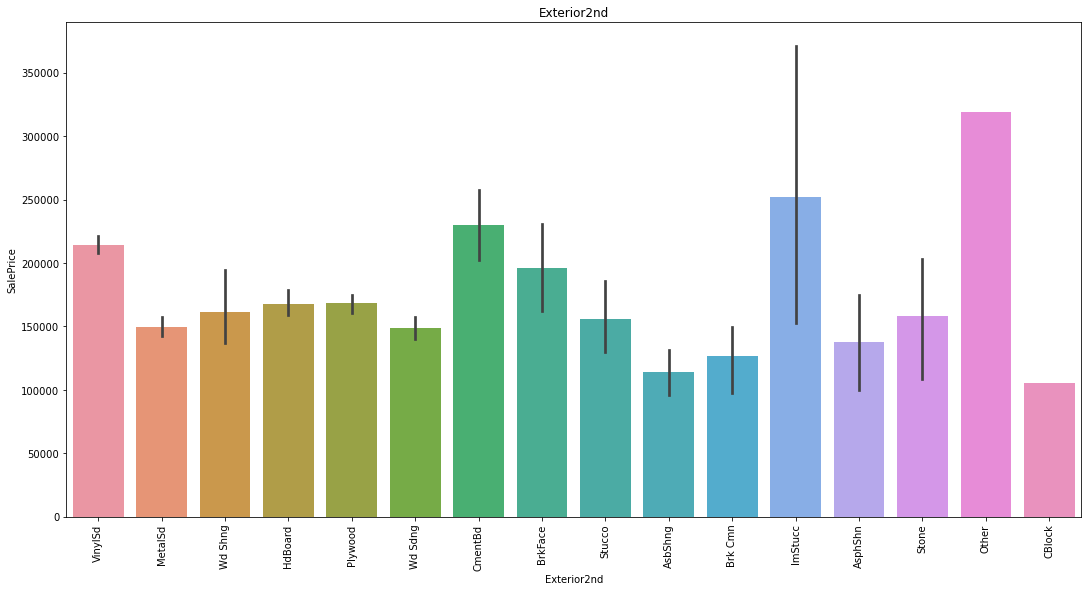

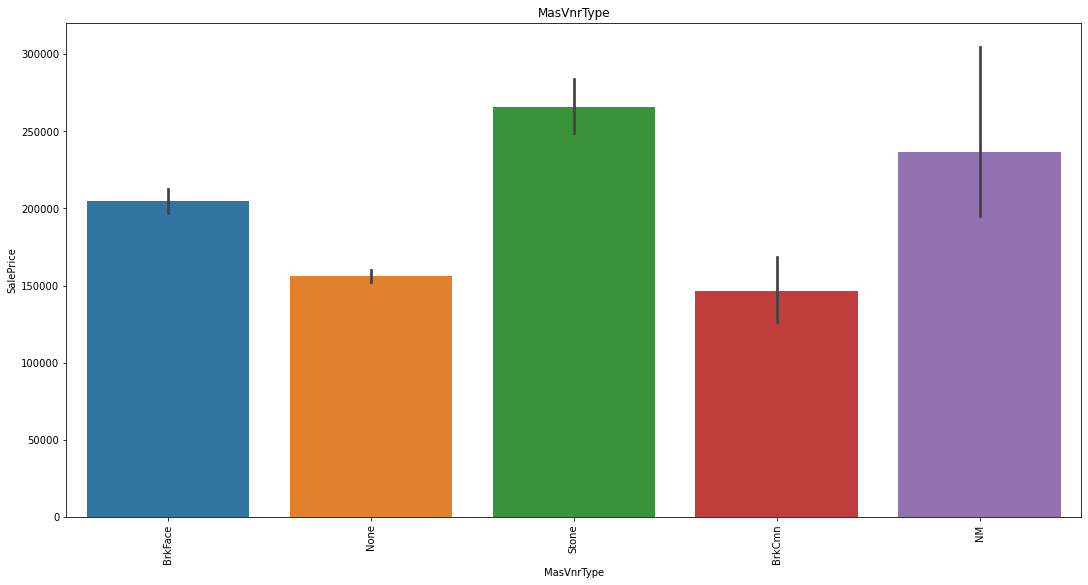

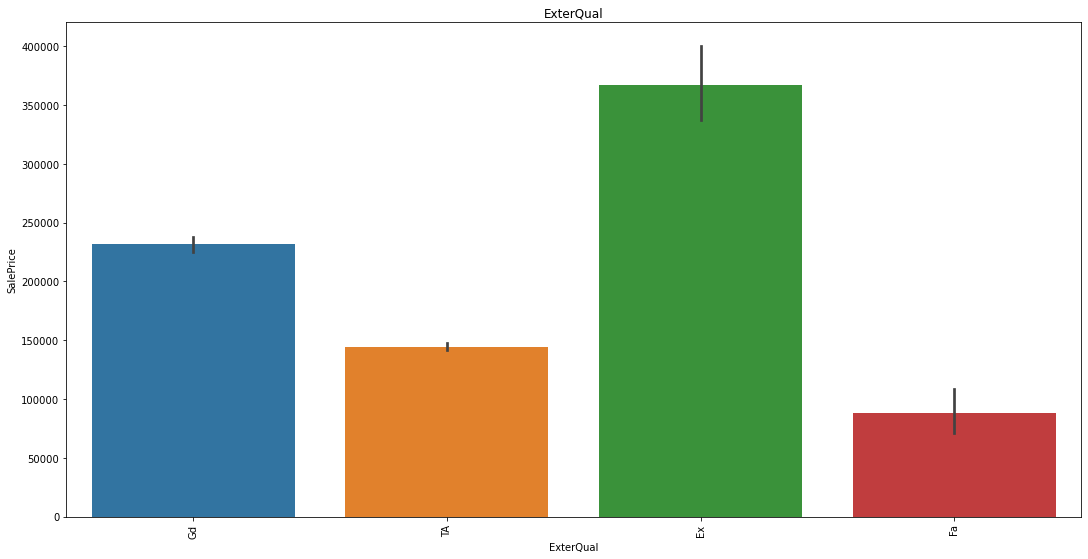

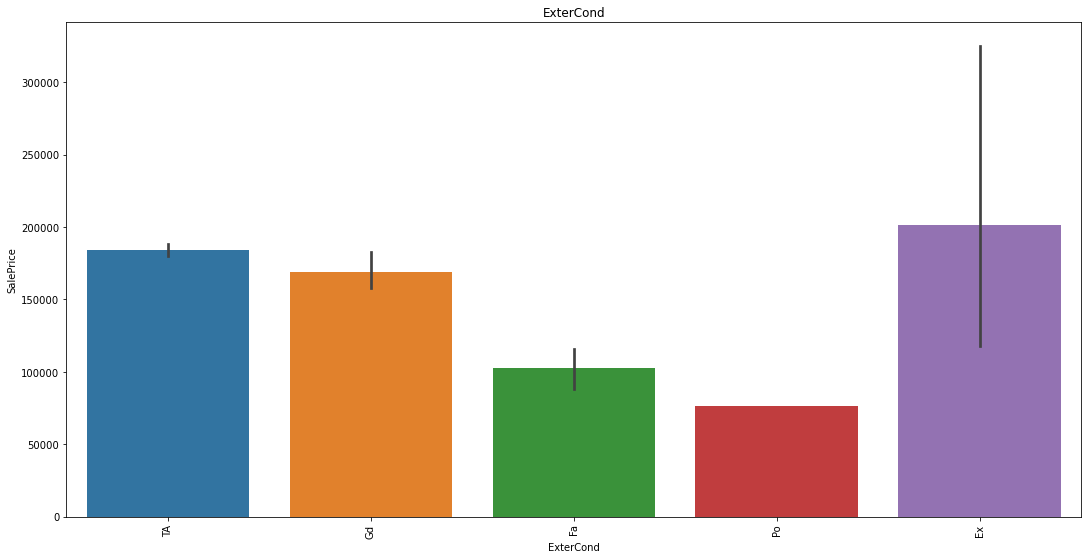

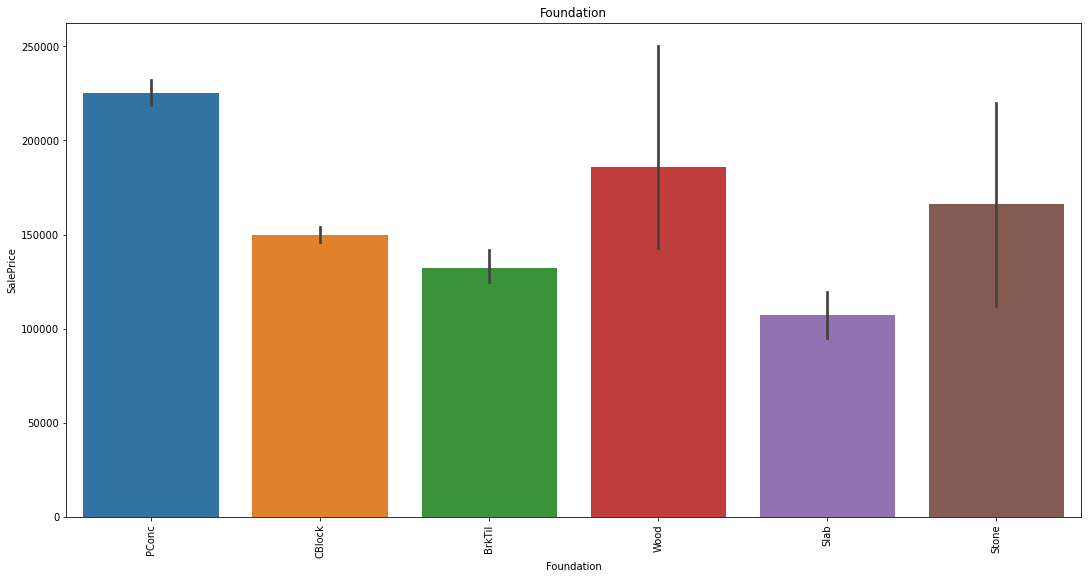

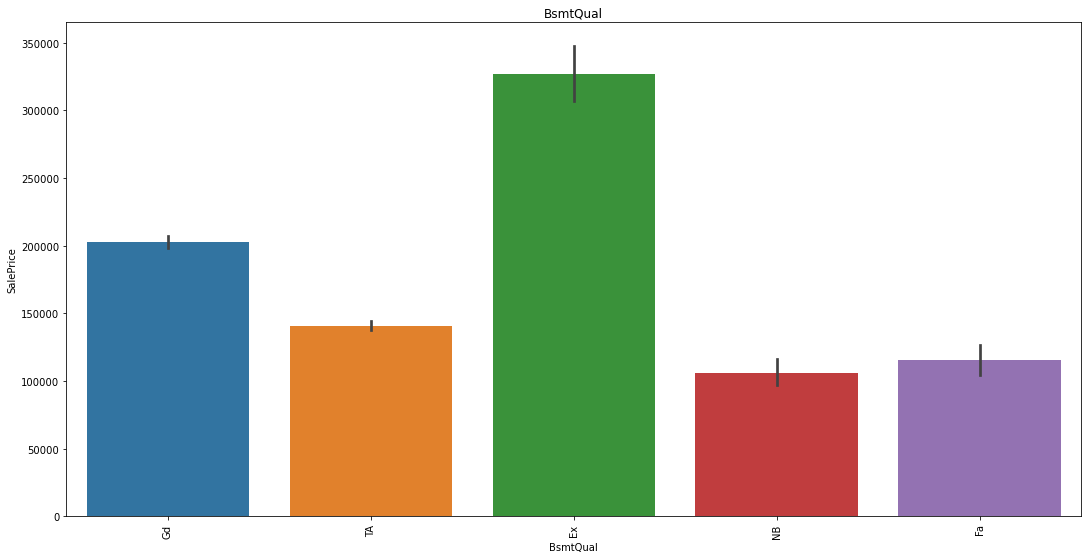

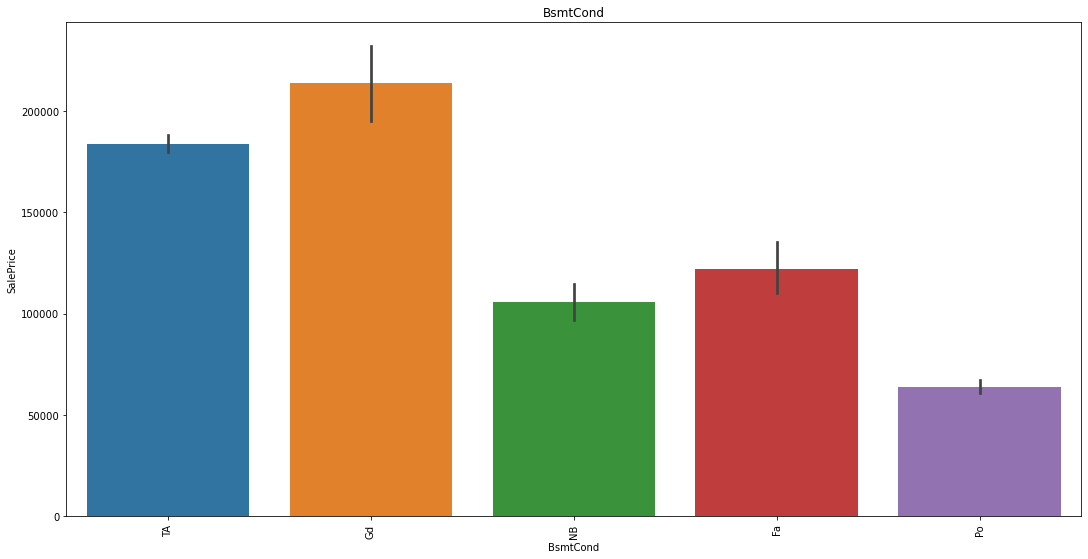

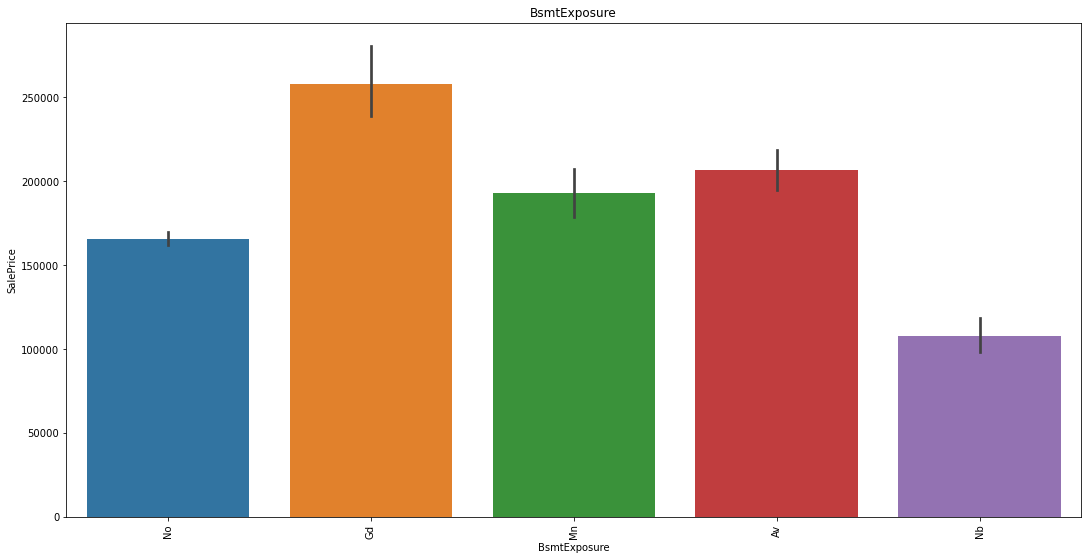

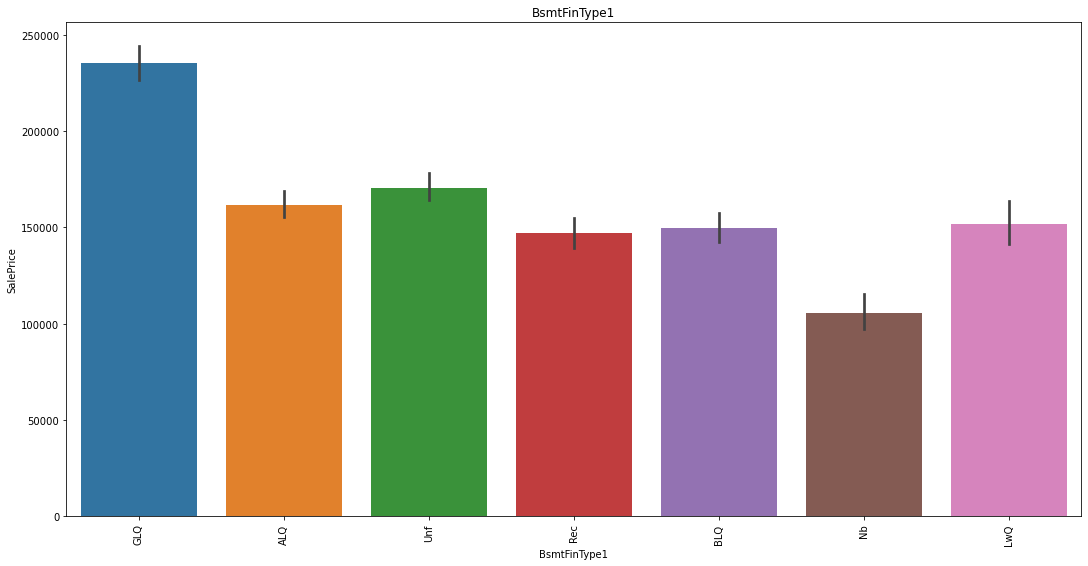

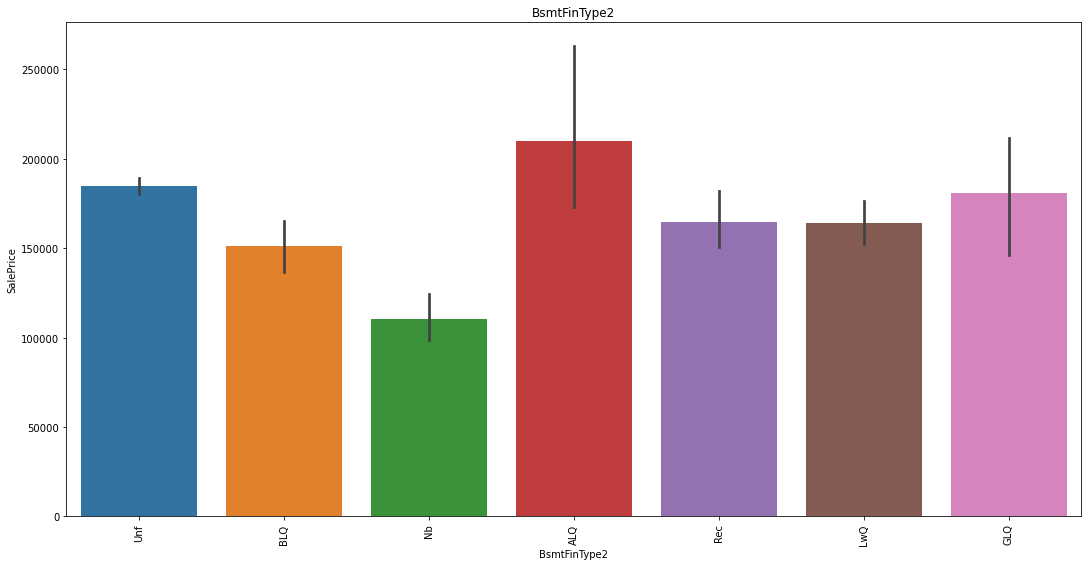

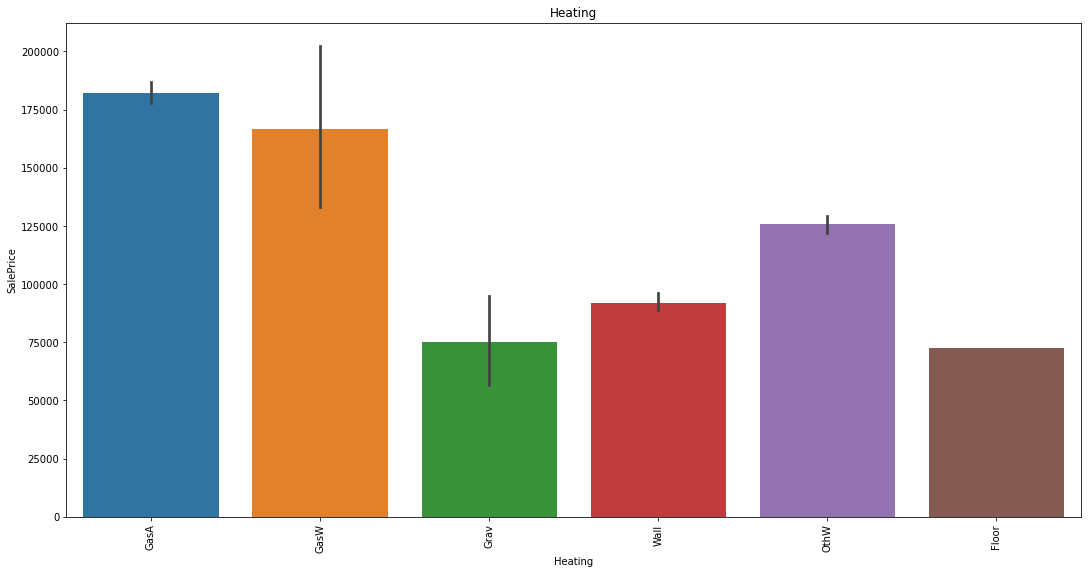

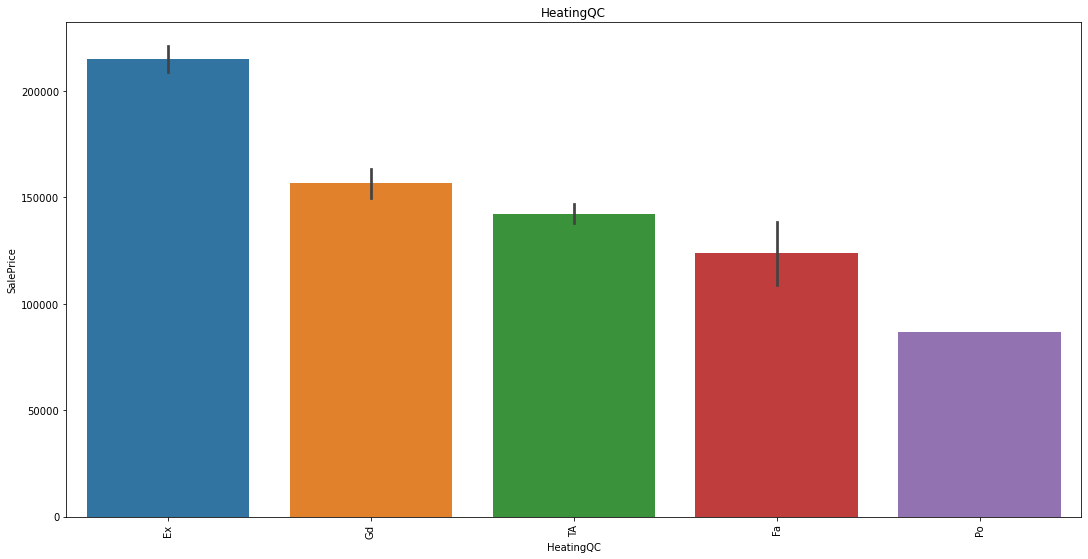

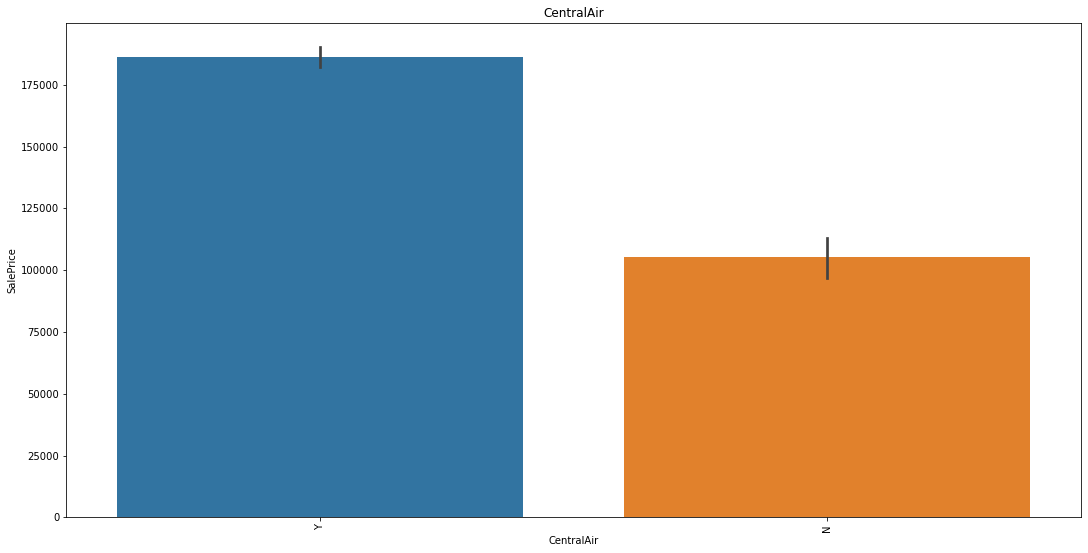

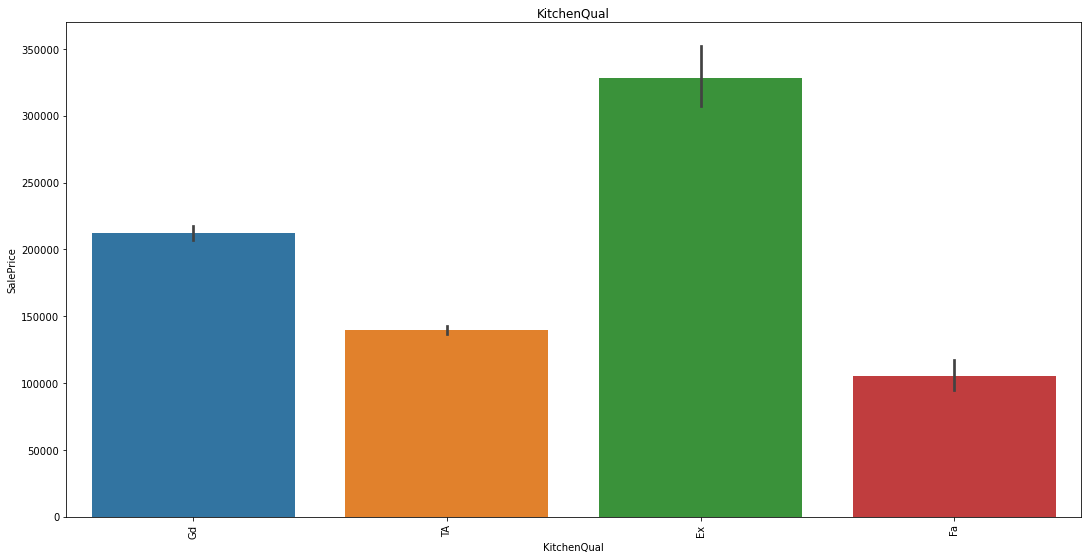

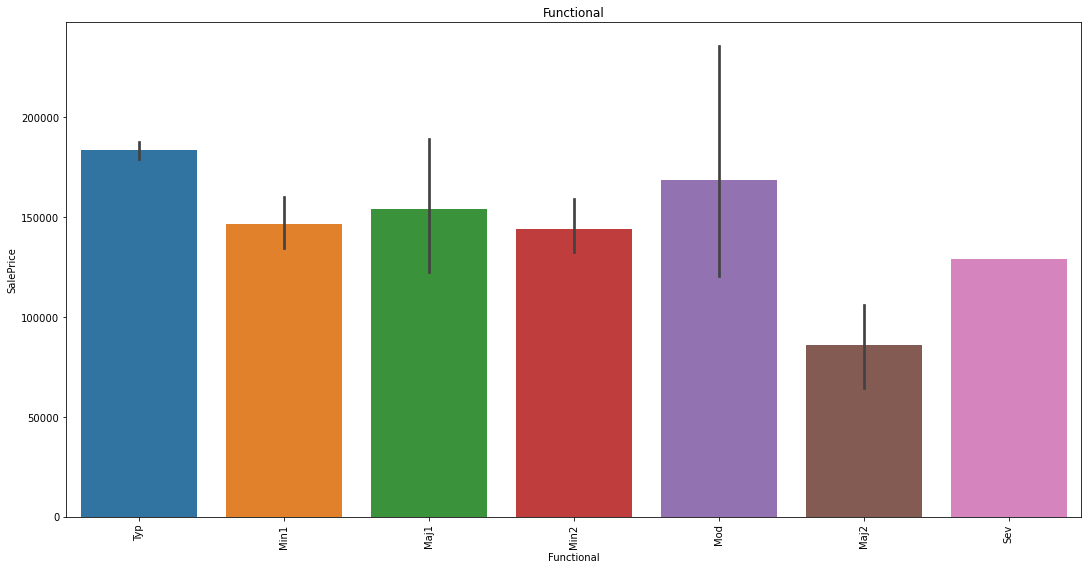

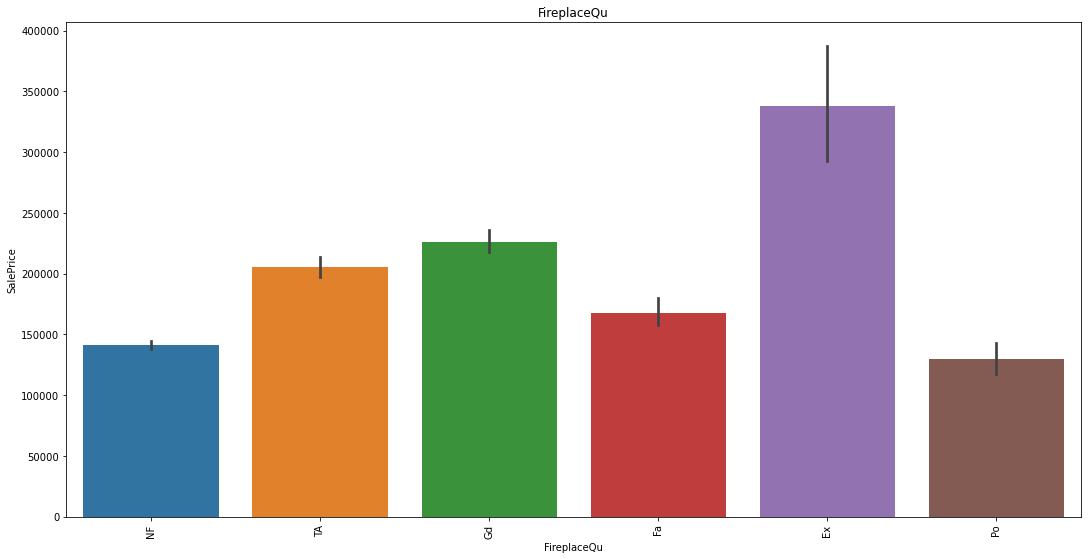

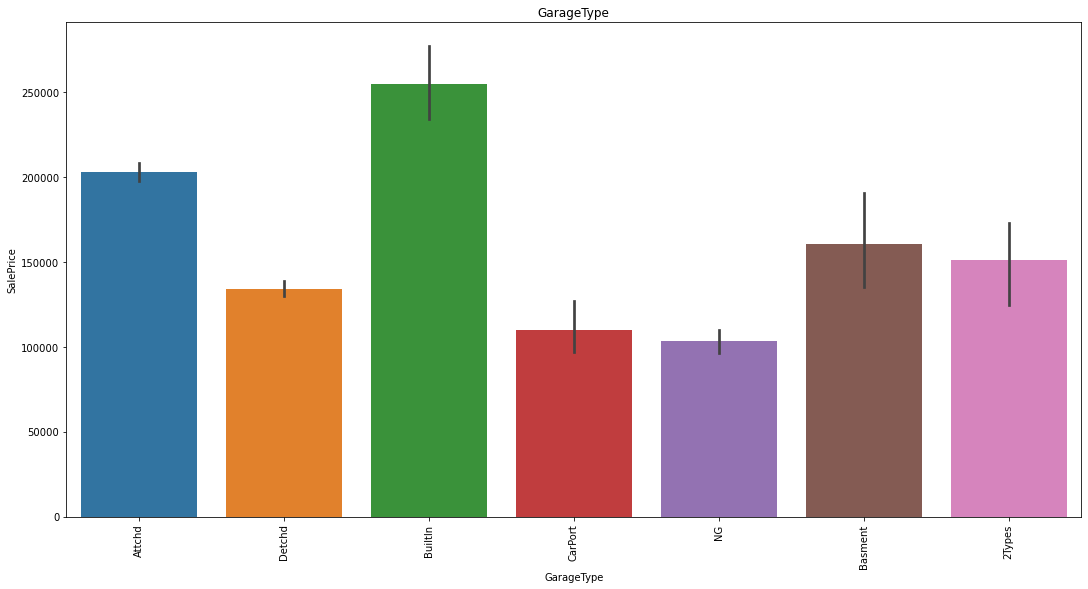

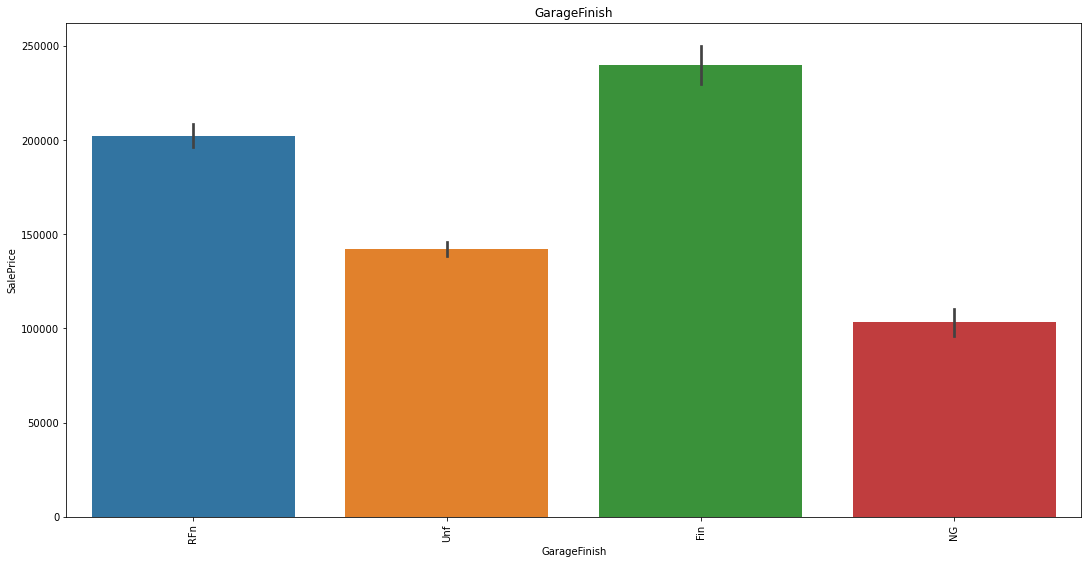

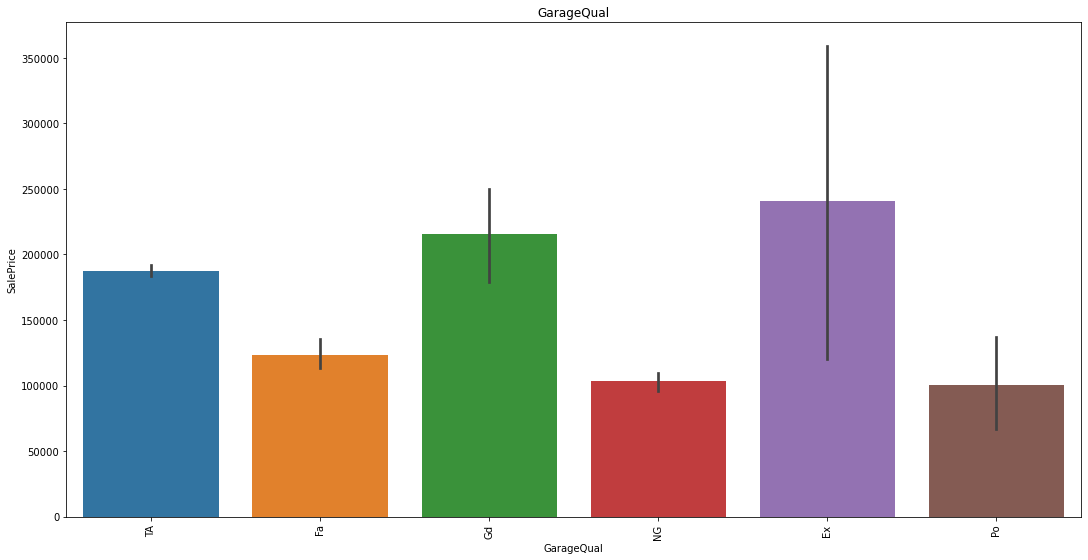

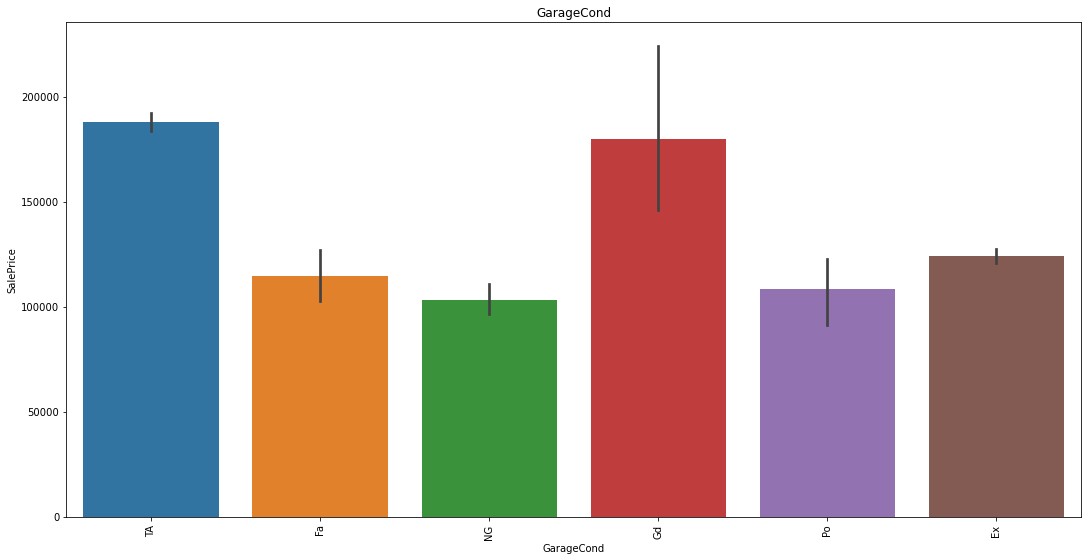

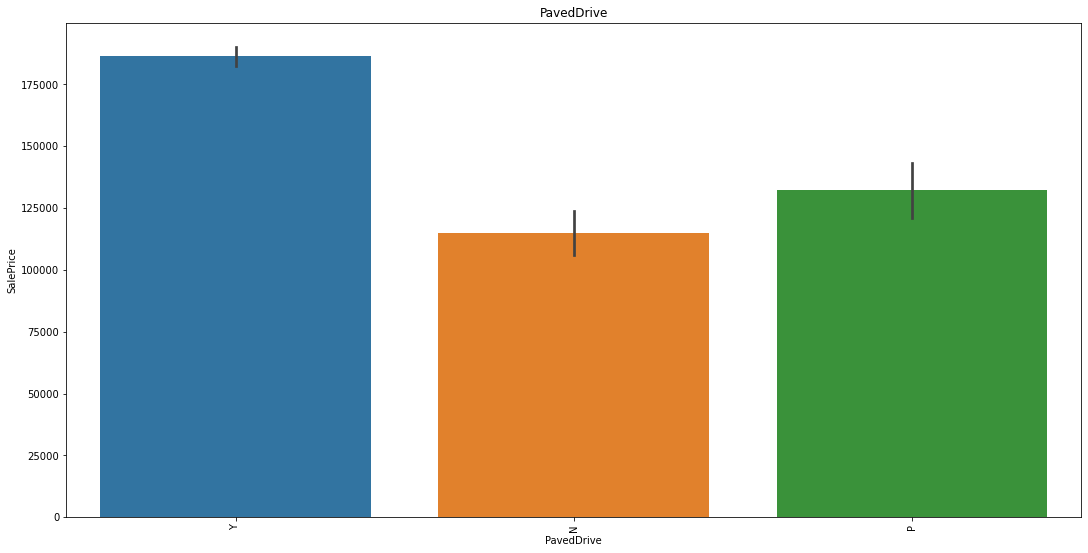

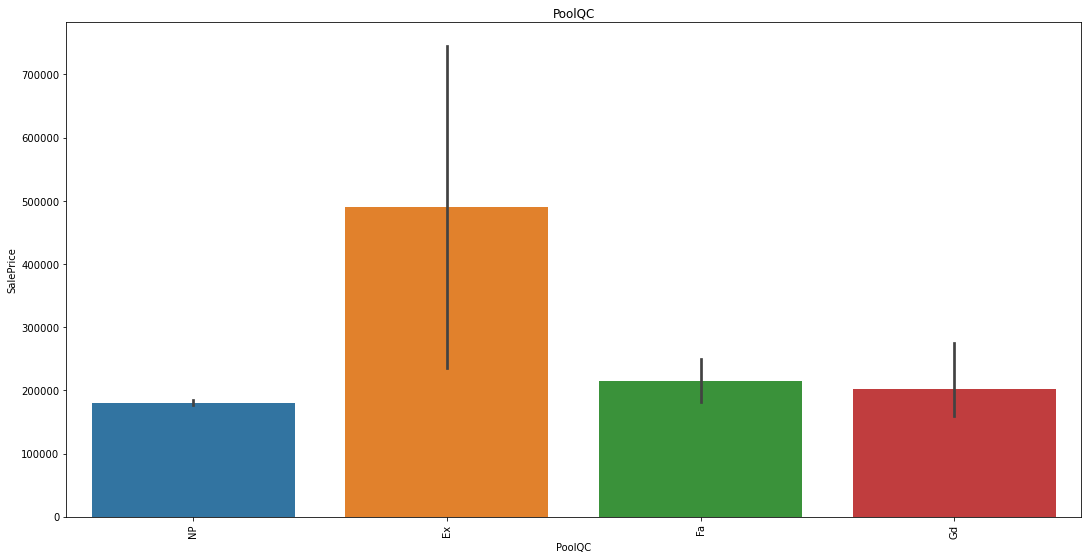

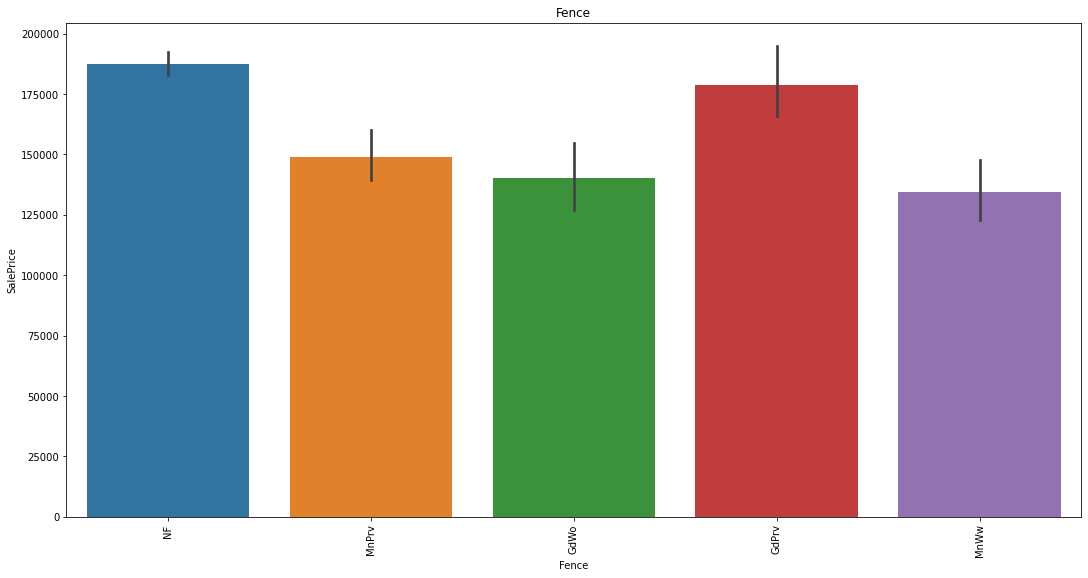

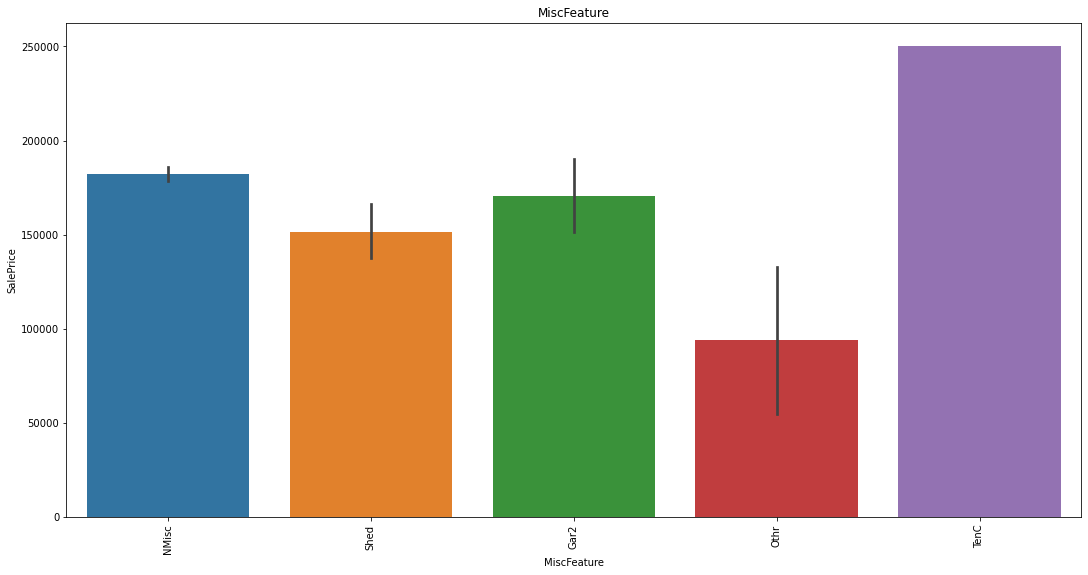

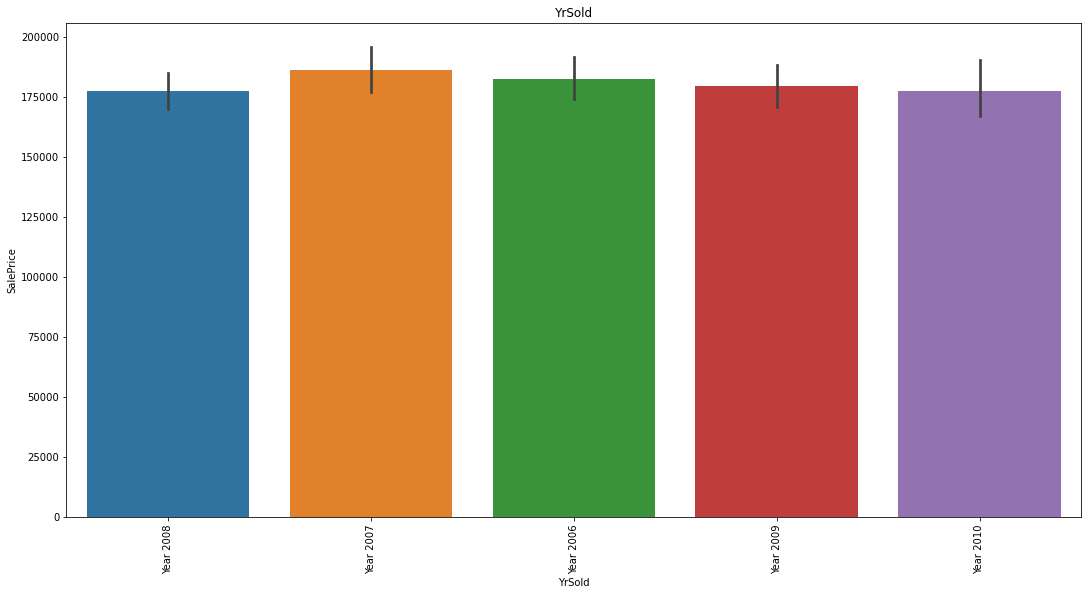

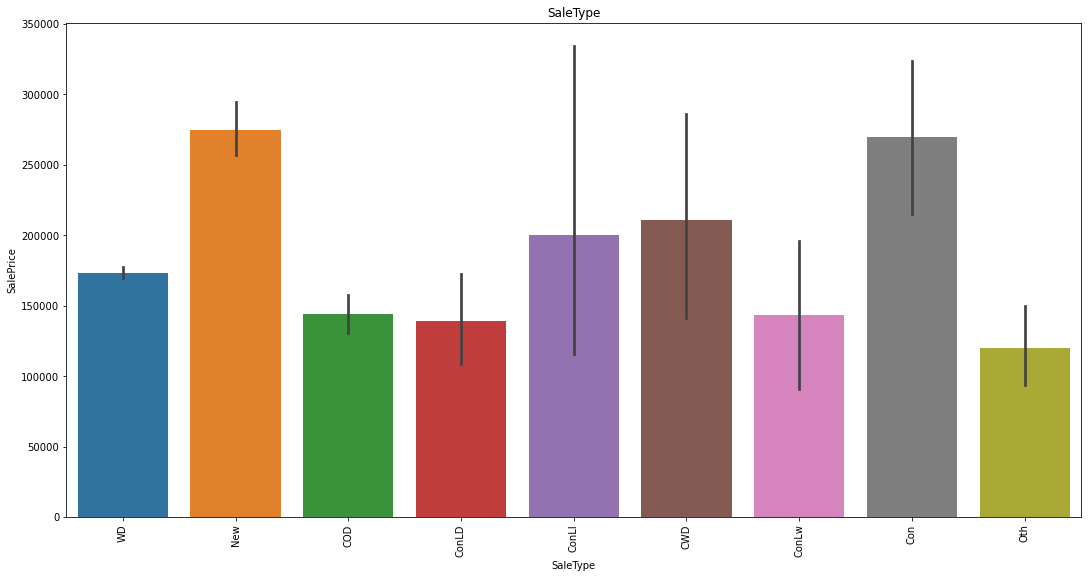

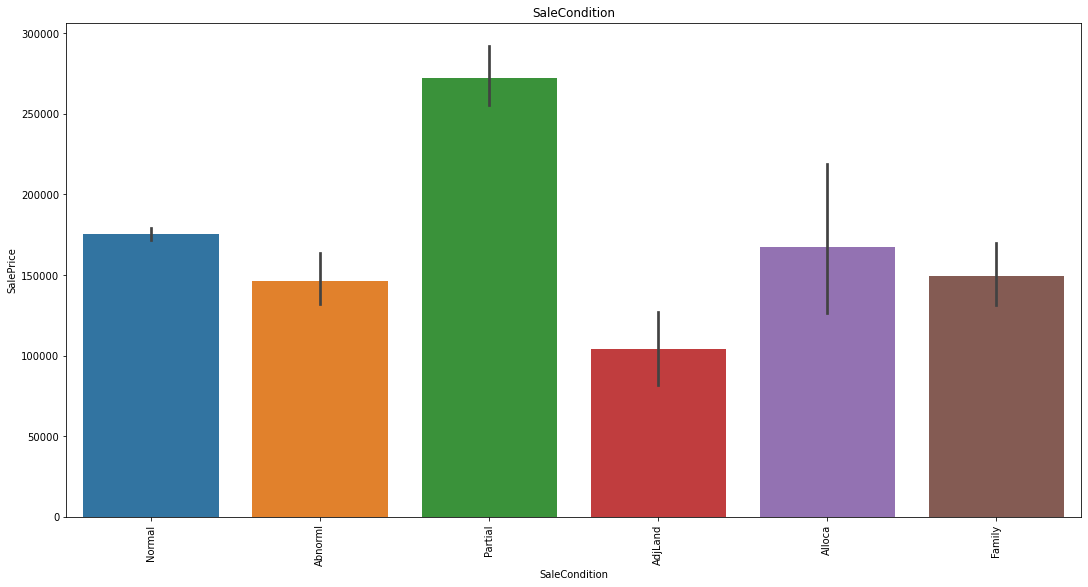

In [16]:
for i in housing.columns:
  x = housing[i].dtypes
  if x == 'object':
    #print('yes')
    plt.figure(figsize=(40, 20))
    plt.subplot(2,2,1)
    sns.barplot(data= housing, x= i , y= 'SalePrice')
    plt.xticks(rotation=90)
    plt.ylabel("SalePrice")
    plt.title(i)
    
    plt.show()

#### Almost all categorical variables are showing some trend in relation to target variable SalePrice

Visualizing the numeric variable columns and looking for outliers

In [17]:
# subset all categorical variables

housing_numeric = housing.select_dtypes(exclude=['object'])

housing_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,2003,2003,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,1976,1976,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,2001,2002,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,1915,1970,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,2000,2000,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


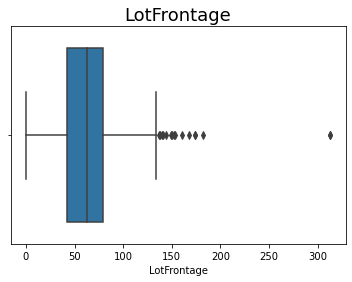

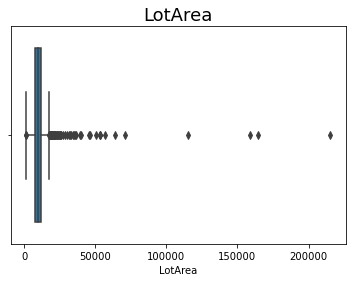

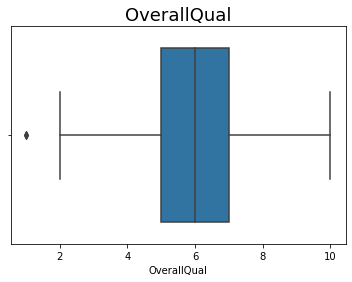

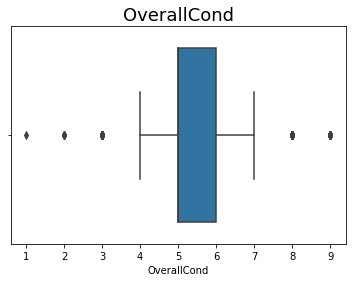

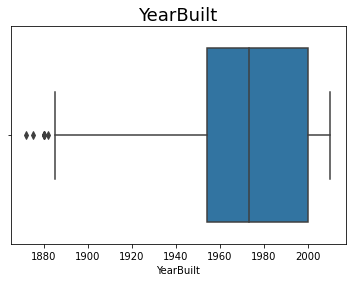

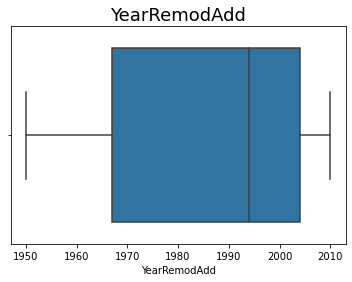

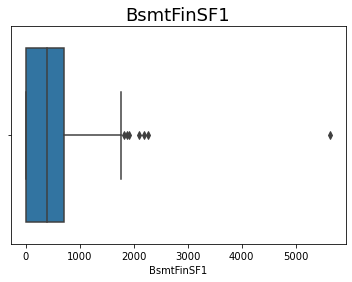

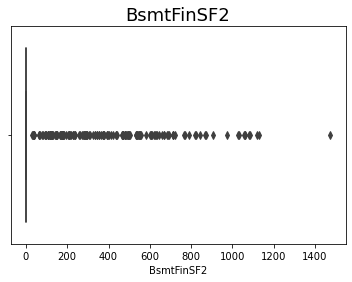

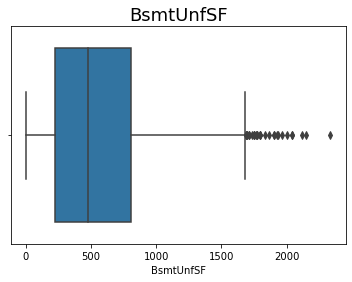

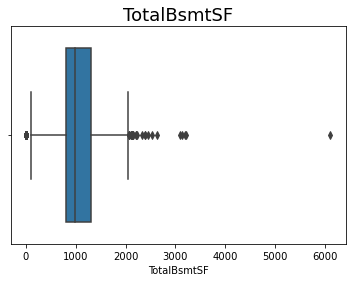

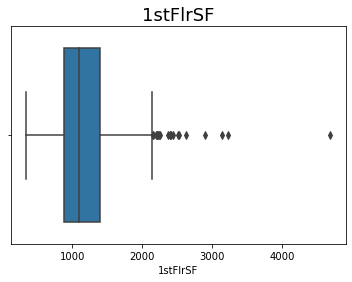

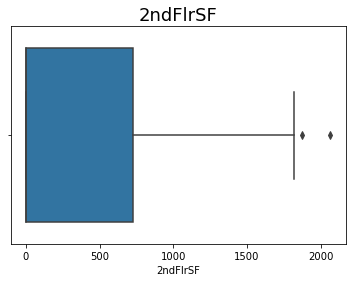

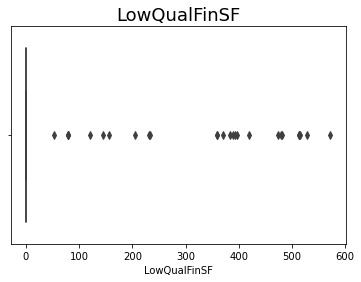

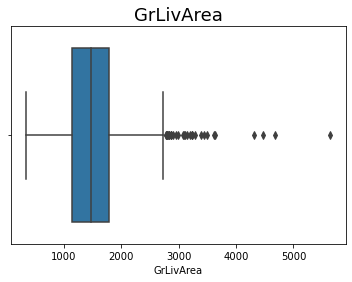

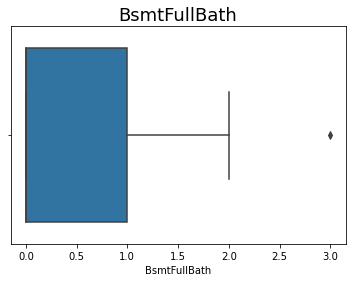

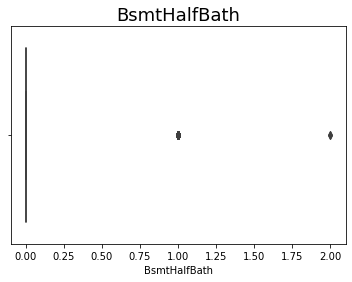

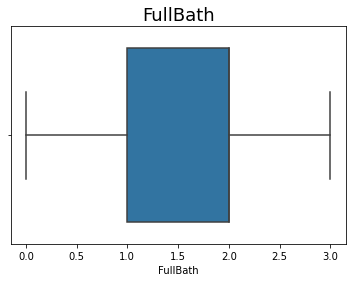

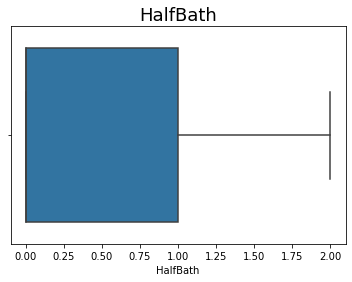

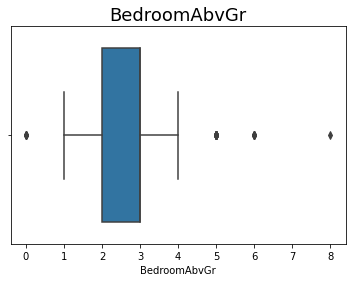

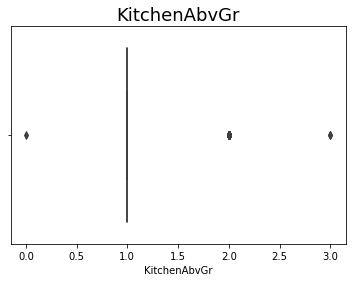

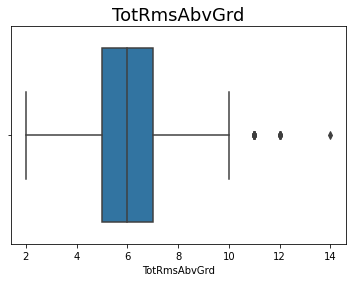

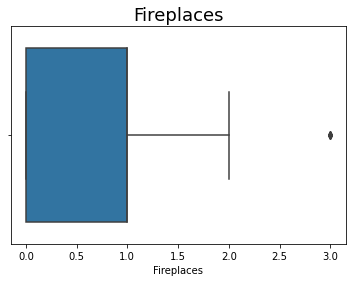

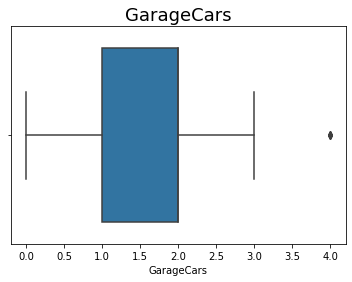

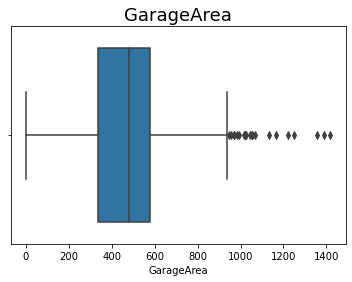

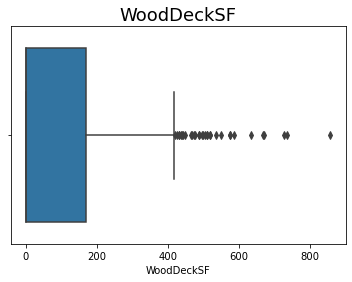

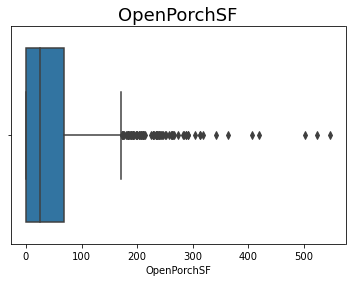

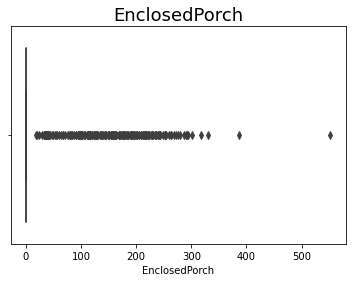

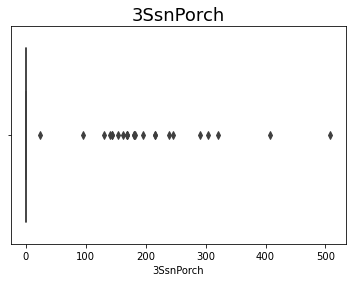

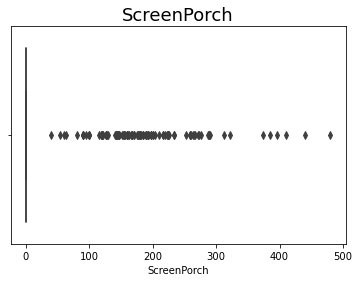

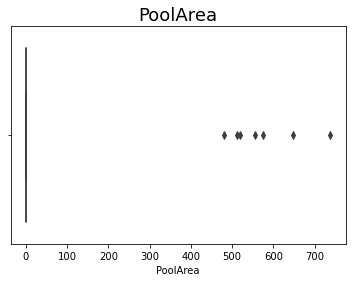

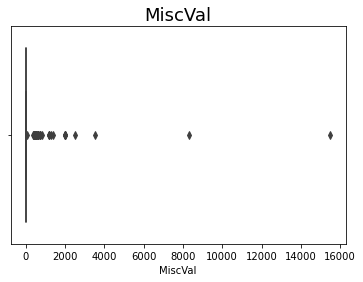

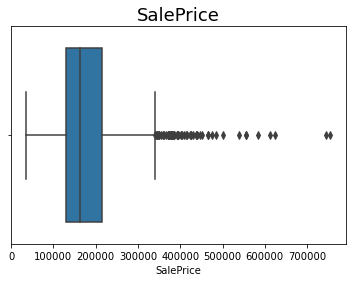

In [18]:
for i in housing_numeric.select_dtypes(['int64','float64']):
  plt.title(i, fontdict={'fontsize': 18})
  sns.boxplot(housing_numeric[i])
  plt.show()

In [19]:
# From above plots below columns seem to have outliers:

Outlier_col = [
                'LotFrontage',
                'LotArea',
                'OverallQual',
                'OverallCond',
                'YearBuilt',
                'BsmtFinSF1',
                'BsmtFinSF2',
                'BsmtUnfSF',
                'TotalBsmtSF',
                '1stFlrSF',
                '2ndFlrSF',
                'LowQualFinSF',
                'GrLivArea',
                'BsmtFullBath',
                'BsmtHalfBath',
                'BedroomAbvGr',
                'TotRmsAbvGrd',
                'Fireplaces',
                'GarageCars',
                'GarageArea',
                'WoodDeckSF',
                'OpenPorchSF',
                'EnclosedPorch',
                '3SsnPorch',
                'ScreenPorch',
                'PoolArea',
                'MiscVal',
                'SalePrice',
            ]
    
    

In [20]:
housing_numeric[Outlier_col].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [21]:
# Outlier treatment

for i in Outlier_col:
  housing_numeric[i][housing_numeric[i] <= housing_numeric[i].quantile(0.05)] = housing_numeric[i].quantile(0.03)
  housing_numeric[i][housing_numeric[i] >= housing_numeric[i].quantile(0.95)] = housing_numeric[i].quantile(0.97)
    
  #print(housing_numeric[i])

In [22]:
housing_numeric[Outlier_col].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.0,1460.000000
mean,56.935616,9851.366712,6.223973,5.586301,1971.471233,436.258397,40.432733,562.689808,1053.329541,1156.981870,...,1.763699,469.882877,91.443233,44.773829,20.946575,0.0,13.224658,0.0,400.0,179462.620548
std,32.382142,4079.030127,1.496572,1.015347,29.508143,423.252404,128.988119,428.731114,381.511593,353.673972,...,0.739318,205.378530,115.527255,58.297726,56.368159,0.0,46.342604,0.0,0.0,71085.605079
min,0.000000,2522.000000,4.000000,4.000000,1910.000000,0.000000,0.000000,0.000000,312.330000,625.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,400.0,82000.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,400.0,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,400.0,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,400.0,214000.000000
max,114.000000,21571.800000,9.000000,8.000000,2007.000000,1375.990000,546.230000,1589.380000,1905.460000,1981.610000,...,3.000000,884.000000,385.380000,213.230000,216.000000,0.0,192.000000,0.0,400.0,374230.000000


In [23]:
housing_numeric['LowQualFinSF'].describe()

count    1460.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64

In [24]:
#MiscVal has all the values as same of 400, while LowQualFinSF, 3SsnPorch, PoolArea have all values as 0. Hence dropping them.

housing = housing.drop(['3SsnPorch','PoolArea','MiscVal','LowQualFinSF'], axis =1)

In [25]:
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


In [26]:
housing_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [27]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', '

In [28]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 and NEWER,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,61,0,0,NP,NF,NMisc,Year 2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,0,NP,NF,NMisc,Year 2007,WD,Normal,181500
2,2-STORY 1946 and NEWER,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,42,0,0,NP,NF,NMisc,Year 2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,35,272,0,NP,NF,NMisc,Year 2006,WD,Abnorml,140000
4,2-STORY 1946 and NEWER,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,84,0,0,NP,NF,NMisc,Year 2008,WD,Normal,250000


In [29]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType',
       'SaleCondition']] # predictors in variable X

y = housing['SalePrice'] # response variable in Y

In [30]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
0,2-STORY 1946 and NEWER,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NP,NF,NMisc,Year 2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,NP,NF,NMisc,Year 2007,WD,Normal
2,2-STORY 1946 and NEWER,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NP,NF,NMisc,Year 2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,NP,NF,NMisc,Year 2006,WD,Abnorml
4,2-STORY 1946 and NEWER,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,NP,NF,NMisc,Year 2008,WD,Normal


In [31]:
housing_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY FINISHED ATTIC ALL AGES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 and NEWER,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 and NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [34]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [35]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=265)

In [36]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.068587,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.761179,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [38]:
from sklearn.feature_selection import RFE      


# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)


rfe = RFE(lm, 120)             # running RFE            
rfe = rfe.fit(X_train, y_train)              



In [39]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

2600136503447414.5
[ 9.67986544e+02  7.14368292e+03  8.87613950e+03  6.43218803e+03
  1.23358381e+04  2.77456913e+03 -3.63267654e+16 -1.28485681e+16
 -3.51933006e+16  3.49414868e+16  2.60237969e+04  4.06020000e+04
 -5.90200000e+03  8.49000000e+02 -6.62750000e+02  6.19250000e+02
 -1.25400000e+03 -2.46500000e+03 -2.67987500e+03 -9.98500000e+02
  1.66000000e+03  4.09200000e+03  1.92900000e+03  1.18134375e+03
  8.02000000e+02 -7.25000000e+01  3.75437500e+02  5.12000000e+02
  1.89931250e+03  1.46000000e+03 -7.43031250e+02 -2.31000000e+02
 -3.01833629e+17 -3.36687500e+03  1.50700000e+03  3.98800000e+03
  7.64250000e+02  3.44270221e+17  4.84250000e+02 -4.88500000e+02
  1.16725000e+03  7.23050000e+03  3.40600000e+03  1.38340000e+04
  1.04345000e+04  1.91400000e+03  2.93000000e+02  1.64375000e+02
 -9.35000000e+01  5.85000000e+01  4.80000000e+02  5.24000000e+02
 -1.27000000e+03  1.33300000e+03  3.52750000e+02  2.40725000e+03
 -1.51900000e+03 -1.91875000e+02 -3.32375000e+02  6.83500000e+02
 -3.06

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))               

[('LotFrontage', False, 28),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 6),
 ('BsmtHalfBath', False, 84),
 ('FullBath', False, 114),
 ('HalfBath', False, 14),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 63),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 59),
 ('EnclosedPorch', False, 143),
 ('ScreenPorch', False, 87),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 123),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY FINISHED ATTIC ALL AGES', False, 93),
 ('MSSubClass_1-STORY PUD (Planned Unit Developm

In [41]:
l1 = list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

In [42]:
rfe.ranking_

array([ 28,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         6,  84, 114,  14,   1,   1,  63,   1,   1,   1,   1,  59, 143,
        87, 123,   1,   1,  93, 134,   1,   1,  31,   1,  94,   1,  95,
        52,  81,   1,   1,   1,   1,   1,  98, 131, 144, 120,  75, 105,
         1,  33, 108,   1,  21, 121, 118,  34,   1,  46,  13,   1, 128,
        25,   1,  99,  55,   1, 145,   1, 137,   1, 112,   1,   1,   1,
         1,  48,  23,   1,   1, 113,  22,   3,   1,   5,   4,  45,   2,
       146,  83,  68,  64,   8,   1,   1,  66, 142,   1,   1,   1,   1,
         1,  92,  26,  51,   1,  53, 109,  38,  90, 111,  37,   1,   1,
         1,   1,   1,   1,   1,   1,   1, 124,   1,   1,   1,  69, 100,
       130,   1, 117, 102,  12,  72,  60,   1, 110,  65,   1,   1,  80,
        96, 139,   1, 125,  86, 103,  85, 133,  35,  49, 101,  42, 106,
        91,   1,   1, 122,   1,   1,   1,  19,  18,   1,   7,  70,   1,
         1,   1,   1,  77,   1,  15,   1,   1, 126,   1,   1,  3

In [43]:
#columns with RFE support

colRFE = X_train.columns[rfe.support_]                
colRFE                                                


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageCond_NG', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Fa',
       'PoolQC_Gd', 'PoolQC_NP', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=120)

In [44]:
#columns without RFE support

X_train.columns[~rfe.support_]                       

Index(['LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       ...
       'YrSold_Year 2010', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family'],
      dtype='object', length=145)

We had selected 120 features for RFE selection, which was roughly half of all the features.
Let us select a larger number of features with ranking upto 120.

In [45]:
colRFE = X_train.columns[rfe.ranking_ < 120]                 #SKA
colRFE    

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[colRFE]        

In [47]:
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.270593,-0.492374,-0.795151,0.381743,-1.532424,-1.689368,0.053428,-0.288653,-0.387671,-0.441061,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
318,0.934327,-0.061820,0.651479,-0.517200,0.719786,0.394133,1.191731,-0.288653,-0.469172,0.660283,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
239,-0.162277,-0.177977,-0.071836,-1.416142,-0.870009,-1.689368,-0.766852,-0.288653,0.166984,-0.735209,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
986,0.039729,-0.521839,-0.071836,2.179628,-2.029235,0.878668,-0.973018,-0.288653,-0.186184,-1.305262,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1416,0.068587,0.082500,-1.518467,0.381743,-2.857254,-1.689368,-0.973018,-0.288653,0.474875,-0.639440,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lmols = sm.add_constant(X_train_rfe,has_constant='add')

Let us also fit a linear regression model of OLS from statsmodels, to eliminate few features based on p value.

In [49]:
X_train_lmols.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,1.0,0.270593,-0.492374,-0.795151,0.381743,-1.532424,-1.689368,0.053428,-0.288653,-0.387671,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
318,1.0,0.934327,-0.061820,0.651479,-0.517200,0.719786,0.394133,1.191731,-0.288653,-0.469172,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
239,1.0,-0.162277,-0.177977,-0.071836,-1.416142,-0.870009,-1.689368,-0.766852,-0.288653,0.166984,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
986,1.0,0.039729,-0.521839,-0.071836,2.179628,-2.029235,0.878668,-0.973018,-0.288653,-0.186184,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1416,1.0,0.068587,0.082500,-1.518467,0.381743,-2.857254,-1.689368,-0.973018,-0.288653,0.474875,...,-0.078757,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [50]:

X_train_lmols.loc[:,"const"]


210     1.0
318     1.0
239     1.0
986     1.0
1416    1.0
       ... 
1009    1.0
802     1.0
53      1.0
350     1.0
79      1.0
Name: const, Length: 1021, dtype: float64

In [51]:


lmols = sm.OLS(y_train,X_train_lmols).fit()   # Running the linear model



In [52]:
print(lmols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     67.29
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:49:49   Log-Likelihood:                -11439.
No. Observations:                1021   AIC:                         2.333e+04
Df Residuals:                     797   BIC:                         2.443e+04
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 Let us drop features that have a very high p value of 0.07

In [53]:
X_train_rfe2 = X_train_lmols.drop([
                                    "LotFrontage",
                                    "BsmtFinSF2",
                                    "BsmtUnfSF",
                                    "GrLivArea",
                                    "BsmtFullBath",
                                    "BsmtHalfBath",
                                    "FullBath",
                                    "HalfBath",
                                    "TotRmsAbvGrd",
                                    "Fireplaces",
                                    "GarageArea",
                                    "WoodDeckSF",
                                    "OpenPorchSF",
                                    "ScreenPorch",
                                    "MSSubClass_1-STORY 1945 & OLDER",
                                    "MSSubClass_1-STORY 1946 & NEWER ALL STYLES",
                                    "MSSubClass_1-STORY FINISHED ATTIC ALL AGES",
                                    "MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES",
                                    "MSSubClass_2-STORY 1945 & OLDER",
                                    "MSSubClass_2-STORY 1946 and NEWER",
                                    "MSSubClass_2-STORY PUD - 1946 & NEWER",
                                    "MSSubClass_DUPLEX - ALL STYLES AND AGES",
                                    "MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                    "MSSubClass_SPLIT FOYER",
                                    "MSSubClass_SPLIT OR MULTI-LEVEL",
                                    "Alley_No Alley",
                                    "LotShape_Reg",
                                    "LandContour_HLS",
                                    "LandContour_Low",
                                    "LandContour_Lvl",
                                    "Utilities_NoSeWa",
                                    "LotConfig_Inside",
                                    "LandSlope_Mod",
                                    "Neighborhood_Blueste",
                                    "Neighborhood_BrDale",
                                    "Neighborhood_CollgCr",
                                    "Neighborhood_Edwards",
                                    "Neighborhood_Gilbert",
                                    "Neighborhood_IDOTRR",
                                    "Neighborhood_NPkVill",
                                    "Neighborhood_NWAmes",
                                    "Neighborhood_OldTown",
                                    "Neighborhood_Sawyer",
                                    "Neighborhood_SawyerW",
                                    "Neighborhood_Timber",
                                    "Condition1_Feedr",
                                    "Condition1_PosA",
                                    "Condition1_PosN",
                                    "Condition1_RRAe",
                                    "Condition1_RRAn",
                                    "Condition1_RRNn",
                                    "Condition2_Feedr",
                                    "Condition2_Norm",
                                    "Condition2_PosA",
                                    "Condition2_RRAn",
                                    "BldgType_Duplex",
                                    "BldgType_Twnhs",
                                    "BldgType_TwnhsE",
                                    "HouseStyle_1Story",
                                    "HouseStyle_2.5Fin",
                                    "HouseStyle_2.5Unf",
                                    "HouseStyle_SFoyer",
                                    "HouseStyle_SLvl",
                                    "RoofStyle_Gable",
                                    "RoofStyle_Gambrel",
                                    "RoofStyle_Hip",
                                    "RoofStyle_Mansard",
                                    "RoofMatl_Roll",
                                    "RoofMatl_WdShake",
                                    "Exterior1st_CBlock",
                                    "Exterior1st_CemntBd",
                                    "Exterior1st_HdBoard",
                                    "Exterior1st_ImStucc",
                                    "Exterior1st_Stone",
                                    "Exterior1st_Stucco",
                                    "Exterior1st_VinylSd",
                                    "Exterior1st_Wd Sdng",
                                    "Exterior1st_WdShing",
                                    "Exterior2nd_Brk Cmn",
                                    "Exterior2nd_BrkFace",
                                    "Exterior2nd_CBlock",
                                    "Exterior2nd_CmentBd",
                                    "Exterior2nd_HdBoard",
                                    "Exterior2nd_ImStucc",
                                    "Exterior2nd_Stone",
                                    "Exterior2nd_Stucco",
                                    "Exterior2nd_VinylSd",
                                    "Exterior2nd_Wd Shng",
                                    "MasVnrType_BrkFace",
                                    "MasVnrType_NM",
                                    "MasVnrType_None",
                                    "MasVnrType_Stone",
                                    "ExterQual_Fa",
                                    "ExterCond_Gd",
                                    "ExterCond_TA",
                                    "Foundation_CBlock",
                                    "Foundation_PConc",
                                    "Foundation_Slab",
                                    "Foundation_Stone",
                                    "Foundation_Wood",
                                    "BsmtQual_Fa",
                                    "BsmtQual_NB",
                                    "BsmtCond_Gd",
                                    "BsmtCond_NB",
                                    "BsmtCond_Po",
                                    "BsmtCond_TA",
                                    "BsmtExposure_Nb",
                                    "BsmtFinType1_BLQ",
                                    "BsmtFinType1_GLQ",
                                    "BsmtFinType1_LwQ",
                                    "BsmtFinType1_Nb",
                                    "BsmtFinType1_Rec",
                                    "BsmtFinType1_Unf",
                                    "BsmtFinType2_GLQ",
                                    "BsmtFinType2_LwQ",
                                    "BsmtFinType2_Nb",
                                    "BsmtFinType2_Rec",
                                    "BsmtFinType2_Unf",
                                    "Heating_GasA",
                                    "Heating_Grav",
                                    "Heating_OthW",
                                    "HeatingQC_Gd",
                                    "HeatingQC_Po",
                                    "HeatingQC_TA",
                                    "CentralAir_Y",
                                    "Functional_Maj2",
                                    "Functional_Min1",
                                    "Functional_Mod",
                                    "FireplaceQu_Fa",
                                    "FireplaceQu_Gd",
                                    "FireplaceQu_NF",
                                    "FireplaceQu_Po",
                                    "FireplaceQu_TA",
                                    "GarageType_Attchd",
                                    "GarageType_Basment",
                                    "GarageType_BuiltIn",
                                    "GarageType_CarPort",
                                    "GarageType_NG",
                                    "GarageFinish_NG",
                                    "GarageFinish_RFn",
                                    "GarageFinish_Unf",
                                    "GarageQual_Fa",
                                    "GarageQual_Gd",
                                    "GarageQual_NG",
                                    "GarageQual_Po",
                                    "GarageQual_TA",
                                    "GarageCond_Fa",
                                    "GarageCond_Gd",
                                    "GarageCond_NG",
                                    "GarageCond_Po",
                                    "GarageCond_TA",
                                    "Fence_GdWo",
                                    "Fence_MnWw",
                                    "MiscFeature_Othr",
                                    "MiscFeature_Shed",
                                    "YrSold_Year 2007",
                                    "YrSold_Year 2008",
                                    "YrSold_Year 2009",
                                    "YrSold_Year 2010",
                                    "SaleType_CWD",
                                    "SaleType_Con",
                                    "SaleType_ConLw",
                                    "SaleType_Oth",
                                    "SaleType_WD"
                                    ], axis = 1)

Let us now chek the VIF to see collinearity.

In [54]:
#Dropping constant

#X_train_lm_VIF = X_train_rfe2.drop(['const'], axis=1)

X_train_lm_VIF = X_train_rfe2

In [55]:
X_train_rfe2.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LandSlope_Sev', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_2fmCon',
       'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_Plywood', 'Exterior2nd_AsphShn',
       'Exterior2nd

In [56]:
X_train_lm_VIF.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LandSlope_Sev', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_2fmCon',
       'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_Plywood', 'Exterior2nd_AsphShn',
       'Exterior2nd

In [57]:
#Dropping constant

X_train_lm_VIF = X_train_lm_VIF.drop(['const'], axis=1)

In [58]:
X_train_lm_VIF.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'MSSubClass_2-1/2 STORY ALL AGES',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_2Story',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_Plywood',
       'Exterior2nd_AsphShn', 'Exterior2nd_Other', 'ExterQ

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X1 = X_train_lm_VIF
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
37,RoofMatl_CompShg,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,BedroomAbvGr,inf
...,...,...
49,ExterCond_Po,1.42
56,KitchenQual_Fa,1.42
26,Neighborhood_SWISU,1.39
48,ExterQual_TA,1.39


In [60]:
vif.head(50)

,Features,VIF
37,RoofMatl_CompShg,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,BedroomAbvGr,inf
29,Neighborhood_Veenker,407.51
35,HouseStyle_2Story,301.24
12,MSSubClass_2-1/2 STORY ALL AGES,290.33
11,GarageCars,182.14
10,KitchenAbvGr,164.29


In [61]:
#VIF of infinite 'inf' is received for few columns-This shows a perfect correlation between two independent variables.
#In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity



Let us drop features that have high VIF of greater than 5

In [62]:
X_train_rfe2 = X_train_lm_VIF.drop([
                                    "RoofMatl_CompShg",
                                    "TotalBsmtSF",
                                    "1stFlrSF",
                                    "2ndFlrSF",
                                    "BedroomAbvGr",
                                    "Neighborhood_Veenker",
                                    "HouseStyle_2Story",
                                    "MSSubClass_2-1/2 STORY ALL AGES",
                                    "GarageCars",
                                    "KitchenAbvGr",
                                    "Neighborhood_Somerst",
                                    "Condition2_PosN",
                                    "RoofStyle_Shed",
                                    "Condition2_RRAe",
                                    "RoofMatl_Tar&Grv",
                                    "Neighborhood_StoneBr",
                                    "HouseStyle_1.5Unf",
                                    "Exterior1st_BrkFace",
                                    "Exterior1st_Plywood",
                                    "RoofMatl_Metal",
                                    "BldgType_2fmCon",
                                    "SaleCondition_Normal",
                                    "RoofMatl_Membran",
                                    "RoofMatl_WdShngl",
                                    "YearRemodAdd",
                                    "Fence_MnPrv",
                                    "SaleType_ConLD",
                                    "PoolQC_Gd",
                                    "SaleType_New",
                                    "SaleCondition_AdjLand",
                                    "Neighborhood_BrkSide",
                                    "LandSlope_Sev",
                                    "Neighborhood_Crawfor",
                                    "Fence_NF",
                                    "Condition1_Norm",
                                    "LotConfig_FR2",
                                    "SaleCondition_Family"
                                    ], axis = 1)

In [63]:
X_train_rfe2.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_Other',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType2_BLQ',
       'Heating_Wall', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Min2', 'Functional_Sev', 'Functional_Typ', 'PoolQC_Fa',
       'PoolQC_NP', 'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object')

In [64]:
#Let us fit linear regression model based on new list of features.

# Instantiate
lm2 = LinearRegression()

# Fit a line
lm2.fit(X_train_rfe2, y_train)

LinearRegression()

In [65]:
# Print the coefficients and intercept
print(lm2.intercept_)
print(lm2.coef_)

179901.56836813057
[ 1.00363195e+04  3.43725685e+04  4.47387602e+03  4.36972028e+03
  6.19089243e+03  4.02833083e+03  1.26790888e+03  7.52676516e+03
 -1.79195809e+02  4.15574706e+03  3.04964036e+03 -1.50327857e+03
  1.46505598e+04  4.47183716e+03  9.69799650e+02 -9.30946984e+02
 -5.37851262e+02  5.91171556e-12 -4.28426220e+03 -9.67412374e+03
  1.79625204e-11 -1.10138275e+04 -9.07804451e+03  5.75157923e+03
 -2.37797009e+03  2.61003216e+01 -4.55926799e+02 -9.69021962e+03
 -2.03013660e+04 -2.60919617e+04  1.86871594e+03 -5.83411781e+02
  1.25081500e+03  1.16908165e+03  1.73246062e+03  1.34200017e+03
  3.52077201e+03]


In [66]:
# Print the coefficients and intercept of first LR
#print(lm.intercept_)
#print(lm.coef_)

Adjusting test data to new list of features.

In [67]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.068587,-0.152020,-1.518467,0.381743,-0.008870,-0.671845,0.378031,-0.288653,-0.722728,-0.441061,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
57,0.905469,0.113068,0.651479,-0.517200,1.084115,0.927122,-0.973018,-0.288653,0.662778,-0.450182,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
780,0.155161,-0.264769,0.651479,-0.517200,0.786028,0.539493,-0.973018,-0.288653,1.516269,0.409460,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
382,0.616889,-0.127465,0.651479,-0.517200,1.150356,1.024029,-0.973018,-0.288653,0.841627,-0.270045,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1170,0.530315,-0.063824,-0.071836,0.381743,0.189854,-0.381123,0.171865,-0.288653,0.015303,0.087949,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [68]:
X_test = X_test[X_train_rfe2.columns]        #SKA

In [69]:
X_test.head()    

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Sev,Functional_Typ,PoolQC_Fa,PoolQC_NP,SaleCondition_Alloca,SaleCondition_Partial
1436,-0.152020,-1.518467,0.381743,-0.008870,0.378031,-0.215859,-0.105263,0.518133,-0.418955,0.064238,...,-0.165667,-0.818829,0.993174,-0.154412,-0.02618,0.271163,-0.037037,0.069409,-0.091035,-0.305995
57,0.113068,0.651479,-0.517200,1.084115,-0.973018,-0.215859,-0.105263,0.518133,-0.418955,0.064238,...,-0.165667,1.221257,-1.006873,-0.154412,-0.02618,0.271163,-0.037037,0.069409,-0.091035,-0.305995
780,-0.264769,0.651479,-0.517200,0.786028,-0.973018,-0.215859,-0.105263,0.518133,-0.418955,0.064238,...,-0.165667,-0.818829,0.993174,-0.154412,-0.02618,0.271163,-0.037037,0.069409,-0.091035,-0.305995
382,-0.127465,0.651479,-0.517200,1.150356,-0.973018,-0.215859,-0.105263,0.518133,-0.418955,0.064238,...,-0.165667,1.221257,-1.006873,-0.154412,-0.02618,0.271163,-0.037037,0.069409,-0.091035,-0.305995
1170,-0.063824,-0.071836,0.381743,0.189854,0.171865,-0.215859,-0.105263,0.518133,-0.418955,0.064238,...,-0.165667,-0.818829,0.993174,-0.154412,-0.02618,0.271163,-0.037037,-14.407339,-0.091035,-0.305995


Let us check the metrics of linear regresiion obtained

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:

y_pred_train = lm2.predict(X_train_rfe2)
y_pred_test = lm2.predict(X_test)


metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7874336119141302
0.7668972069610513
1356322097268.6858
657049763598.5417
1328425168.7254512
1500113615.5217848


### Ridge regression

In [72]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#model_cv.fit(X_train, y_train)
model_cv.fit(X_train_rfe2, y_train)       #SKA


#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [74]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

#ridge.fit(X_train, y_train)
ridge.fit(X_train_rfe2, y_train)    #SKA

print(ridge.coef_)

[  9682.38500922  33334.54853779   4515.171932     4855.24727625
   6667.85548434   2223.36040296    398.27194971   4357.14323549
  -2855.34820458   4085.56964034   3009.79761239  -1627.13025536
  14277.74287782   5849.54996869    929.25800827   -902.15620401
   -521.21749272      0.          -3234.76752854  -9572.55348035
      0.         -10322.45194629  -8449.89678882   6015.51870536
  -2556.47092304    116.86556396   -476.64017654  -6909.90127518
 -13117.3285299  -18026.79962733   1712.18041356   -572.8019324
   1132.55958301    703.92339856    901.16569434   1082.10377901
   4192.5816879 ]


In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train_rfe2)
y_pred_test = ridge.predict(X_test)


metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7849816296742995
0.7652286066906879
1371967457402.713
661753068088.7611
1343748733.988945
1510851753.6273084


### Lasso regression


In [76]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#model_cv.fit(X_train, y_train) 
model_cv.fit(X_train_rfe2, y_train)   #SKA

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [78]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
#lasso.fit(X_train, y_train) 
lasso.fit(X_train_rfe2, y_train)      #SKA

Lasso(alpha=100)

In [79]:
lasso.coef_

array([  9902.38337726,  34777.80861127,   4423.59387901,   4316.51934838,
         6179.94338201,   2660.71842086,    605.81060995,   5104.53439516,
        -2249.03537449,   4016.14736459,   2963.56848678,  -1381.1989128 ,
        14531.25607146,   4654.09301878,    865.02059606,  -1159.38853954,
           -0.        ,      0.        ,  -3090.23919593,  -8456.40402468,
            0.        , -10833.30837636,  -8892.75385526,   5808.66618373,
        -2336.79521929,      0.        ,   -358.94071051,  -9249.75086899,
       -19484.57582564, -25150.64759709,   1646.40972392,   -548.43727973,
          951.56687827,    834.38581037,   1366.87065656,   1161.92625216,
         3605.89191466])

In [80]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe2)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7872883986250512
0.7675556470558896
1357248659527.9805
655193810252.7361
1329332673.3868566
1495876279.115836


In [81]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.874336e-01,7.849816e-01,7.872884e-01
1,R2 Score (Test),7.668972e-01,7.652286e-01,7.675556e-01
2,RSS (Train),1.356322e+12,1.371967e+12,1.357249e+12
3,RSS (Test),6.570498e+11,6.617531e+11,6.551938e+11
4,MSE (Train),3.644757e+04,3.665718e+04,3.646001e+04
5,MSE (Test),3.873130e+04,3.886968e+04,3.867656e+04


In [82]:
## Lets observe the changes in the coefficients after regularization


In [83]:
betas = pd.DataFrame(index=X_train_rfe2.columns)

In [84]:
betas.rows = X_train_rfe2.columns

In [85]:
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [86]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
LotArea,1.003632e+04,9682.385009,9902.383377
OverallQual,3.437257e+04,33334.548538,34777.808611
OverallCond,4.473876e+03,4515.171932,4423.593879
YearBuilt,4.369720e+03,4855.247276,4316.519348
BsmtFinSF1,6.190892e+03,6667.855484,6179.943382
MSZoning_FV,4.028331e+03,2223.360403,2660.718421
MSZoning_RH,1.267909e+03,398.271950,605.810610
MSZoning_RL,7.526765e+03,4357.143235,5104.534395
MSZoning_RM,-1.791958e+02,-2855.348205,-2249.035374
Street_Pave,4.155747e+03,4085.569640,4016.147365


In [87]:
betas.describe

<bound method NDFrame.describe of                              Linear         Ridge         Lasso
LotArea                1.003632e+04   9682.385009   9902.383377
OverallQual            3.437257e+04  33334.548538  34777.808611
OverallCond            4.473876e+03   4515.171932   4423.593879
YearBuilt              4.369720e+03   4855.247276   4316.519348
BsmtFinSF1             6.190892e+03   6667.855484   6179.943382
MSZoning_FV            4.028331e+03   2223.360403   2660.718421
MSZoning_RH            1.267909e+03    398.271950    605.810610
MSZoning_RL            7.526765e+03   4357.143235   5104.534395
MSZoning_RM           -1.791958e+02  -2855.348205  -2249.035374
Street_Pave            4.155747e+03   4085.569640   4016.147365
LotConfig_CulDSac      3.049640e+03   3009.797612   2963.568487
Neighborhood_Mitchel  -1.503279e+03  -1627.130255  -1381.198913
Neighborhood_NoRidge   1.465056e+04  14277.742878  14531.256071
Neighborhood_NridgHt   4.471837e+03   5849.549969   4654.093019
Neighb

### Conclusions from Ridge and Lasso regression

#### Ridge regression, top 5 significant features: 

* OverallQual 33334.54854
* KitchenQual_TA -18026.79963
* Neighborhood_NoRidge	14277.74288
* KitchenQual_Gd	-13117.32853
* BsmtQual_Gd	-10322.45195


#### Ridge regression lambda = 50, metrices:

Test data:
* R2 score: 0.765
* RSS: 661753068088.7611
* MSE: 1510851753.6273084

    
Train data:
* R2 score: 0.785
* RSS: 1371967457402.713
* MSE: 1343748733.988945

#### Lasso regression, top 5 significant features: 

* OverallQual	34777.80861
* KitchenQual_TA	-25150.6476
* KitchenQual_Gd	-19484.57583
* Neighborhood_NoRidge	14531.25607
* BsmtQual_Gd	-10833.30838


#### Lasso regression lambda = 100, metrices:

Test data:
* R2 score: 0.767
* RSS: 655193810252.7361
* MSE: 1495876279.115836

    
Train data:
* R2 score: 0.787
* RSS: 1357248659527.9805
* MSE: 1329332673.3868566